In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import statsmodels as sms
import statsmodels.api as sm
import math
import requests
import datetime

pd.set_option('display.max_rows',60000)
pd.set_option('display.max_columns',500)
pd.set_option('display.max_colwidth',200)
pd.options.display.float_format = '{:,.4f}'.format

# Load and Pre-processing

### Dataset 1: Nvidia

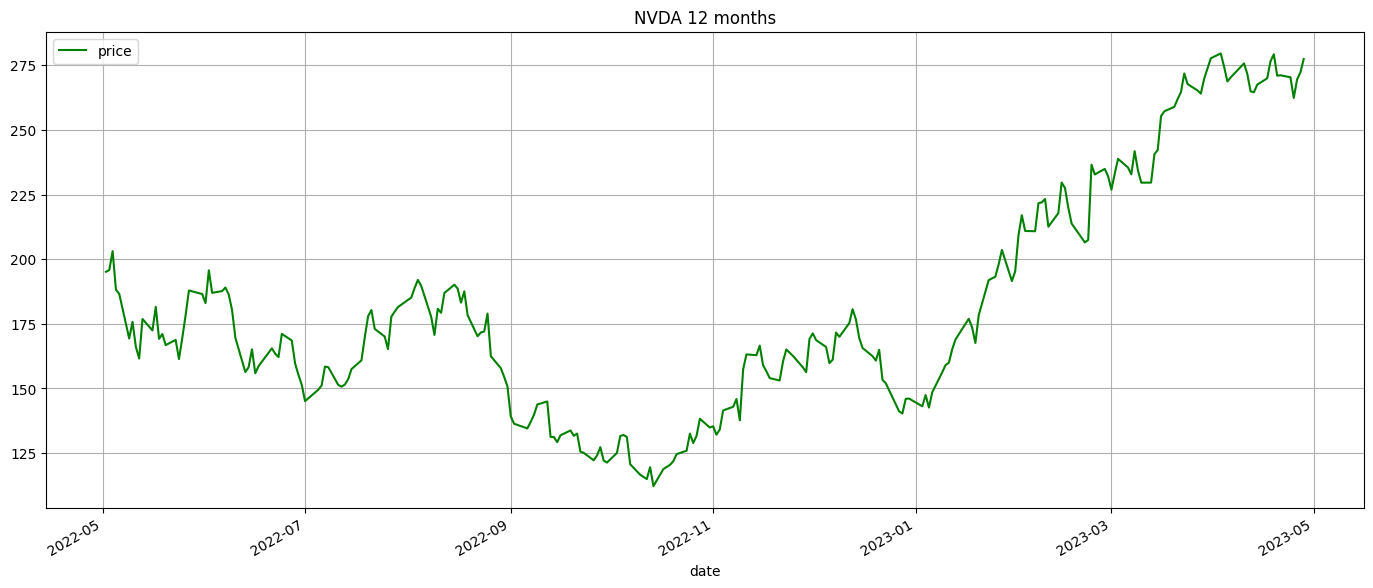

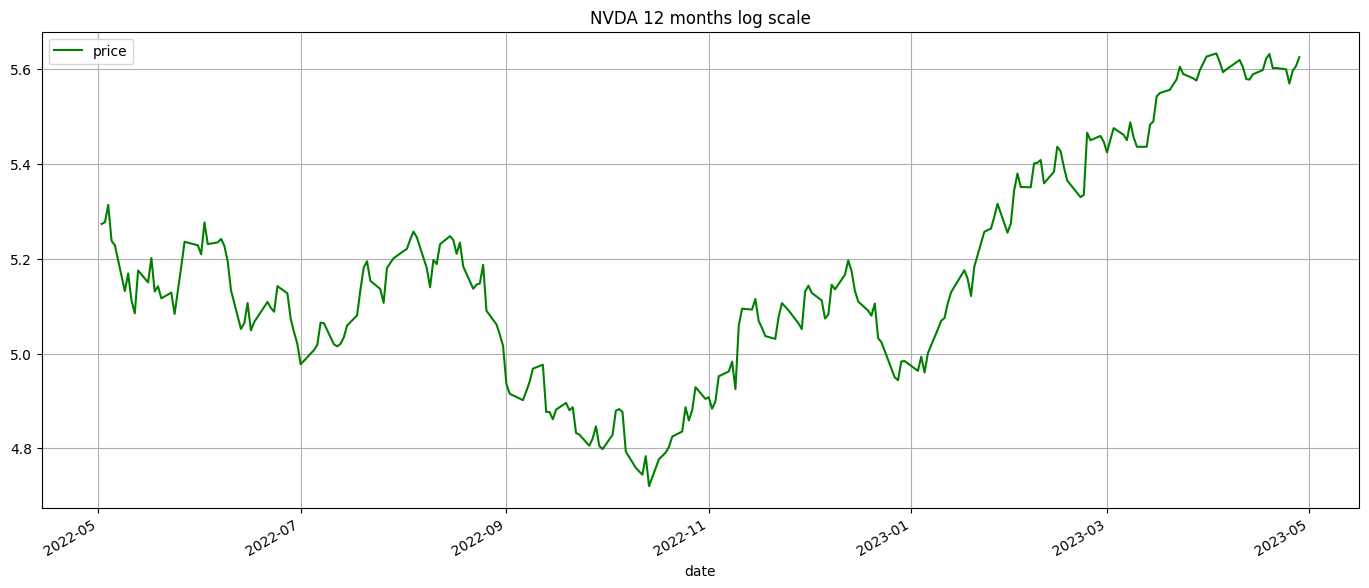

In [2]:
nvda_ticker = yf.Ticker('NVDA')
nvda_df_ = nvda_ticker.history(start="2022-05-01", end="2023-04-30")[['Close']].reset_index(drop=False)

nvda_df = nvda_df_.rename(columns={'Date':'date','Close':'price'})
nvda_df['price'] = nvda_df['price'].astype(float) 
nvda_df['date'] = pd.to_datetime(nvda_df['date'])
nvda_df = nvda_df.set_index(nvda_df['date'])#.asfreq('d')
nvda_df = nvda_df[['price']].copy()
#nvda_df = nvda_df

nvda_df.plot(c='g', grid=True, figsize= (17,7), title='NVDA 12 months'); 
nvda_df_log = np.log(nvda_df)
nvda_df_log.plot(c='g', grid=True, figsize= (17,7), title='NVDA 12 months log scale'); 

The closing price of Nvidia for each day between 2022-05-01 and 2023-04-30. During weekends, the market remains closed, hence no stock prices is made available for those days. The provided graph displays the stock's price using both linear and logarithmic scales. It seeems like log has no impact on a dataset with shorter timeframe. 

In [3]:
nvda_df.head()

price
date                              
2022-05-02 00:00:00-04:00 195.1274
2022-05-03 00:00:00-04:00 195.8167
2022-05-04 00:00:00-04:00 203.1291
2022-05-05 00:00:00-04:00 188.2446
2022-05-06 00:00:00-04:00 186.5563

In [4]:
nvda_df.info() #sanity check

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2022-05-02 00:00:00-04:00 to 2023-04-28 00:00:00-04:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   250 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


### Dataset 2: Amazon

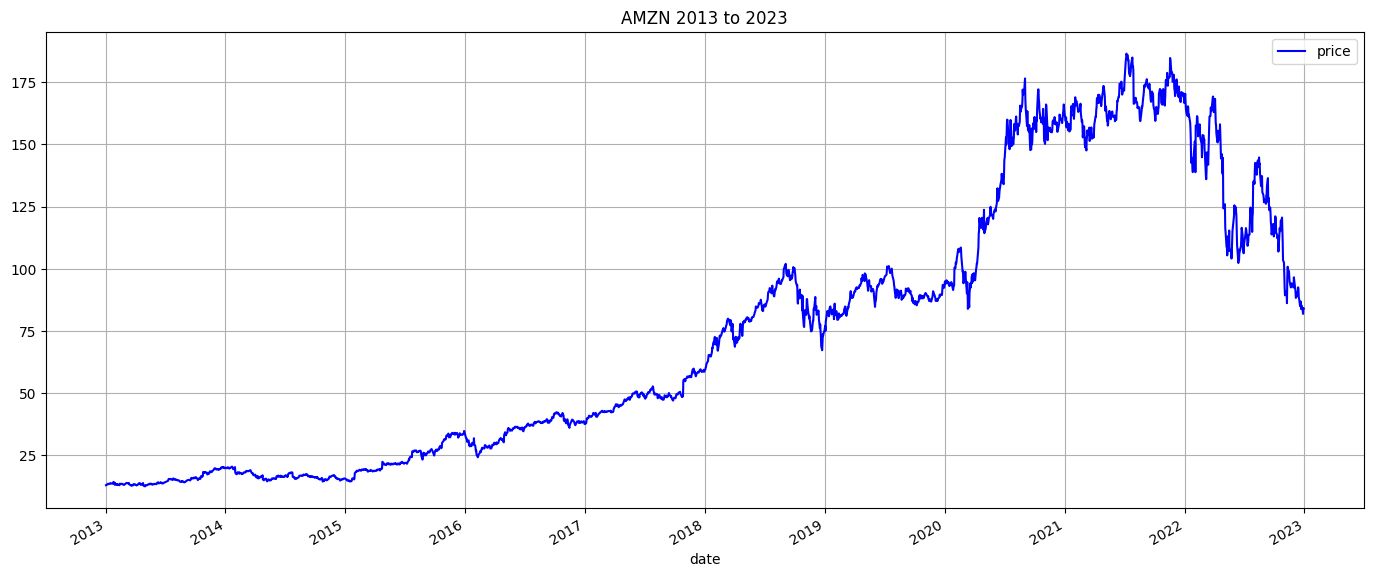

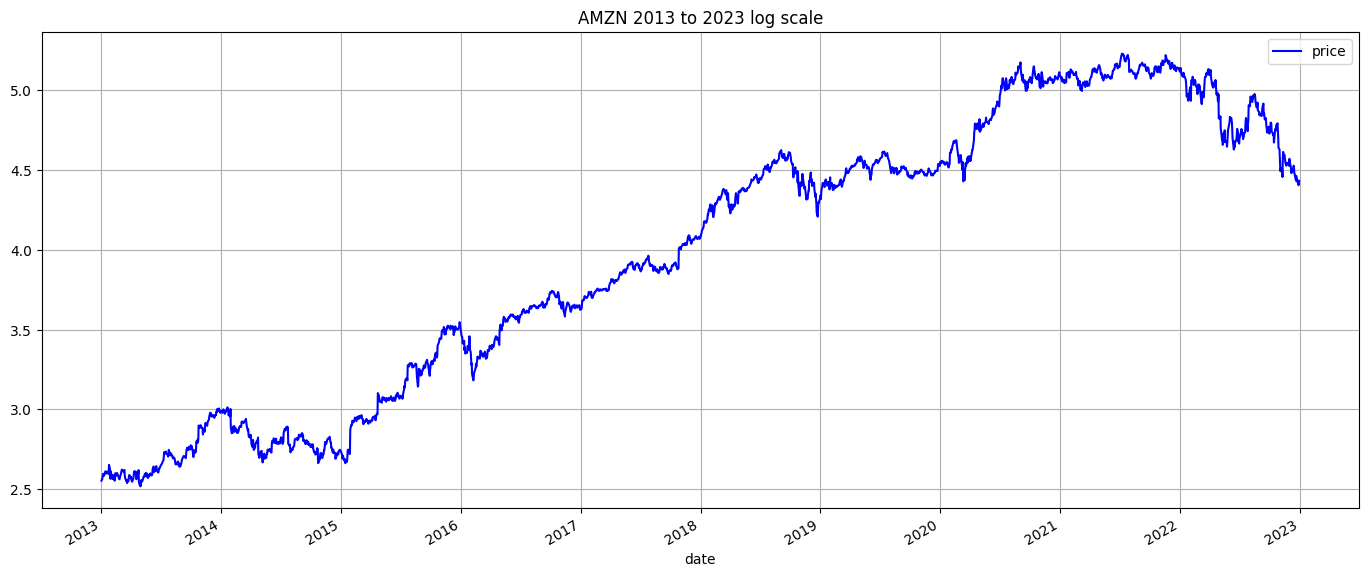

In [5]:
amzn_ticker = yf.Ticker("AMZN")
#amzn_df_ = amzn_ticker.history(start="2020-07-01", end="2023-06-30")[['Close']].reset_index(drop=False)
amzn_df_ = amzn_ticker.history(start="2013-01-01", end="2022-12-31")[['Close']].reset_index(drop=False)
amzn_df = amzn_df_.rename(columns={'Date':'date','Close':'price'})
amzn_df['price'] = amzn_df['price'].astype(float) 
amzn_df['date'] = pd.to_datetime(amzn_df['date'])
amzn_df = amzn_df.set_index(amzn_df['date'])#.asfreq('d')
amzn_df = amzn_df[['price']].copy()
#nvda_df = nvda_df

amzn_df.plot(c='b', grid=True, figsize= (17,7), title='AMZN 2013 to 2023'); 
amzn_df_log = np.log(amzn_df)
amzn_df_log.plot(c='b', grid=True, figsize= (17,7), title='AMZN 2013 to 2023 log scale'); 

The closing price of Amazon. for each day between 2013-01-01 and 2022-12-31. As weekends approach, the market remains closed, resulting in the absence of prices for these particular days. I have included both the linear and the log scale of the chart. From an initial outlook of the market, it may have seemed that Amazon is relatively "quiet" in terms of growth from 2013 to 2018, and then "suddenly" experience rapid growth from 2020 onwards. However, as the log scale chart suggests, Amazon has steadily increase in price since 2013. This suggest that this counter is a growth stock all along!

### Dataset 3: Ethereum

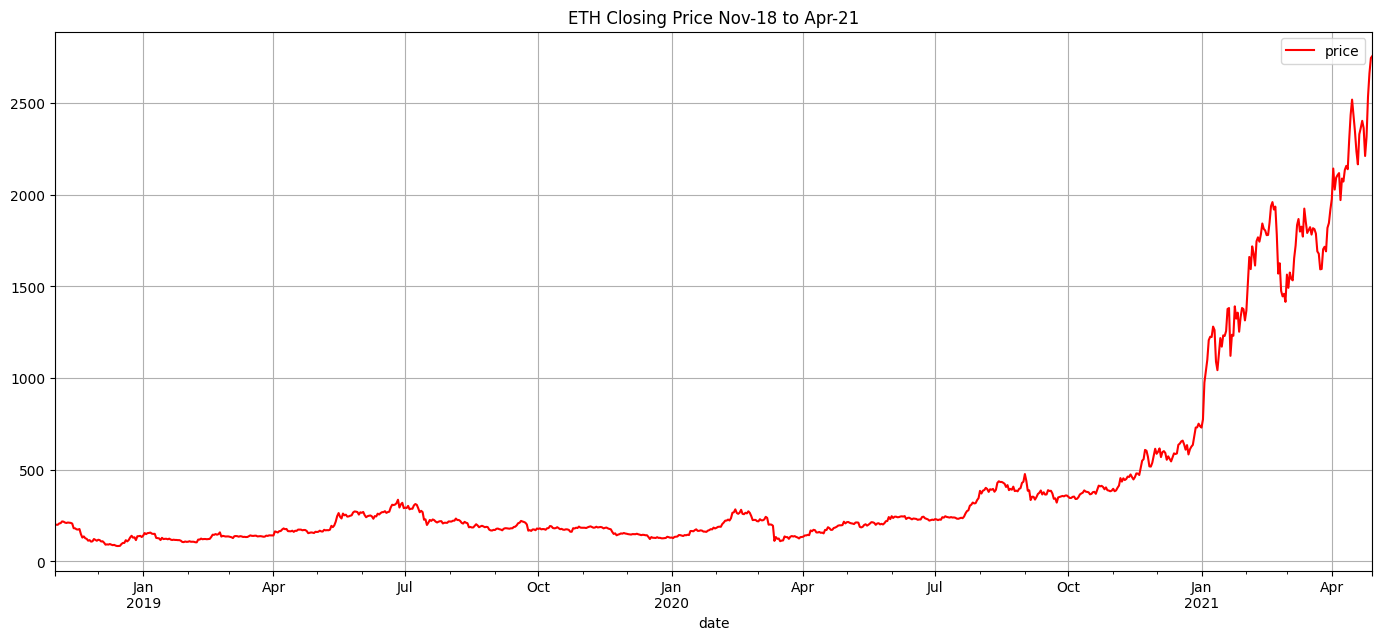

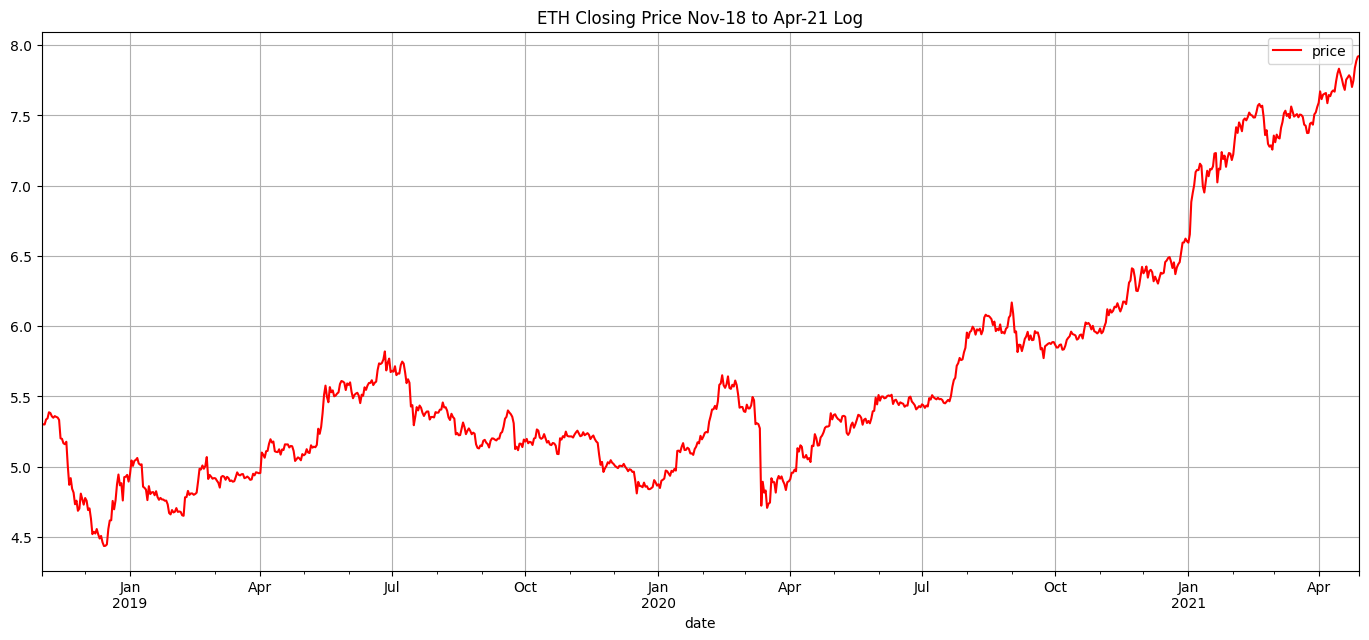

In [6]:
eth_ticker = yf.Ticker('ETH-USD')
eth_df_ = eth_ticker.history(start="2018-11-01", end="2021-04-30")[['Close']].reset_index(drop=False)

eth_df = eth_df_.rename(columns={'Date':'date','Close':'price'})
eth_df['price'] = eth_df['price'].astype(float) 
eth_df['date'] = pd.to_datetime(eth_df['date'])
eth_df = eth_df.set_index(eth_df['date'])
eth_df = eth_df[['price']].copy()
#nvda_df = nvda_df

eth_df.plot(c='r', grid=True, figsize= (17,7), title='ETH Closing Price Nov-18 to Apr-21'); 
eth_df_log = np.log(eth_df)
eth_df_log.plot(c='r', grid=True, figsize= (17,7), title='ETH Closing Price Nov-18 to Apr-21 Log'); 

In [7]:
eth_df.describe().T

count     mean      std     min      25%      50%      75%        max
price 911.0000 430.5479 535.6214 84.3083 161.5184 214.5251 381.9117 2,756.8770

In [8]:
eth_df.describe().T['max']/eth_df.describe().T['min']

price   32.6999
dtype: float64

The provided time series data represents the daily closing price of Ethereum in USD from 1st Nov, 2018, to 30th Apr, 2021. Unlike traditional financial markets, cryptocurrency markets operate continuously, including weekends, resulting in a price data point available for each day. This particular time series stands out as volatile, experiencing significant fluctuations over time. Notably, the price of Ethereum has surged more than 32 times during this period, making it one of the most remarkable growth stories in the financial world. The graph illustrates the price movement with two different scales: linear and logarithmic. The linear scale provides a clear representation of the absolute changes in price, while the logarithmic scale allows for a better understanding of the relative percentage changes over time.

### Dataset 4: Gold 

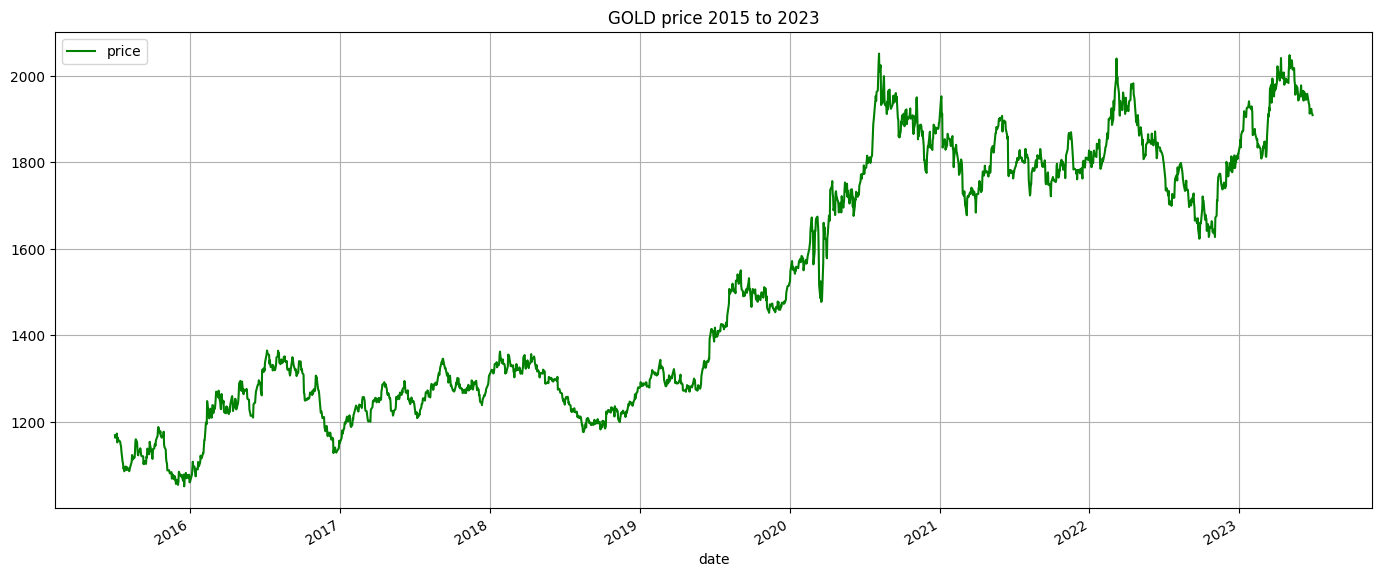

In [9]:
gold_ticker = yf.Ticker("GC=F")
gold_df_ = gold_ticker.history(start="2015-07-01", end="2023-06-30")[['Close']].reset_index(drop=False)

gold_df = gold_df_.rename(columns={'Date':'date','Close':'price'})
gold_df['price'] = gold_df['price'].astype(float) 
gold_df['date'] = pd.to_datetime(gold_df['date'])
gold_df['date'] = gold_df['date'].apply(lambda x: x.replace(tzinfo=None))
# gold_df.columns = ['ds', 'y']
gold_df = gold_df.set_index(gold_df['date'])
gold_df = gold_df[['price']].copy()

gold_df.plot(c='g', grid=True, figsize= (17,7), title='GOLD price 2015 to 2023'); 

Gold prices from 2015 to 2013. There is a clear upward trend from 2019 onwards, afterwhich, the prices hover in the range of slightly above 1600. Each observation represents a daily position. 

### Dataset 5 : Retail Sales: Beer, Wine, and Liquor Stores 

#https://fred.stlouisfed.org/series/MRTSSM4453USN

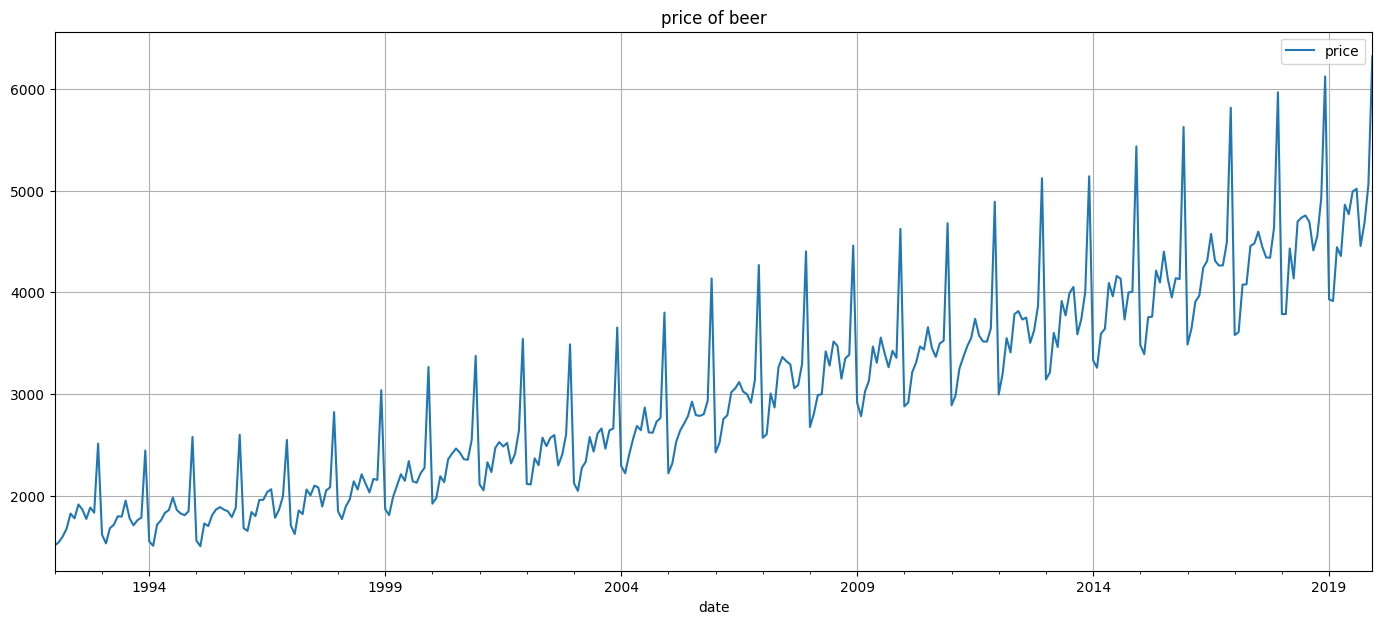

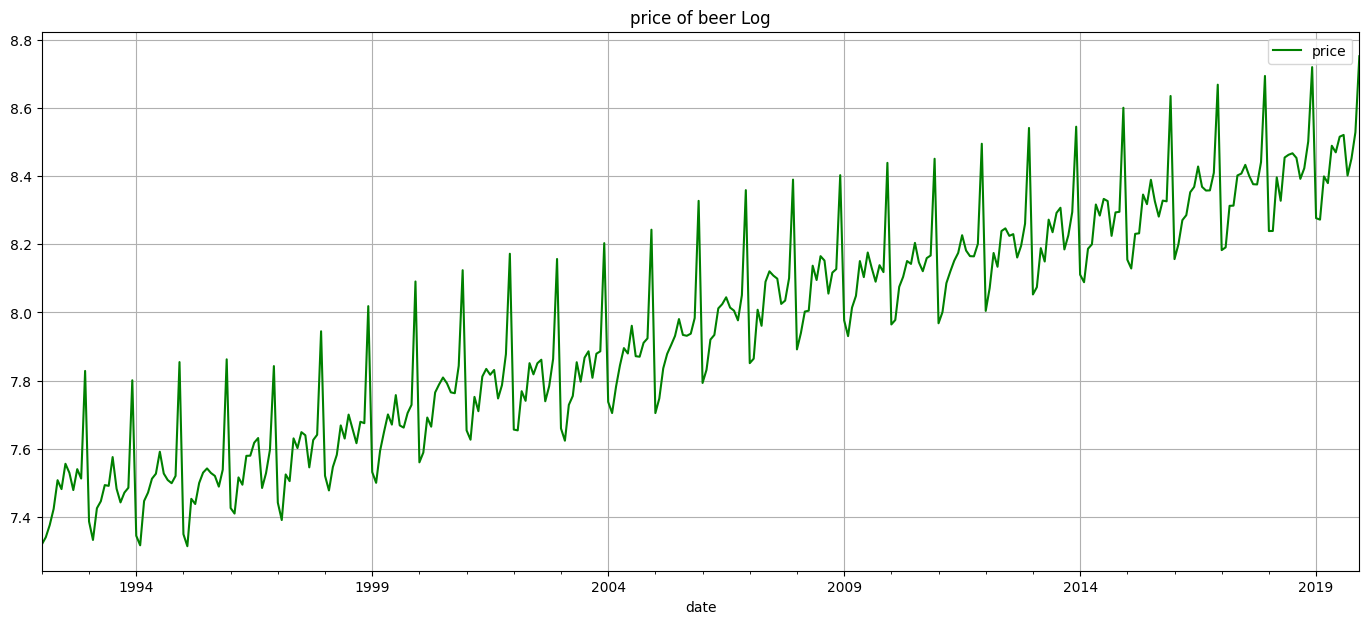

In [10]:
df_beer = pd.read_csv('MRTSSM4453USN.csv', low_memory=False, ) # index_col=['DATE']

df_beer['month'] = df_beer['DATE'].map(lambda x : x.split("-")[1])

df_beer = df_beer.rename(columns = {'DATE':'date','MRTSSM4453USN':'price'})
df_beer['price'] = df_beer['price'].astype(float)
df_beer['date'] = pd.to_datetime(df_beer['date'],format="%Y-%m-%d" ) #where is the F? #the format denotes the original 
df_beer = df_beer.set_index(df_beer['date'])
df_beer_excerpt = df_beer.loc[:'2019'][['price']].copy() #up until 2019

df_beer_excerpt.plot(grid=True,title="price of beer", figsize=(17,7));
df_beer_excerpt_log = np.log(df_beer_excerpt)
df_beer_excerpt_log.plot(c='g', grid=True, figsize= (17,7), title='price of beer Log'); 

Seasonal beer prices by month from 1992 to 2023. Do note that the price is in millions. There is a clear upward trend over the years, with prices peaking during the Christmas/New Year period. Logging a seasonal trend like this may not be of much help to the analysis. 

### Dataset 6: Consumer Price Index for All Urban Consumers: Lodging Away from Home in U.S. City Average 
https://fred.stlouisfed.org/series/CUUR0000SEHB

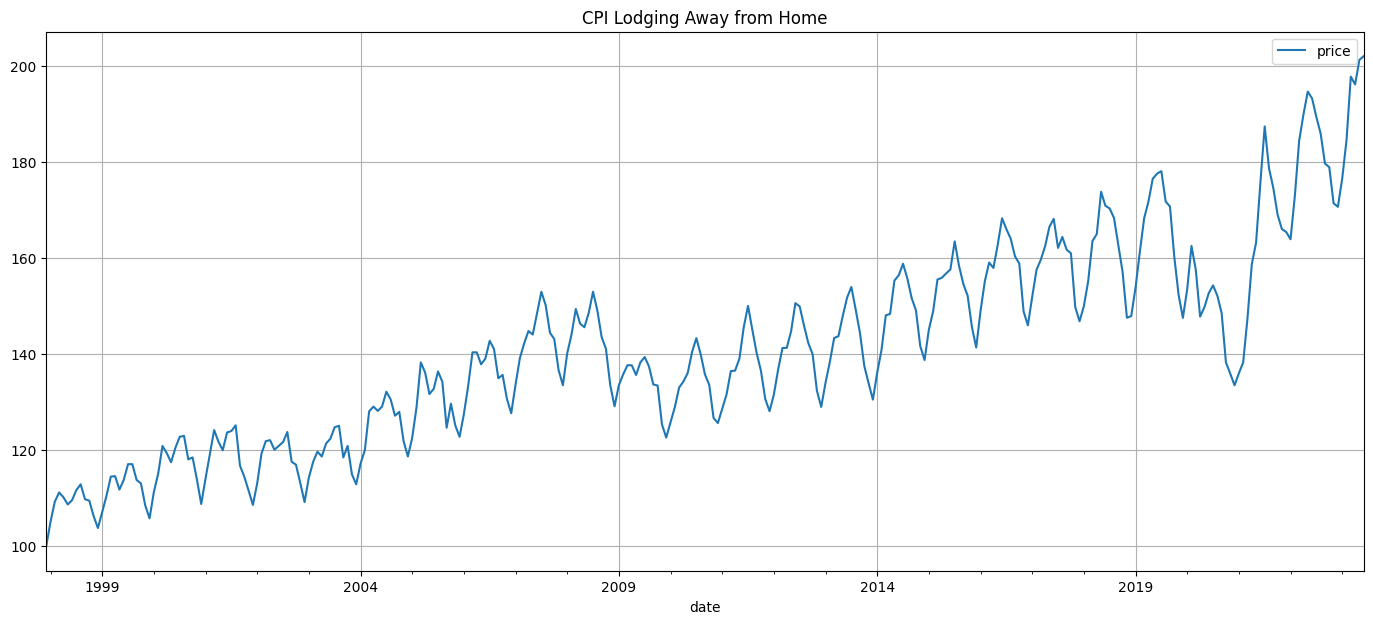

In [11]:
df_cpi = pd.read_csv('CUUR0000SEHB.csv', low_memory=False, )

df_cpi['month'] = df_cpi['DATE'].map(lambda x : x.split("-")[1])

df_cpi = df_cpi.rename(columns = {'DATE':'date','CUUR0000SEHB':'price'})
df_cpi['price'] = df_cpi['price'].astype(float)
df_cpi['date'] = pd.to_datetime(df_cpi['date'],format="%Y-%m-%d" ) #where is the F? #the format denotes the original 
df_cpi = df_cpi.set_index(df_cpi['date'])
df_cpi_ = df_cpi[['price']].copy()
#df_cpi_excerpt = df_cpi.loc[:'2019'][['price']].copy() #up until 2019

df_cpi_.plot(grid=True,title="CPI Lodging Away from Home", figsize=(17,7));
# df_cpi_log = np.log(df_cpi_)
# df_cpi_log.plot(c='g', grid=True, figsize= (17,7), title='price of beer Log');

Lodging away from home is a significant element of the shelter index in the Consumer Price Index (CPI). It comprises two components:

1.Housing at school, excluding board expenses.<br>
2.Other lodging away from home, which encompasses accommodations in hotels and motels.<br>
In the context of the CPI, these components collectively contribute to assessing the cost of lodging expenses incurred outside one's primary residence.

As seen above, there is a clear seasonal trend , which trends upwards in a general direction (except for the covid years).

In [12]:
#df_cpi_.loc['2009':'2019'].plot()

# Topic 2 - Manipulating Time

### Basic Differencing
This is to demostrate stationarity

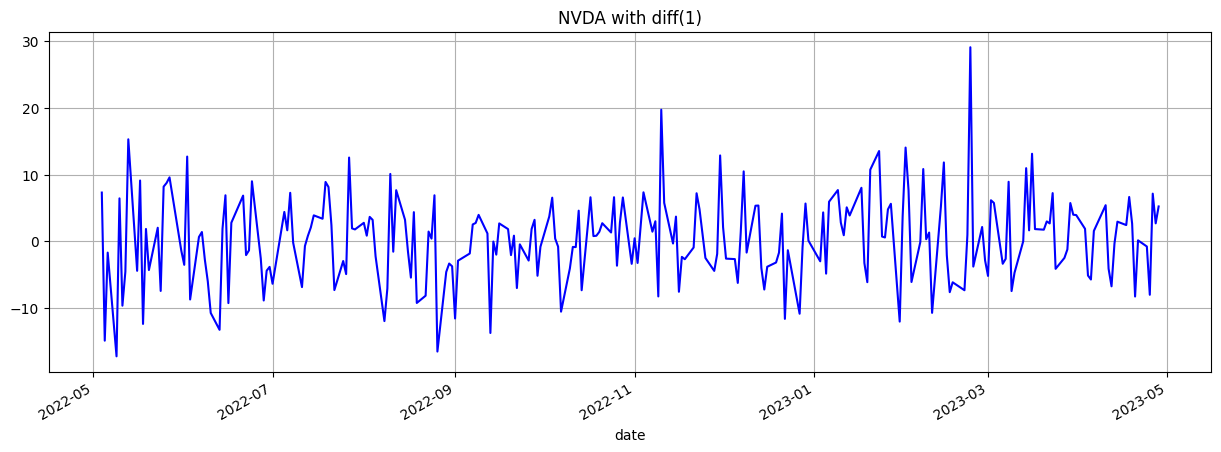

In [13]:
nvda_df['diff'] = nvda_df['price'] - nvda_df['price'].shift(1)
nvda_df['diff_2'] = nvda_df['diff'] - nvda_df['diff'].shift(1)
nvda_df['relative_diff'] = (nvda_df['price'] - nvda_df['price'].shift(1))/nvda_df['price']

nvda_df = nvda_df.dropna(axis=0)

nvda_df['diff'].plot(c='b', grid=True, figsize= (15,5), title='NVDA with diff(1)');

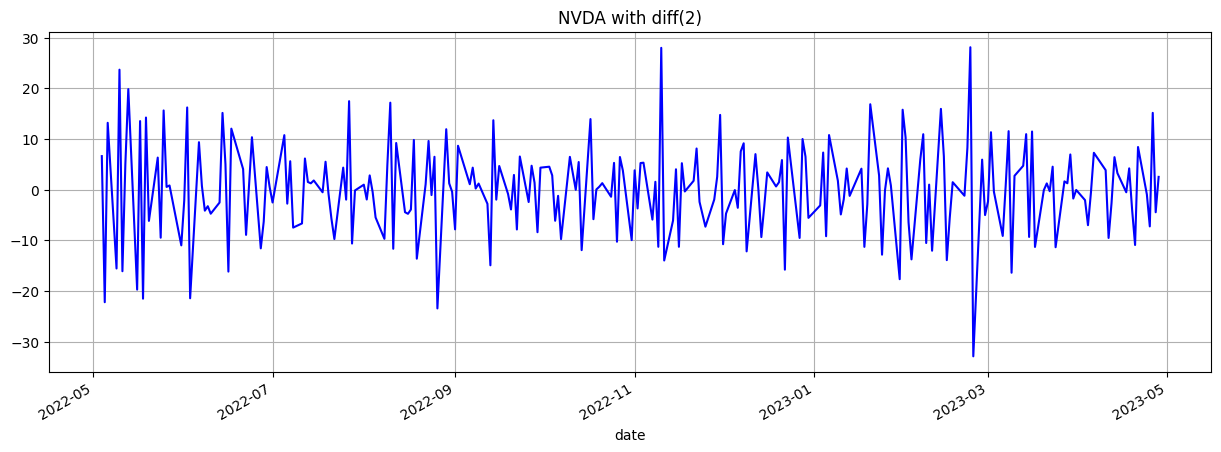

In [14]:
nvda_df['diff_2'].plot(c='b', grid=True, figsize= (15,5), title='NVDA with diff(2)');

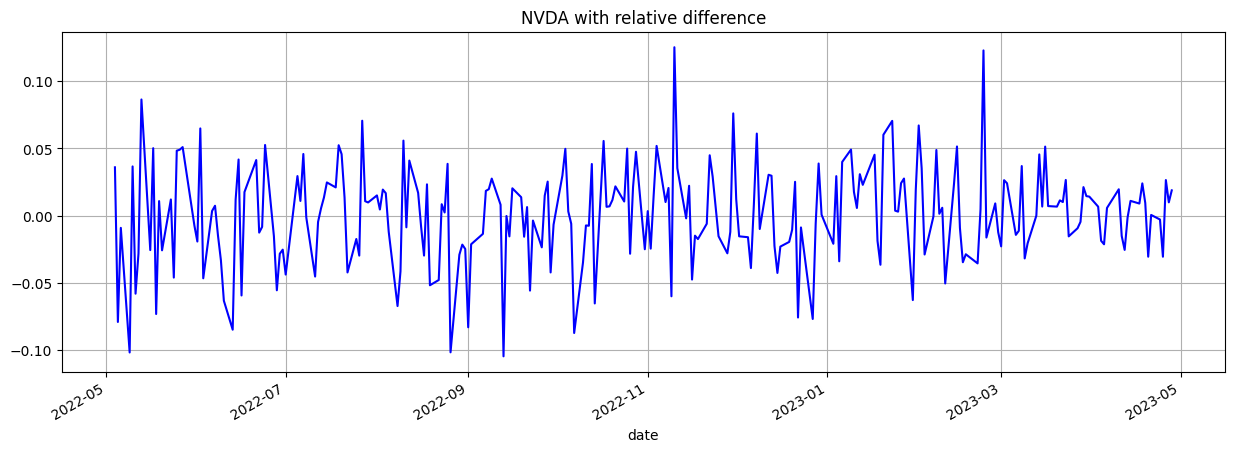

In [15]:
nvda_df['relative_diff'].plot(c='b', grid=True, figsize= (15,5), title='NVDA with relative difference');

## Stationary Test

In [16]:
def my_adfuller(series_e):
    result_ = adfuller(series_e)
    print('ADF Statistic: %f' % result_[0])
    print('p-value: %f' % result_[1])
    print('Critical Values:')
    for key, value in result_[4].items():
        print('\t%s: %.3f' % (key, value))

In [17]:
from statsmodels.tsa.stattools import adfuller

result1 = adfuller(nvda_df['price'])
print('ADF Statistic: %f' % result1[0])
print('p-value: %f' % result1[1])
print('Critical Values:')
for key, value in result1[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.001643
p-value: 0.958668
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573


In [18]:
result2 = adfuller(nvda_df['diff'])
print('ADF Statistic: %f' % result2[0])
print('p-value: %f' % result2[1])
print('Critical Values:')
for key, value in result2[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -11.569524
p-value: 0.000000
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573


At first differencing, we have reached stationarity 

https://machinelearningmastery.com/time-series-data-stationary-python/

## datasets that are already stationary without differencing

I have sourced for a FX dataset that shows stationarity without differencing. This is the fx rate between Singapore dollars and Brunei dollars. In real life, this fx is almost 1 for 1. 

In [19]:
def get_rates(amt, ccy, converted_ccy, start_date, end_date ):
    url = f'https://api.exchangerate.host/timeseries'
    payload = {'base': ccy, 'amount':amt,
               'start_date': start_date,
                'end_date': end_date}
    response = requests.get(url, params=payload)
    data = response.json()
    
    history_dates,rate_hist = [], [] 
    _format = '%Y-%m-%d'
    
    for i in data['rates'].keys():
        current_date = i
        currency_rate = data['rates'][i][converted_ccy]
        history_dates.append(datetime.datetime.strptime(current_date,_format))
        rate_hist.append(currency_rate)
        
    dataf = pd.DataFrame({'dates':history_dates,
                              'rate':rate_hist})
    
    dataf = dataf.set_index('dates')
    
    return(dataf)

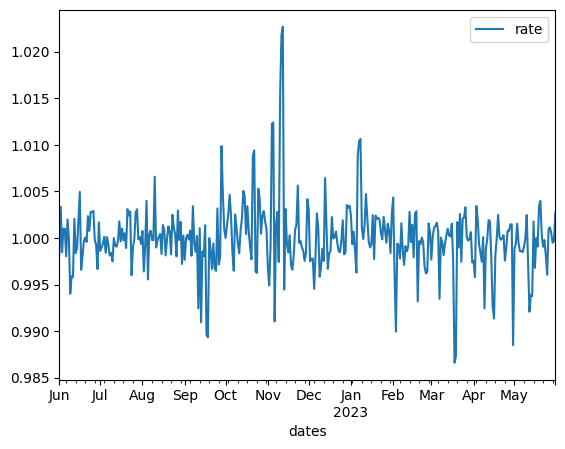

In [20]:
start_date = datetime.datetime(2022, 6, 1,)
end_date = datetime.datetime(2023, 5, 31,)

sgd_bnd = get_rates(1,'SGD','BND', start_date, end_date )
sgd_bnd.plot(); #use this for stationarity 

## Additive vs Multiplicative

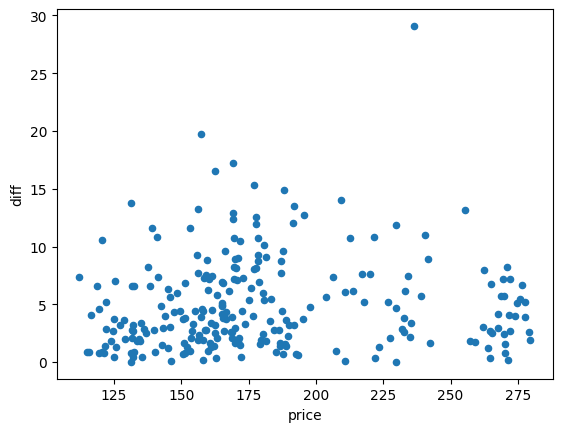

In [21]:
nvda_df_1 = nvda_df[['price']].copy()

nvda_df_1['diff'] = np.abs(nvda_df_1['price'] - nvda_df_1['price'].shift())
nvda_df_1.plot.scatter(x='price', y='diff');

it looks largely like a flat line, hence series is additive #no need to log

### Another example: ETH

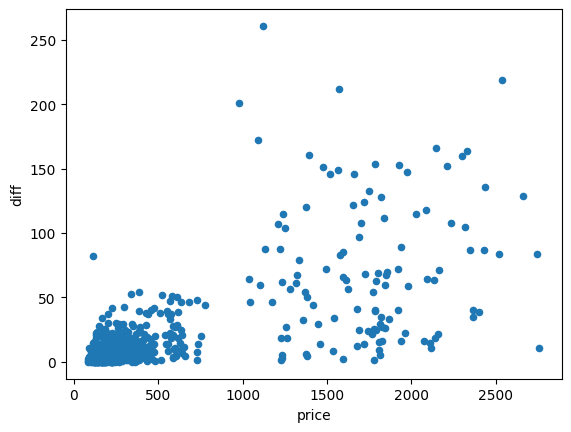

In [22]:
eth_df_1 = eth_df[['price']].copy()
eth_df_1['diff'] = np.abs(eth_df_1['price'] - eth_df_1['price'].shift())
eth_df_1.plot.scatter(x='price', y='diff');

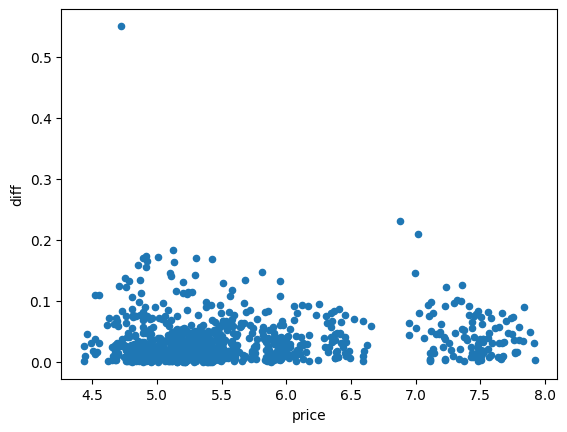

In [23]:
eth_df_1_log = eth_df[['price']].copy()
eth_df_1_log = np.log(eth_df)
eth_df_1_log['diff'] = np.abs(eth_df_1_log['price'] - eth_df_1_log['price'].shift())
eth_df_1_log.plot.scatter(x='price', y='diff');

ETH becomes additive with the log applied.

## Seasonal Adjustment

An example of seasonal adjustment on a seasonal beer dataset

date      price month  season_offset  seasonally_adjusted
date                                                                      
1992-01-01 1992-01-01 1,509.0000    01      -501.1399           2,010.1399
1992-02-01 1992-02-01 1,541.0000    02      -498.0327           2,039.0327
1992-03-01 1992-03-01 1,597.0000    03      -223.1399           1,820.1399
1992-04-01 1992-04-01 1,675.0000    04      -222.4970           1,897.4970
1992-05-01 1992-05-01 1,822.0000    05        41.0030           1,780.9970

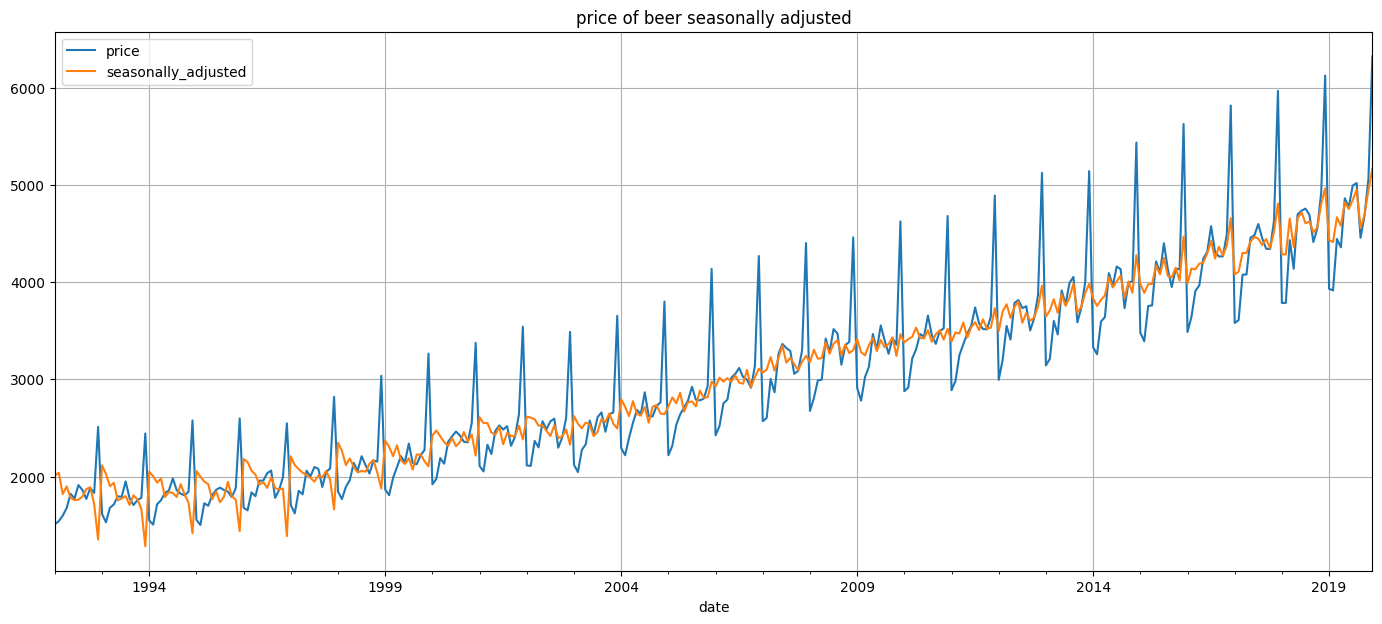

In [24]:
df_beer_sa = df_beer.loc[:'2019'].copy()

x1 = df_beer_sa.groupby('month')[['price']].agg({'sum','count'}).reset_index(drop=False)
x1.columns = x1.columns.map('_'.join)
x1['season_mean'] = x1['price_sum']/x1['price_count']
mean_ = np.mean(df_beer_sa.price)
x1['season_offset'] = x1['season_mean'] - mean_
dict_map = {a:b for a,b in zip(list(x1['month_']), list(x1['season_offset']))}

df_beer_sa['season_offset'] = df_beer_sa['month'].map(dict_map)
df_beer_sa['seasonally_adjusted'] = df_beer_sa['price'] - df_beer_sa['season_offset']

df_beer_sa[['price','seasonally_adjusted']].plot(grid=True,figsize=(17,7), title = "price of beer seasonally adjusted");

display(df_beer_sa.head())

As we can see, the orange line "smooths" out the blue spikes in the seasonal data. 

# Topic 3 - Principle of forecasting

### 1. Naive Forecast

In [25]:
def naive_forecast(df):
    df['naive_pred'] = df['price'].shift(1)
    df = df.dropna(axis=0)
    return(df)

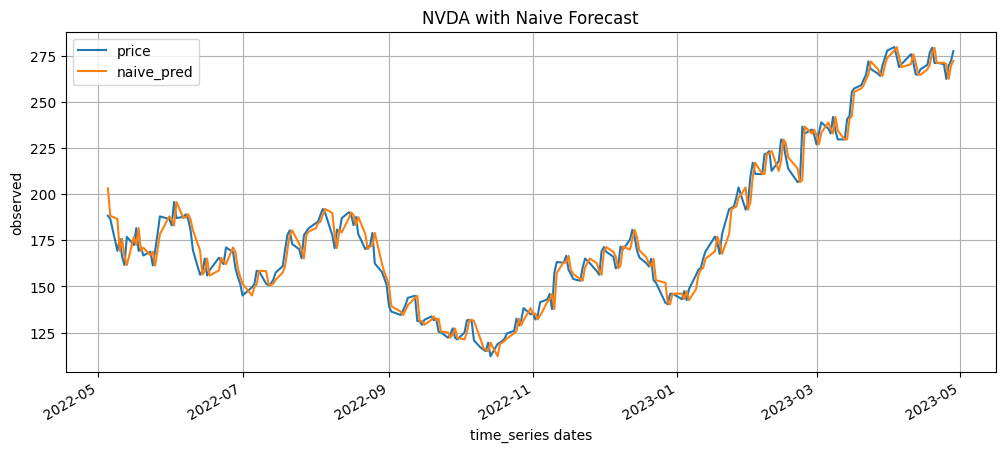

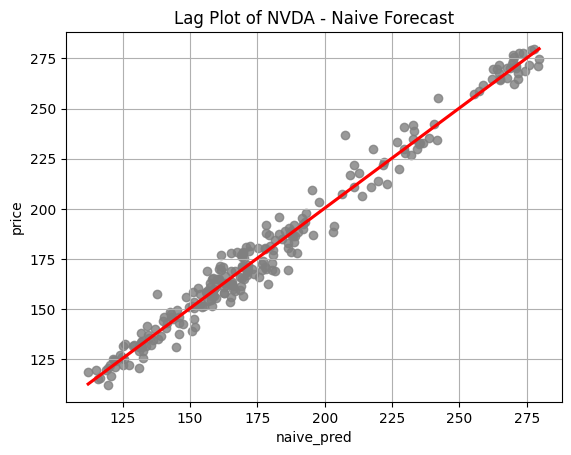

In [26]:
fc1_ = nvda_df[['price']].copy()

fc1_nvda = naive_forecast(fc1_)
fc1_nvda.plot(grid=True, title='NVDA with Naive Forecast', figsize=(12,5),xlabel='time_series dates', ylabel='observed');

fig, ax = plt.subplots()
ax = sns.regplot(x='naive_pred', y='price', data=fc1_nvda, ci=None, scatter_kws=dict(color='0.5'), color = 'r' )
ax.set_title('Lag Plot of NVDA - Naive Forecast')
plt.grid(); 

There is a linear relationship between the naive_prediction and price. We are on the right track! 

### 2. Averaging method

In [27]:
def predict_average(df, col_name,p): 
    new_col_name_ = 'predicted_av_{}'.format(p)
    df[new_col_name_] = df[col_name].shift(1).rolling(window=p).mean()
    df.dropna(axis=0, inplace=True)
    return(df)

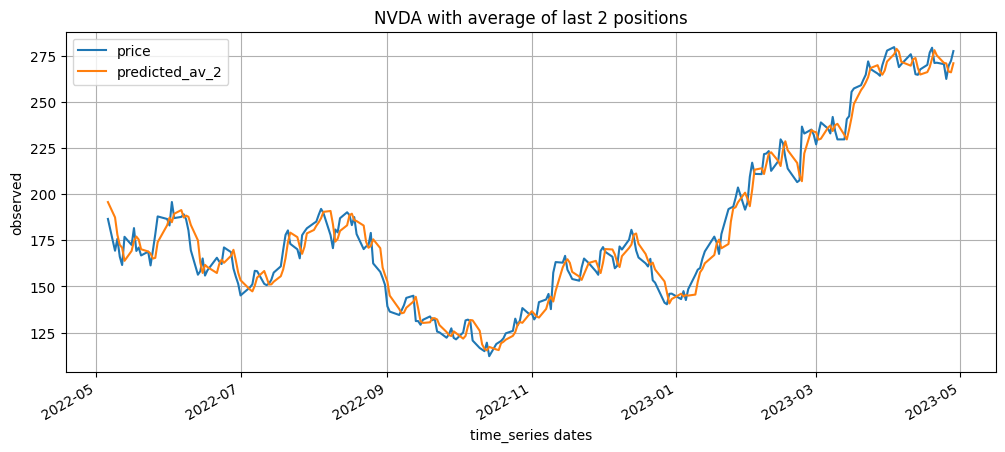

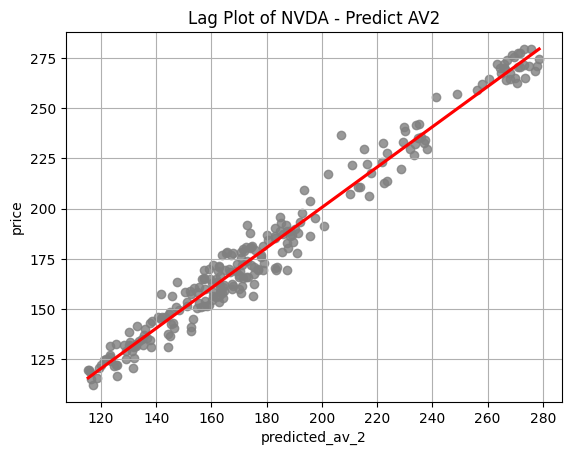

In [28]:
fc2_nvda_ =  nvda_df[['price']].copy()
avg_declared_ = 2
predict_av_2_nvda = predict_average(fc2_nvda_, 'price',avg_declared_)

predict_av_2_nvda.plot(grid=True, title='NVDA with average of last {} positions'.format(avg_declared_), 
            xlabel='time_series dates', ylabel='observed', figsize=(12,5));

fig, ax = plt.subplots()
ax = sns.regplot(x='predicted_av_2', y='price', data=predict_av_2_nvda, ci=None, scatter_kws=dict(color='0.5'), color = 'r' )
ax.set_title('Lag Plot of NVDA - Predict AV2')
plt.grid(); 

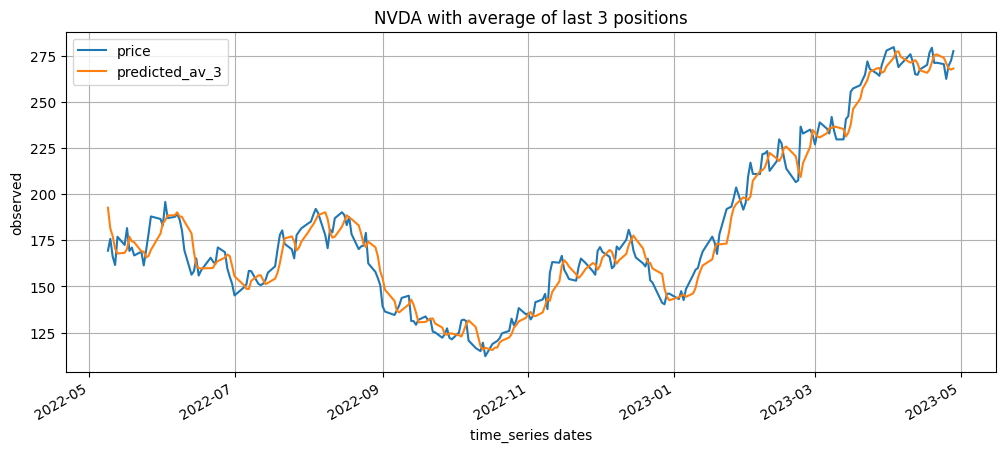

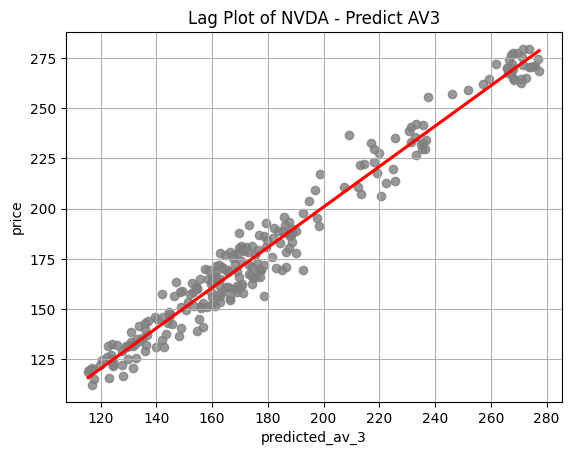

In [29]:
fc22_nvda =  nvda_df[['price']].copy()
avg_declared_3 = 3
predict_av_3_nvda = predict_average(fc22_nvda, 'price',avg_declared_3)

predict_av_3_nvda.plot(grid=True, title='NVDA with average of last {} positions'.format(avg_declared_3), 
            xlabel='time_series dates', ylabel='observed', figsize=(12,5));

fig, ax = plt.subplots()
ax = sns.regplot(x='predicted_av_3', y='price', data=predict_av_3_nvda, ci=None, scatter_kws=dict(color='0.5'), color = 'r' )
ax.set_title('Lag Plot of NVDA - Predict AV3')
plt.grid(); 

### 3. Difference Averages

In [30]:
def difference_averages( df, num_to_average):
    df['diff'] = df['price'].diff(1)
    df = df.dropna(axis=0).astype(float)#.reset_index(drop=True)
    df['pred_of_diff'] = df['diff'].shift(1).rolling(window = num_to_average).mean()
    df['pred'] = (df['price'].shift() + df['pred_of_diff'])
    #return(df)
    return(df[['price','pred']].dropna(axis=0).copy())

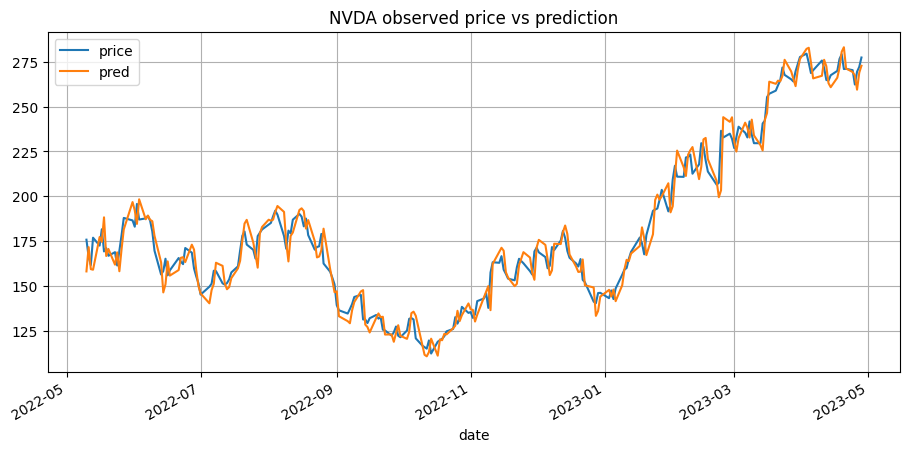

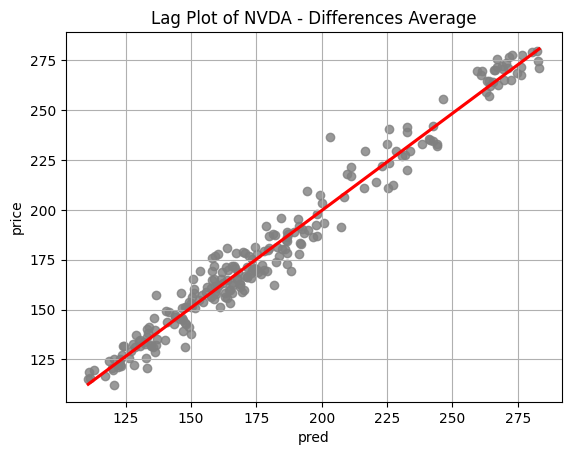

In [31]:
fc3_nvda =  nvda_df[['price']].copy()
diff_avg_nvda = difference_averages(fc3_nvda,3)

diff_avg_nvda.plot( grid=True, figsize= (11,5))
plt.title('NVDA observed price vs prediction'); 

fig, ax = plt.subplots()
ax = sns.regplot(x='pred', y='price', data=diff_avg_nvda, ci=None, scatter_kws=dict(color='0.5'), color = 'r' )
ax.set_title('Lag Plot of NVDA - Differences Average')
plt.grid(); 

In [32]:
diff_avg_nvda.head()

price     pred
date                                       
2022-05-10 00:00:00-04:00 175.7675 158.0559
2022-05-11 00:00:00-04:00 166.1275 171.6085
2022-05-12 00:00:00-04:00 161.5822 159.3180
2022-05-13 00:00:00-04:00 176.8764 159.0016
2022-05-16 00:00:00-04:00 172.4610 177.2460

In [33]:
def assess_predictions(df,price,pred):
    total_error_sqr = 0
    total_predicted = 0
    predictions = df[pred]
    values = df[price]
    for value, pred in zip (values,predictions):
        if pred is not None:
            if pred > 0:
                total_error_sqr += (pred - value)**2
                total_predicted += 1 
                
    rmse = total_error_sqr/total_predicted
    return ( rmse )

In [34]:
def collect_results(df,name_):
    fc1 = naive_forecast(df)
    pa_2 = predict_average(df, 'price', 2)
    pa_3 = predict_average(df, 'price', 3)
    da = difference_averages(df,3)
    
    fc1_rmse = assess_predictions(fc1,'price','naive_pred')
    predict_av_2_rmse = assess_predictions(pa_2,'price','predicted_av_2')
    predict_av_3_rmse = assess_predictions(pa_3,'price','predicted_av_3')
    diff_avg_rmse = assess_predictions(da,'price','pred')
    data_ = {'name':[name_],
         'naive':[fc1_rmse], 
         'av2':[predict_av_2_rmse],
         'av3':[predict_av_3_rmse], 
          'diff_avg':[diff_avg_rmse]}
    
    result_table = pd.DataFrame(data_)
    return(result_table)

I did a loop over the 4 daily datasets to find the rmse results

In [35]:
nvda_df_fct,gold_df_fct, eth_df_fct, amzn_df_fct = nvda_df.copy(),gold_df.copy(), eth_df.copy(), amzn_df.copy()
to_loop = [nvda_df_fct,gold_df_fct, eth_df_fct, amzn_df_fct]
to_loop_name = ['nvda','gold','eth','amzn']

total_results = pd.concat([collect_results(a,b) for a,b in zip(to_loop,to_loop_name)], axis=0)
total_results   

name      naive        av2        av3   diff_avg
0  nvda    41.4278    50.8375    61.7602    55.1523
0  gold   220.4981   270.2535   331.3666   294.9060
0   eth 1,171.6974 1,522.8047 1,958.6783 1,566.6883
0  amzn     3.8541     4.7553     5.9461     5.2459

RSME for Naive Forecast is consistently the lowest among the 4 forecast technique.

# Seasonal Naive

In [36]:
df_cpi_sn = df_cpi[['price']].copy()

In [37]:
df_cpi_sn['pred'] = df_cpi_sn['price'].shift(12)
df_cpi_sn['diff'] = df_cpi_sn['price'] - df_cpi_sn['price'].shift(12)
df_cpi_sn = df_cpi_sn.dropna(axis=0)

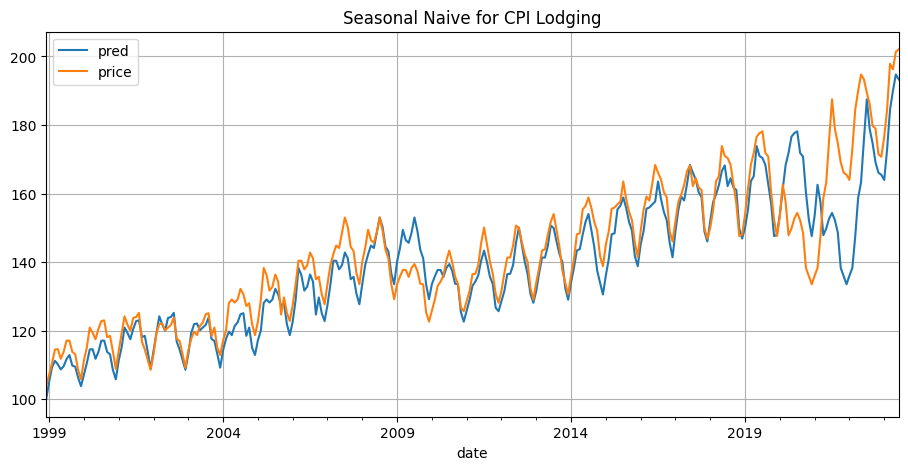

In [38]:
df_cpi_sn[['pred','price']].plot(title='Seasonal Naive for CPI Lodging',grid=True, figsize= (11,5)); 

### experiment with log

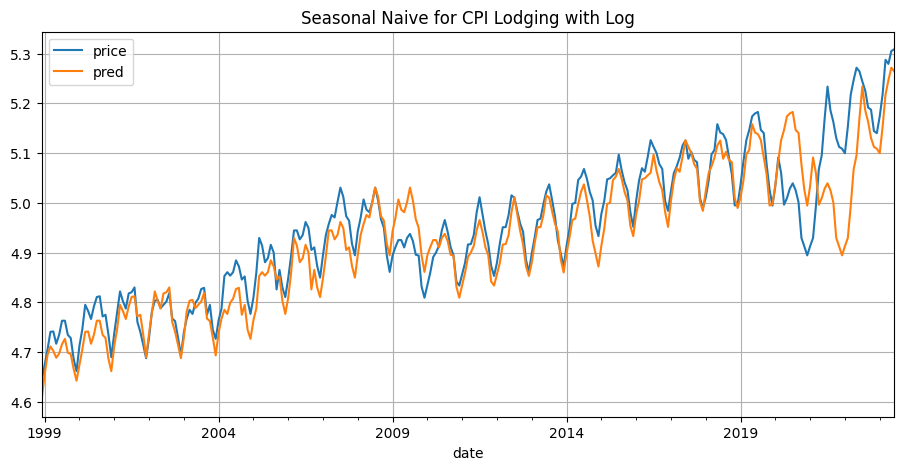

In [39]:
df_cpi_sn_log = df_cpi[['price']].copy()

df_cpi_sn_log = np.log(df_cpi_sn_log)
df_cpi_sn_log['pred'] = df_cpi_sn_log['price'].shift(12)
df_cpi_sn_log = df_cpi_sn_log.dropna(axis=0)

df_cpi_sn_log.plot(title='Seasonal Naive for CPI Lodging with Log',grid=True, figsize= (11,5));

Looks pretty similar with or without log. 

### experiment with shifting of difference(1) 

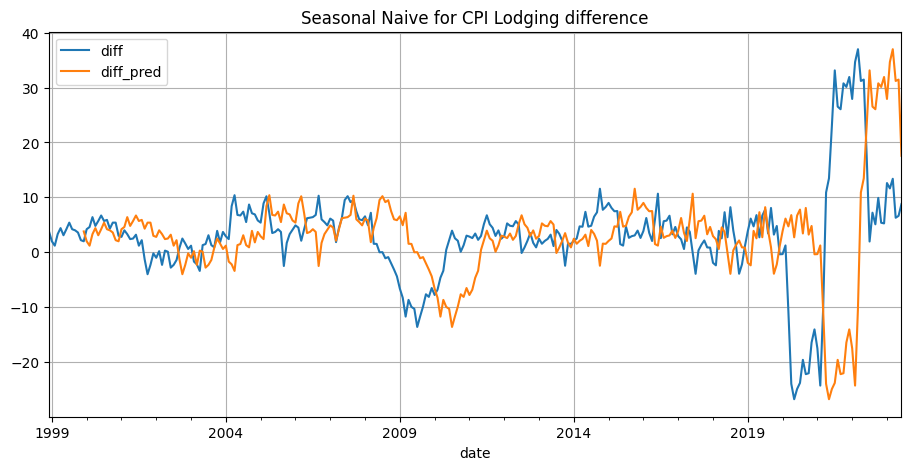

In [40]:
df_cpi_sn['diff_pred'] = df_cpi_sn['diff'].shift(12)
df_cpi_sn[['diff','diff_pred']].plot(title='Seasonal Naive for CPI Lodging difference',grid=True, figsize= (11,5)); 

Nobody could have predicted the fallout of covid-19 in 2020.

# Topic 4: Simulated Trading

In [41]:
amzn_df_sim_ = amzn_df[['price']].copy()

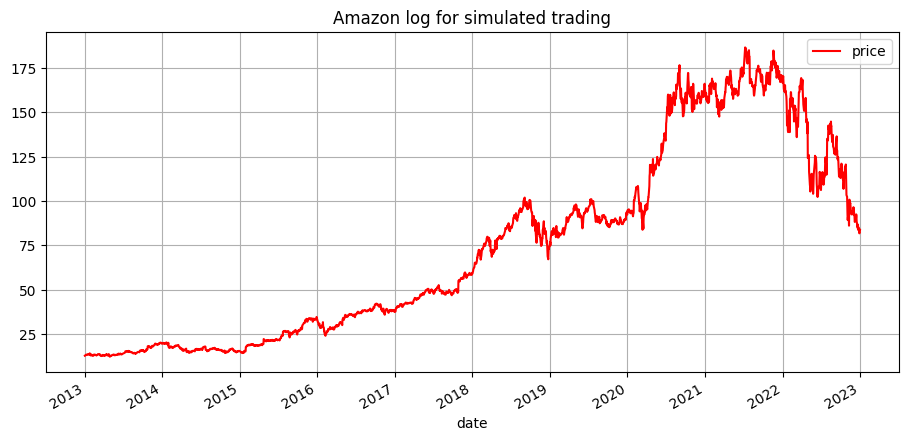

In [42]:
amzn_df_sim_.plot(c='r',title='Amazon log for simulated trading',grid=True, figsize= (11,5)); 

In [43]:
def train_ar(values, order):
    target_vector = np.array(values[order:])
    lagged_values = []
    for i in range(len(values) - order):
        lagged_values.append(values[i:i+order])
    design_matrix = np.array(lagged_values)
    return np.linalg.inv(design_matrix.transpose() @ design_matrix) @ \
        design_matrix.transpose() @ target_vector

In [44]:
def predict(coeffs, data):
    predicted_values = [math.nan] * len(coeffs)
    for i in range(len(coeffs), len(data)):
        predicted_values.append(np.dot(coeffs, data[i-len(coeffs):i]))
    return np.array(predicted_values)

In [45]:
training_data = np.log(amzn_df_sim_['price']['2013-01-02':'2020-12-31'])
model_coeffs = train_ar(training_data, 3)
print (model_coeffs)

[0.01173978 0.0155967  0.97299589]


In [46]:
test_data = amzn_df_sim_['price']['2021-01-01':'2022-12-31']
log_prediction = predict(model_coeffs, np.log(test_data))

In [47]:
test_data_ = pd.DataFrame(test_data)
test_data_['predicted'] = np.exp(log_prediction)
test_data_ = test_data_.dropna(axis=0)
test_data_.head()

price  predicted
date                                         
2021-01-07 00:00:00-05:00 158.1080   157.2729
2021-01-08 00:00:00-05:00 159.1350   158.3885
2021-01-11 00:00:00-05:00 155.7105   159.3610
2021-01-12 00:00:00-05:00 156.0415   156.0529
2021-01-13 00:00:00-05:00 158.2945   156.3345

In [48]:
test_data_['isHolding'] = test_data_['predicted'] > \
                            test_data_['price'].shift() * 1.001
test_data_.head()

price  predicted  isHolding
date                                                    
2021-01-07 00:00:00-05:00 158.1080   157.2729      False
2021-01-08 00:00:00-05:00 159.1350   158.3885       True
2021-01-11 00:00:00-05:00 155.7105   159.3610       True
2021-01-12 00:00:00-05:00 156.0415   156.0529       True
2021-01-13 00:00:00-05:00 158.2945   156.3345       True

In [49]:
test_data_['isHolding'].value_counts()

isHolding
True     431
False     69
Name: count, dtype: int64

In [50]:
last_price = None
portfolio_value = 10000
values = []
for ts, (close, _, is_holding) in test_data_.iterrows():
    if is_holding:
        portfolio_value *= close / last_price
    last_price = close
    values.append(portfolio_value)

test_data_['EquityValue'] = values
test_data_.tail(20)

price  predicted  isHolding  EquityValue
date                                                                
2022-12-02 00:00:00-05:00 94.1300    95.6242       True   5,893.4632
2022-12-05 00:00:00-05:00 91.0100    94.3215       True   5,698.1209
2022-12-06 00:00:00-05:00 88.2500    91.2461       True   5,525.3176
2022-12-07 00:00:00-05:00 88.4600    88.4910       True   5,538.4656
2022-12-08 00:00:00-05:00 90.3500    88.6182       True   5,656.7981
2022-12-09 00:00:00-05:00 89.0900    90.4305      False   5,656.7981
2022-12-12 00:00:00-05:00 90.5500    89.2351       True   5,749.5017
2022-12-13 00:00:00-05:00 92.4900    90.6604       True   5,872.6823
2022-12-14 00:00:00-05:00 91.5800    92.5579      False   5,872.6823
2022-12-15 00:00:00-05:00 88.4500    91.7196       True   5,671.9669
2022-12-16 00:00:00-05:00 87.8600    88.6764       True   5,634.1326
2022-12-19 00:00:00-05:00 84.9200    88.0428       True   5,445.6013
2022-12-20 00:00:00-05:00 85.1900    85.1313       True   5,462.9156
2022-12-21 00:00:00-05:00 86.7700    85.3426       True   5,564.2347
2022-12-22 00:00:00-05:00 83.7900    86.8519      False   5,564.2347
2022-12-23 00:00:00-05:00 85.2500    83.9755       True   5,661.1888
2022-12-27 00:00:00-05:00 83.0400    85.3708       True   5,514.4295
2022-12-28 00:00:00-05:00 81.8200    83.2049       True   5,433.4130
2022-12-29 00:00:00-05:00 84.1800    81.9983       True   5,590.1334
2022-12-30 00:00:00-05:00 84.0000    84.2533      False   5,590.1334

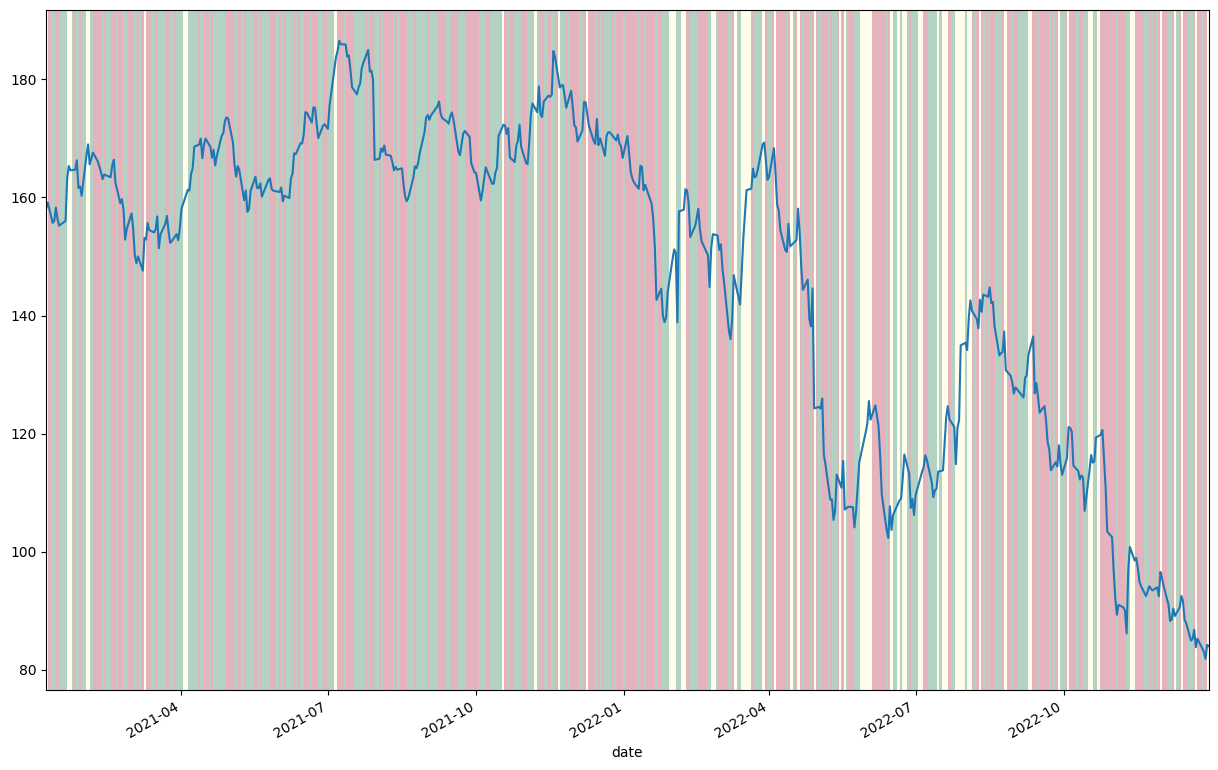

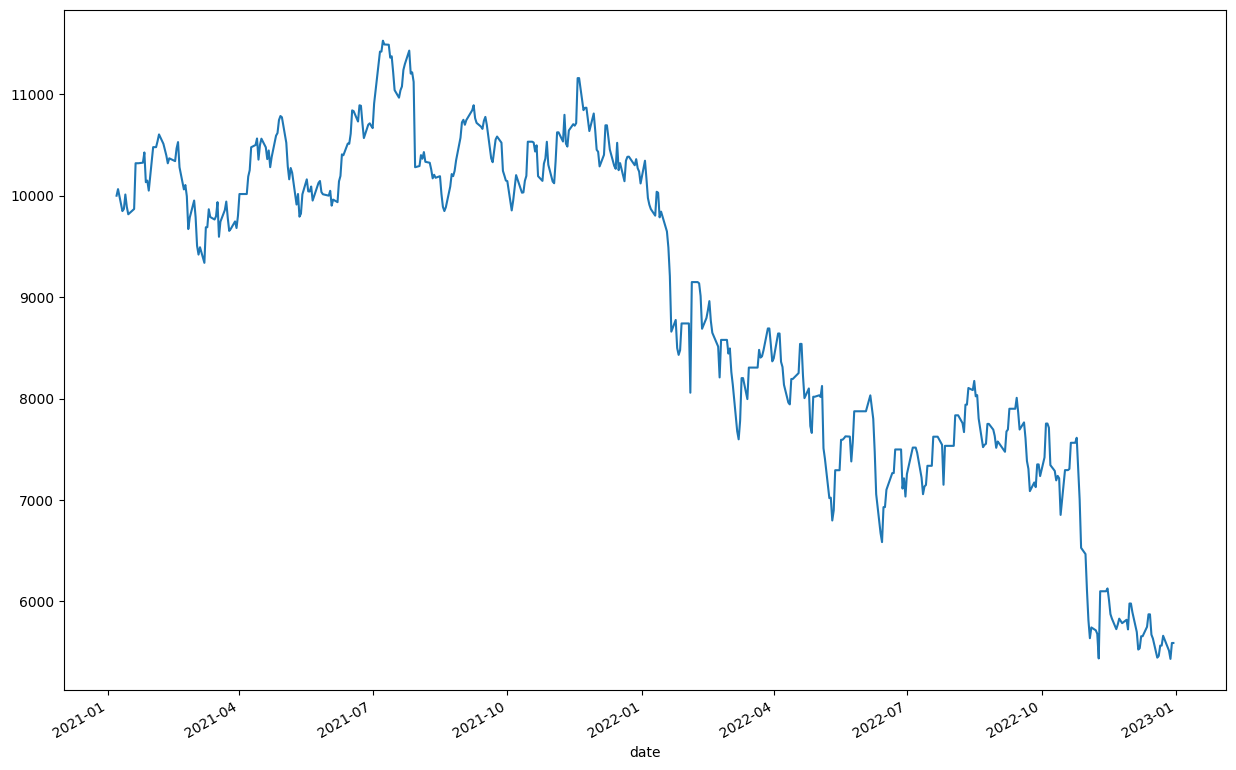

In [51]:
offsets = (test_data_['isHolding'] * (test_data_['price'].shift(-1) - \
                test_data_['price']))
has_increased = ((test_data_['price'].shift(-1) > test_data_['price']) & \
                test_data_['isHolding']).astype(int)
has_decreased = ((test_data_['price'].shift(-1) < test_data_['price']) & \
                 test_data_['isHolding']).astype(int)

plt.rcParams['figure.figsize'] = [15, 10]
ax = test_data_['price'].plot()
offset_start = has_increased.index[0].timestamp() / 24 / 60 / 60
offset_end = has_increased.index[-1].timestamp() / 24 / 60 / 60
ax.pcolorfast((offset_start, offset_end), ax.get_ylim(),
    (has_increased - has_decreased).values[np.newaxis],
    cmap='RdYlGn', alpha = 0.3)
plt.figure()
test_data_['EquityValue'].plot();

There are more losing days than winning days. It seems that the portfolio value has decreased. 

# Topic 5: Monte Carlo

In [52]:
import math

def rmse(predicted, actual):
    diffs = predicted - actual
    return math.sqrt(np.mean(diffs ** 2))

In [53]:
mc = nvda_df[['price']].copy()

In [54]:
ar_deg = 4
model = sm.tsa.AutoReg(mc['price'].reset_index()['price'], ar_deg, trend='n').fit()

In [55]:
coeffs = list(reversed(model.params))
print(coeffs)

[0.07191387030680596, 0.0074024600135499385, -0.08551619965190577, 1.008862213940838]


In [56]:
std_dev = rmse(model.predict(),mc['price'].reset_index()['price'])
print(std_dev)

6.256210479024683


In [57]:
num_samples = 5

initial_values = np.array(mc['price'][-10:]).reshape(1,-1)
print(initial_values)

values = np.broadcast_to(initial_values, (num_samples, 10))
print(values)

[[269.99203491 276.64138794 279.28109741 271.01196289 271.16192627
  270.39202881 262.38284302 269.53210449 272.23184204 277.46127319]]
[[269.99203491 276.64138794 279.28109741 271.01196289 271.16192627
  270.39202881 262.38284302 269.53210449 272.23184204 277.46127319]
 [269.99203491 276.64138794 279.28109741 271.01196289 271.16192627
  270.39202881 262.38284302 269.53210449 272.23184204 277.46127319]
 [269.99203491 276.64138794 279.28109741 271.01196289 271.16192627
  270.39202881 262.38284302 269.53210449 272.23184204 277.46127319]
 [269.99203491 276.64138794 279.28109741 271.01196289 271.16192627
  270.39202881 262.38284302 269.53210449 272.23184204 277.46127319]
 [269.99203491 276.64138794 279.28109741 271.01196289 271.16192627
  270.39202881 262.38284302 269.53210449 272.23184204 277.46127319]]


In [58]:
trajectory_length = 15
for i in range(trajectory_length):
    next_prediction = values[:,-ar_deg:] @ coeffs
    next_column = next_prediction + std_dev * np.random.randn(num_samples)
    values = np.append(values, next_column.reshape(num_samples, 1), axis=1)

In [59]:
next_prediction

array([296.00026878, 274.20424296, 271.73863179, 300.07088652,
       273.32255433])

In [60]:
next_column

array([296.34343689, 272.61387233, 277.69491364, 306.01826984,
       268.56159716])

In [61]:
values

array([[269.99203491, 276.64138794, 279.28109741, 271.01196289,
        271.16192627, 270.39202881, 262.38284302, 269.53210449,
        272.23184204, 277.46127319, 274.61778226, 273.64985024,
        283.29281775, 286.04810217, 285.0394783 , 291.8925697 ,
        298.22398483, 301.07784306, 296.54689675, 304.0493269 ,
        303.41140256, 309.24140586, 303.00639047, 295.18757294,
        296.34343689],
       [269.99203491, 276.64138794, 279.28109741, 271.01196289,
        271.16192627, 270.39202881, 262.38284302, 269.53210449,
        272.23184204, 277.46127319, 280.49578372, 285.73507173,
        272.75164034, 267.90552565, 276.34140742, 271.49196571,
        259.39068   , 255.34721595, 252.4963862 , 250.57233198,
        261.3822351 , 267.43369277, 259.58085131, 273.20473667,
        272.61387233],
       [269.99203491, 276.64138794, 279.28109741, 271.01196289,
        271.16192627, 270.39202881, 262.38284302, 269.53210449,
        272.23184204, 277.46127319, 287.22288553, 264.9433

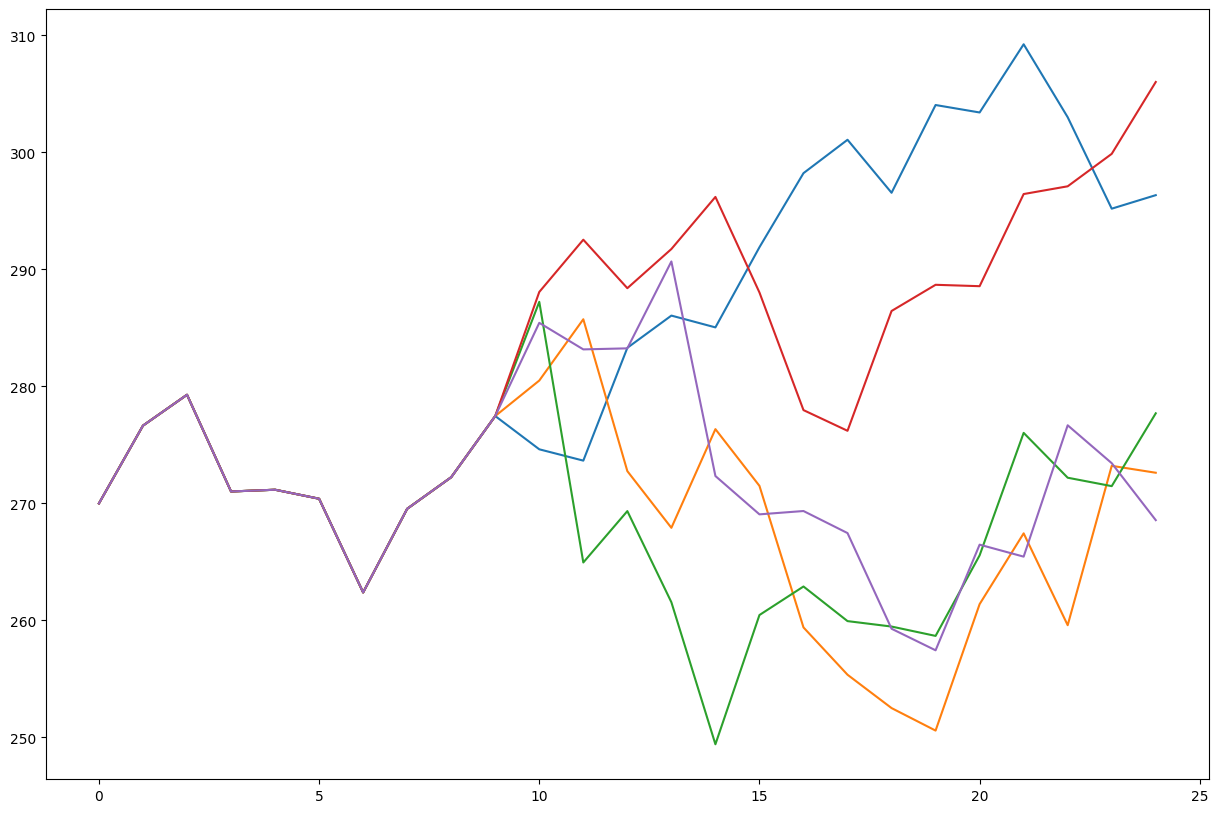

In [62]:
 _=plt.plot(values.transpose())

### with 1000 samples 

In [63]:
num_samples = 1000
values = np.broadcast_to(initial_values, (num_samples, 10))
trajectory_length = 100 #100 days into the future 
for i in range(trajectory_length):
    next_prediction = values[:,-ar_deg:] @ coeffs
    next_column = next_prediction + std_dev * np.random.randn(num_samples)
    values = np.append(values, next_column.reshape(num_samples, 1), axis=1)

#_=plt.plot(values.transpose())

I plot it in dataframe style. 

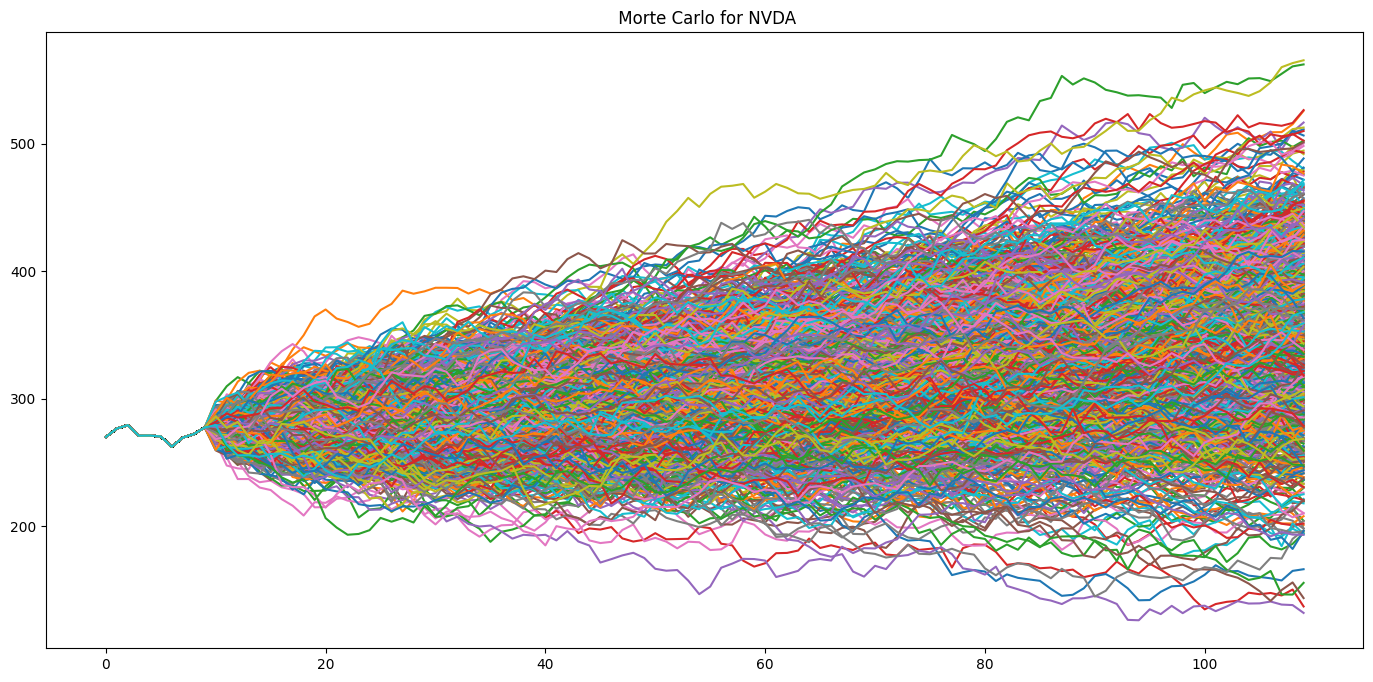

In [64]:
values_transpose_df = pd.DataFrame(values.transpose())#.plot(legends=False);
values_transpose_df.plot(legend=False, figsize=(17,8), title=" Morte Carlo for NVDA");

What is the probability that NVDA will reach between \\$280 to \\$300?

In [65]:
arr = next_column
def prob_between (lower,higher):
    count = np.count_nonzero((arr > lower ) & (arr < higher))
    return count/arr.size

prob_between(280,300)

0.073

There is a probability of 9.5% for NVDA to reach between \\$280 to \\$300?

In [66]:
mc.describe().T

count     mean     std      min      25%      50%      75%      max
price 248.0000 180.7636 44.3303 112.2106 151.3399 169.5869 203.2454 279.6211

In [67]:
initial_values

array([[269.99203491, 276.64138794, 279.28109741, 271.01196289,
        271.16192627, 270.39202881, 262.38284302, 269.53210449,
        272.23184204, 277.46127319]])

In [68]:
initial_values[0,9]

277.4612731933594

In [69]:
threshold = .95 * initial_values[0,9]
booleans = values < threshold
bad_rows= np.any(booleans,axis=1)
bad_rows.sum()
prob_stopping_out = bad_rows.sum()/num_samples
prob_stopping_out

1.0

### Kernel Density Function

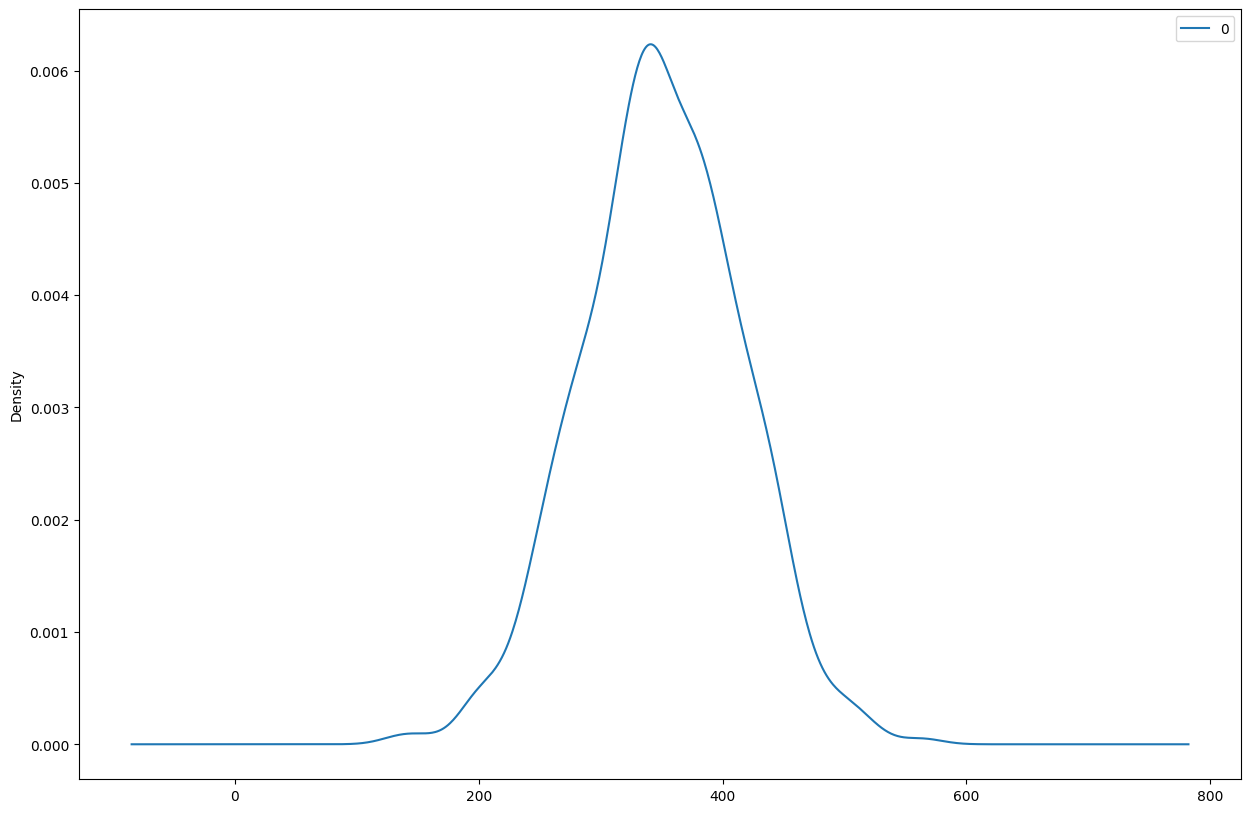

In [70]:
last_pos = values_transpose_df.tail(1).values[0]
last_pos_df = pd.DataFrame(last_pos)

last_pos_df.plot.kde();

Taking the values from the last observation to form the KDE. It looks like a normal distribution, as expected. 

# Topic 6 - Decomposition
# Smoothing

### 1. Moving average Smoothing

In [71]:
def ma_smooth(df, col_name, smoothing_days):
    new_col_name_ = 'smoothed_{}'.format(smoothing_days)
    df[new_col_name_] = df[col_name].rolling(smoothing_days).mean()
    df.dropna(axis=0, inplace=True)
    return (df)

In [72]:
smooth_1 =  nvda_df[['price']].copy()
smoothed_1 = ma_smooth(smooth_1,'price',5)

#smoothed_1.plot(grid=True, figsize= (11,5)); 

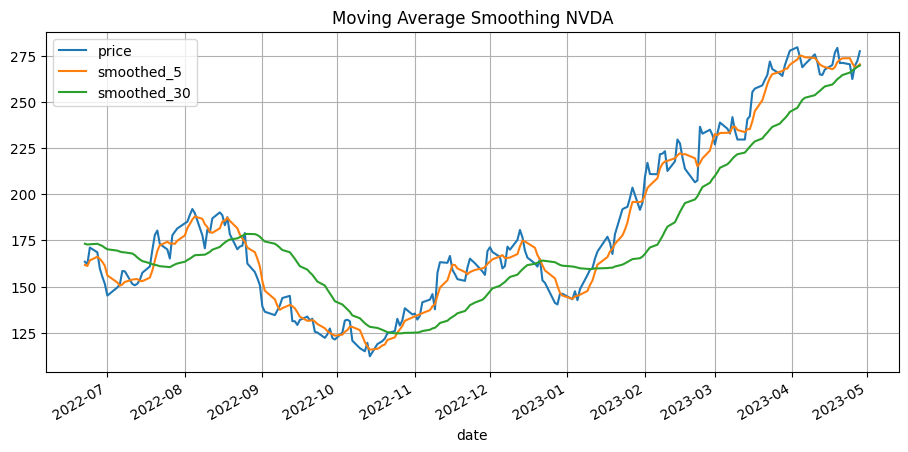

In [73]:
smoothed_2 = ma_smooth(smooth_1,'price',30)

smoothed_2.plot(grid=True, figsize= (11,5),title='Moving Average Smoothing NVDA');

when we increase on the rolling days, the yellow curve will get smoother

### 2. Exponential Smoothing

In [74]:
#holt? 

In [75]:
def expo_smooth(df, col_name, alpha_):
    #new_col_name_ = 'smoothed_{}'.format(alpha_)
    new_col_name_ = 'trend' 
    df[new_col_name_] = df.ewm(alpha=alpha_, adjust=False).mean()
    df['residual'] = df[col_name] - df[new_col_name_]
    df.dropna(axis=0, inplace=True)
    return (df)

In [76]:
expo_smooth_ =  nvda_df[['price']].copy()
expo_smooth_1 = expo_smooth(expo_smooth_ , 'price', alpha_=0.05)

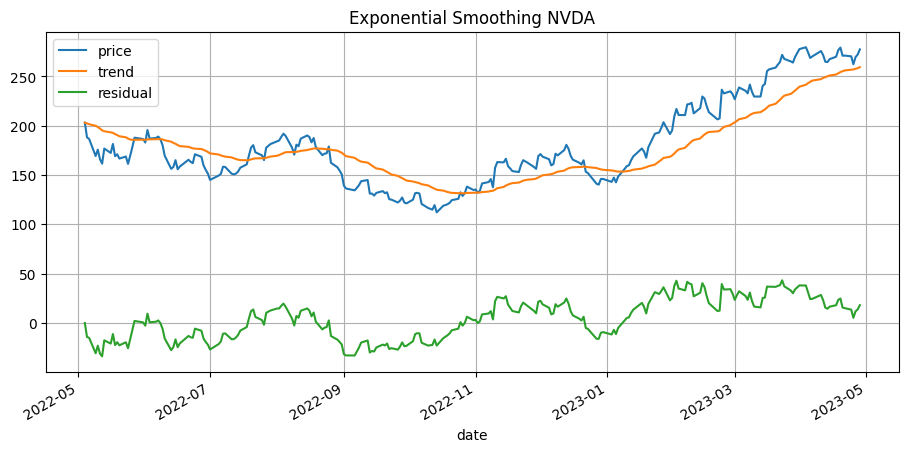

In [77]:
expo_smooth_1.plot(grid=True, figsize= (11,5),title='Exponential Smoothing NVDA');

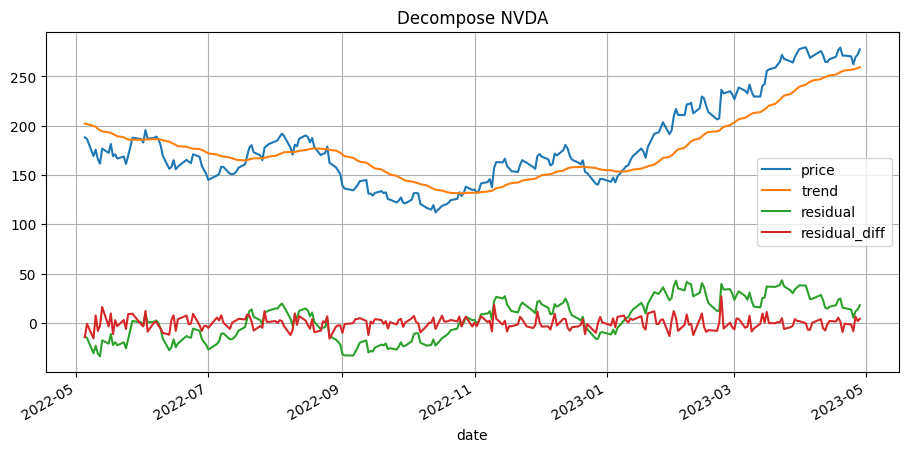

In [78]:
def decompose_ (df):
    df['residual_diff'] = df['residual'] - df['residual'].shift(1)
    df.dropna(axis=0, inplace=True)
    return(df)

expo_smooth_1d = decompose_ (expo_smooth_1)
expo_smooth_1d.plot(grid=True, figsize= (11,5),title='Decompose NVDA');

In [79]:
my_adfuller(expo_smooth_1d['residual_diff'])

ADF Statistic: -12.022466
p-value: 0.000000
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573


In [80]:
my_adfuller(expo_smooth_1d['residual'])

ADF Statistic: -2.375704
p-value: 0.148711
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573


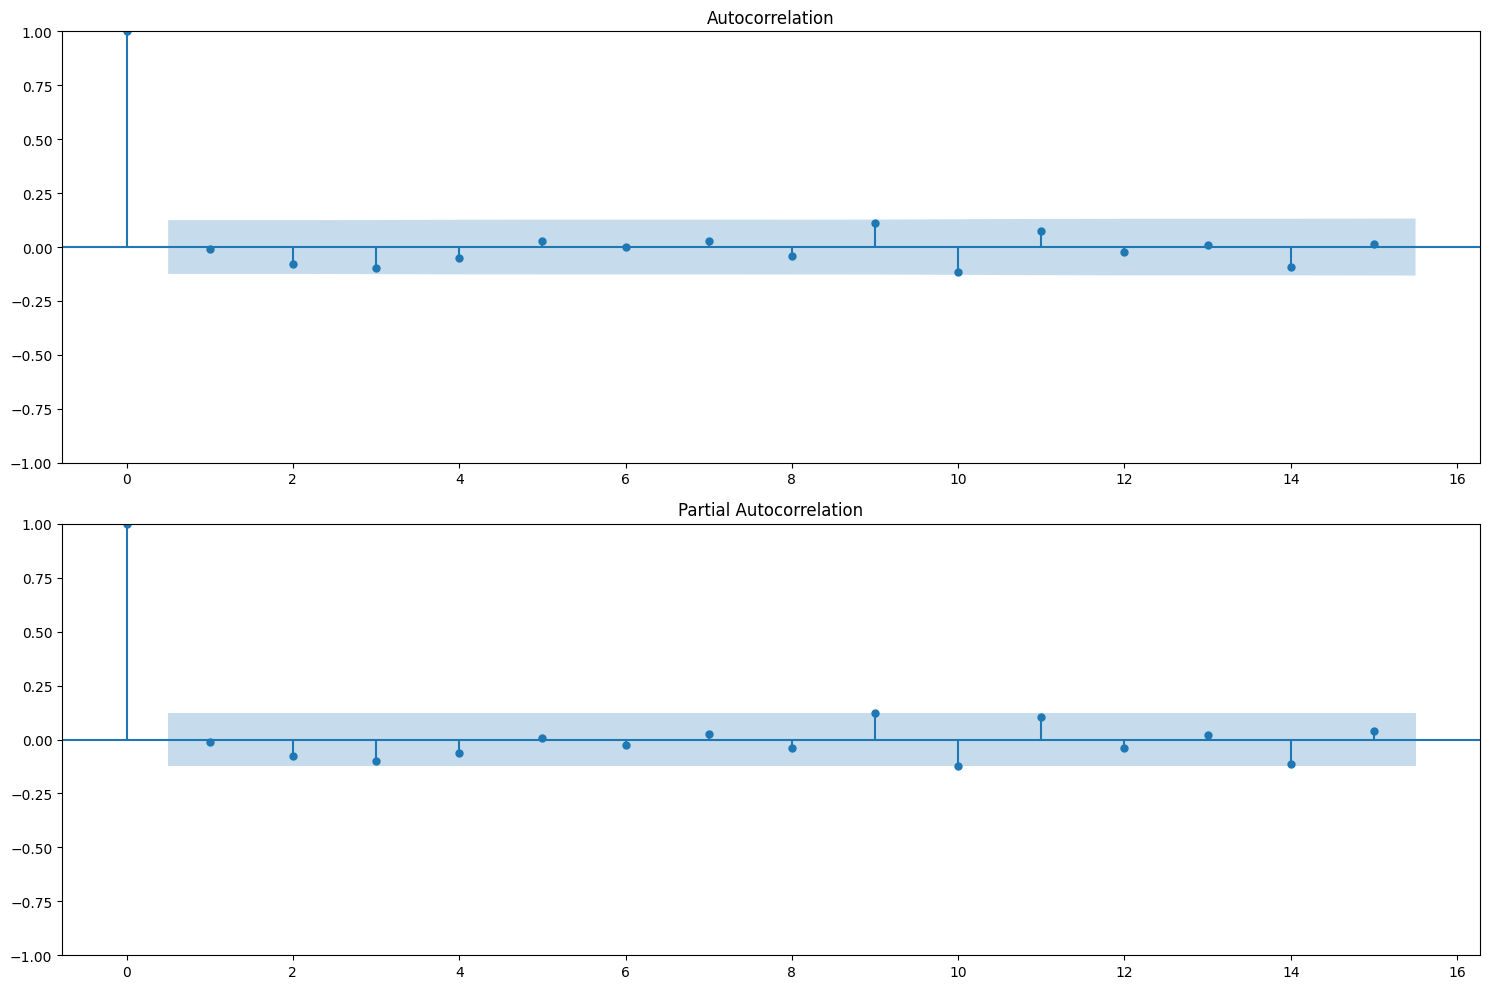

In [81]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

use_series = expo_smooth_1d['residual_diff']
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
plot_acf(use_series,lags=15, ax=ax[0])
plot_pacf(use_series,lags=15, ax=ax[1], method='ols')

plt.tight_layout()
plt.show() #strongly regressive

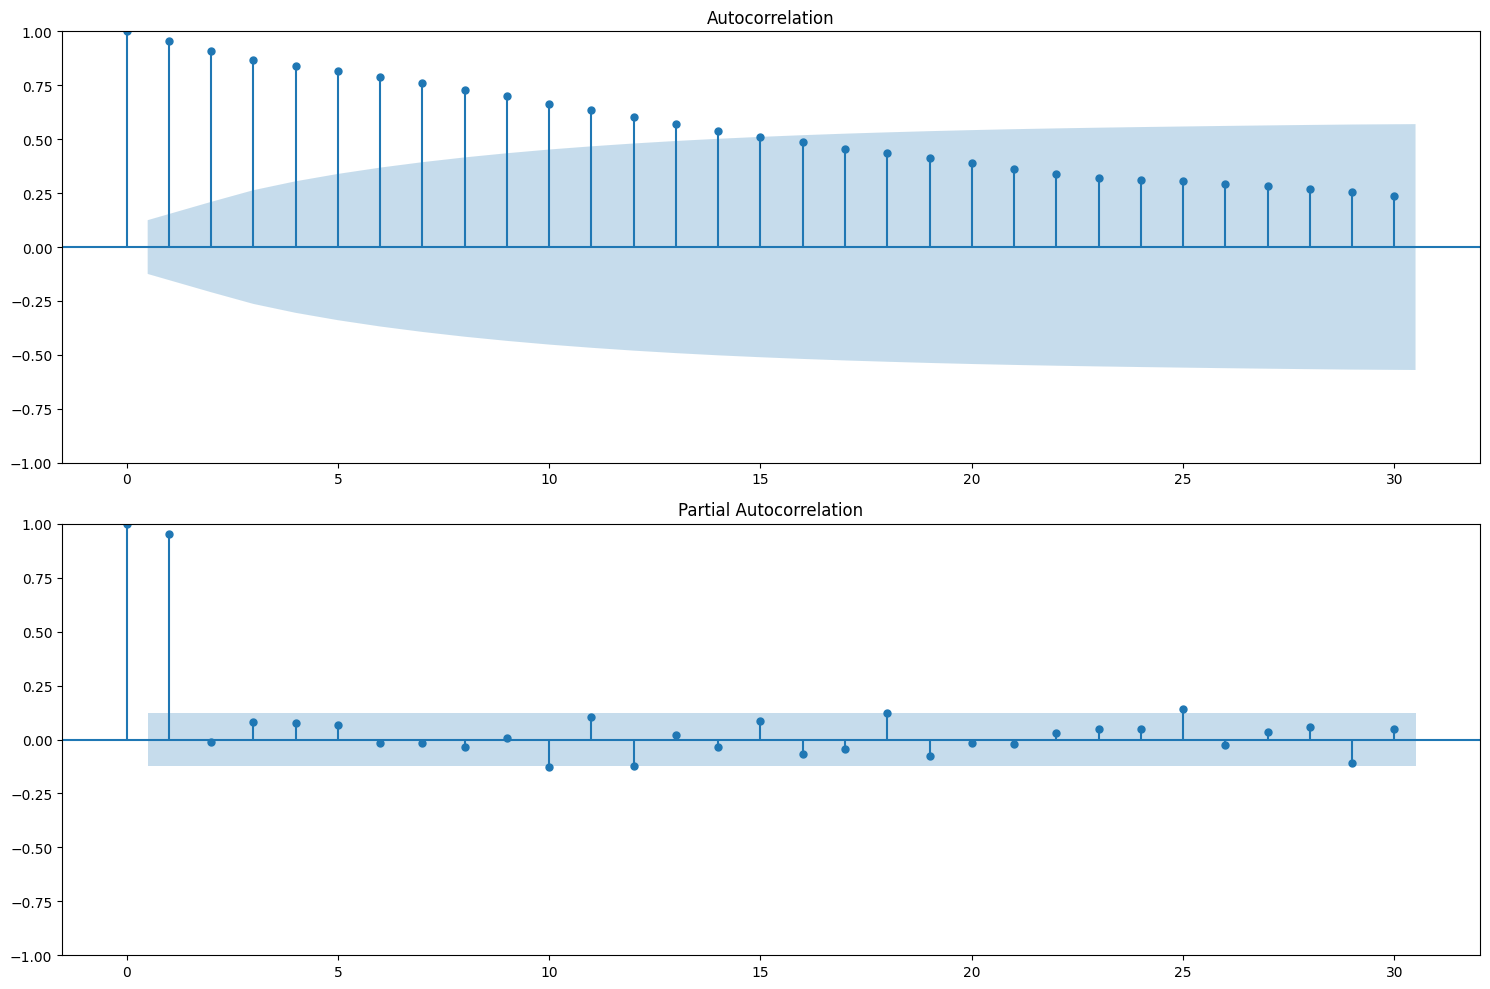

In [82]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

use_series = expo_smooth_1d['residual']
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
plot_acf(use_series,lags=30, ax=ax[0])
plot_pacf(use_series,lags=30, ax=ax[1], method='ols')

plt.tight_layout()
plt.show() #strongly regressive

In [83]:
def train_ar(values, order):
    target_vector = np.array(values[order:])
    lagged_values = []
    for i in range(len(values) - order):
        lagged_values.append(values[i:i+order])
        design_matrix = np.array(lagged_values)
    return np.linalg.inv(design_matrix.transpose() @ design_matrix) \
                        @ design_matrix.transpose() @ target_vector

In [84]:
diff_arcoefs = train_ar(expo_smooth_1d['residual_diff'],1)
diff_arcoefs

array([-0.00962491])

In [85]:
import math
def predict(coeffs, data):
    predicted_values = [math.nan] * len(coeffs) # we cannot predict the first few values
    for i in range(len(coeffs), len(data)):
        predicted_values.append(np.dot(coeffs, data[i-len(coeffs):i]))
    return np.array(predicted_values)

In [86]:
diff_predict = predict (diff_arcoefs, expo_smooth_1d['residual_diff'])
resid_predict = diff_predict + expo_smooth_1d['residual'].shift()

trend_prediction = 2 * expo_smooth_1d['trend'].shift(1) - expo_smooth_1d['trend'].shift(2)

expo_smooth_1d['prediction'] = trend_prediction + resid_predict # diff_predict
expo_smooth_1d.dropna(axis=0, inplace=True)

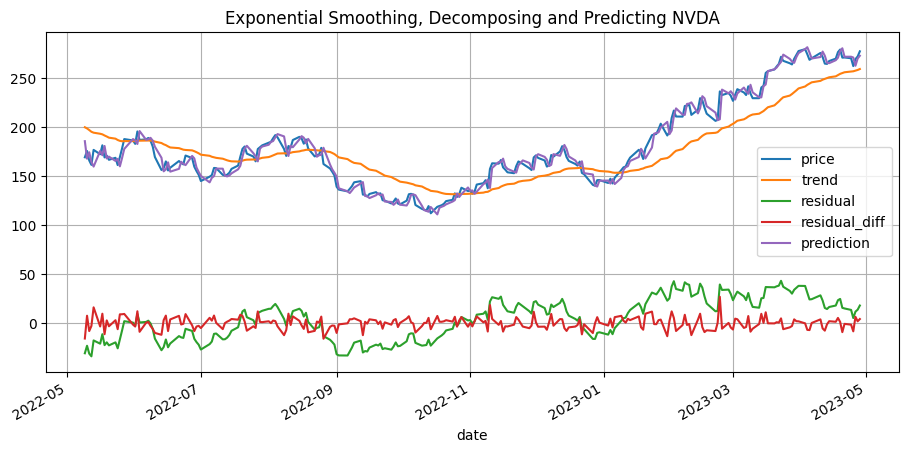

In [87]:
expo_smooth_1d.plot(title='Exponential Smoothing, Decomposing and Predicting NVDA',
                   grid=True, figsize= (11,5));

In [88]:
expo_smooth_1d_rmse = assess_predictions(expo_smooth_1d,'price','prediction')
expo_smooth_1d_rmse 

41.68188970004468

This rmse is about the same as the naive forecast as seen earlier.

In [89]:
expo_smooth_1d[['price']].describe().T

count     mean     std      min      25%      50%      75%      max
price 245.0000 180.6181 44.5746 112.2106 151.1750 169.4737 203.5943 279.6211

### Lowess

In [90]:
lowess = sm.nonparametric.lowess

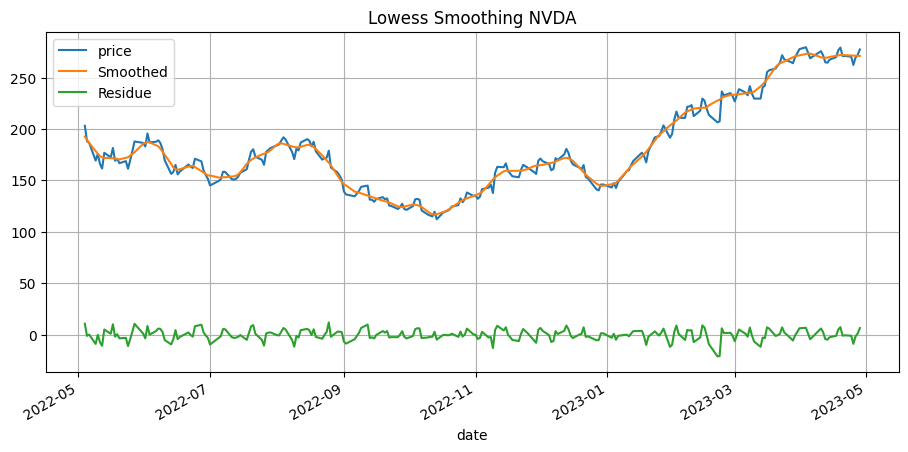

In [91]:
nvda_df_low = nvda_df[['price']].copy()
nvda_df_low['Smoothed'] = lowess(nvda_df_low['price'],nvda_df_low.index, frac=0.05, )[:,1]
nvda_df_low['Residue'] = nvda_df_low['price'] - nvda_df_low['Smoothed']
nvda_df_low.plot(title='Lowess Smoothing NVDA',
                   grid=True, figsize= (11,5));

C:\Users\sgrya\anaconda3\envs\myts\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


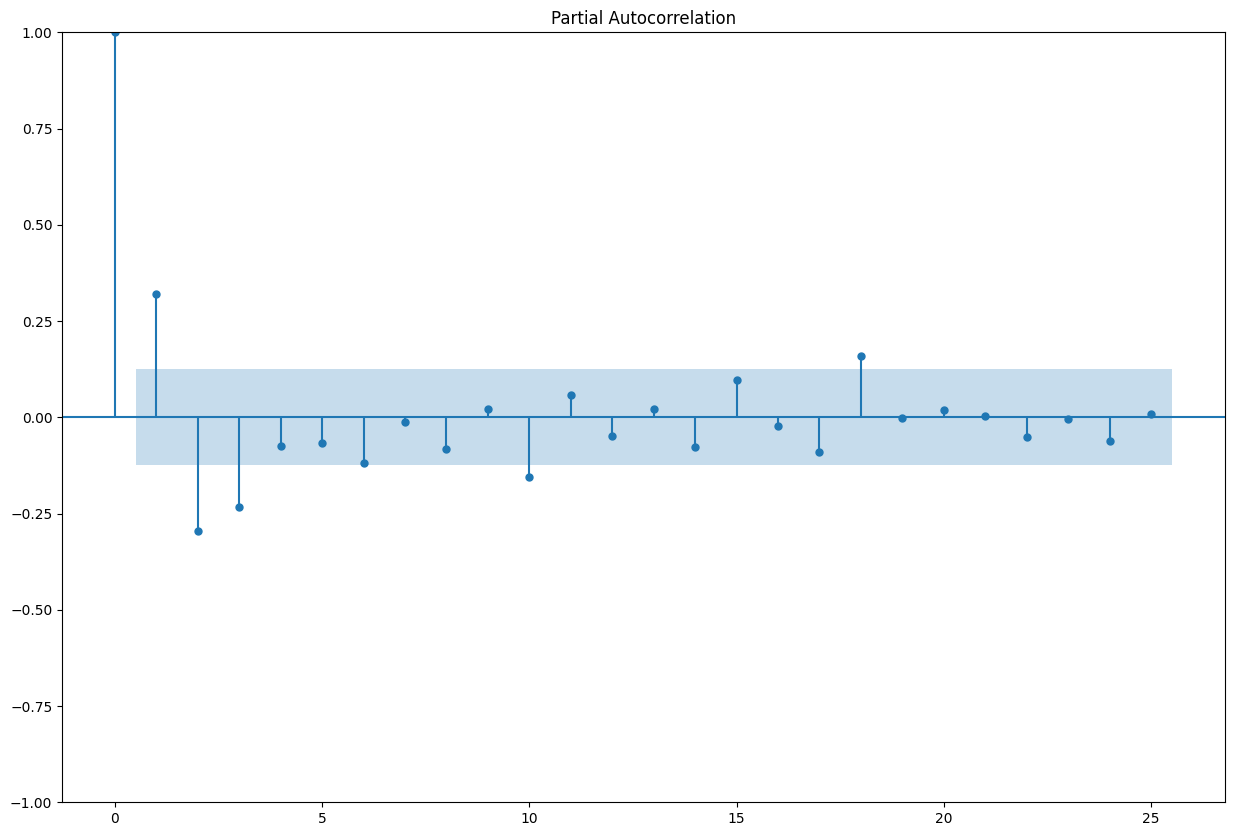

In [92]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf

plot_pacf(nvda_df_low[['Residue']], lags=25)
pyplot.show();

In [93]:
from statsmodels.tsa.ar_model import AutoReg
nvda_df_low_ar_model = AutoReg(nvda_df_low.reset_index()['Residue'], lags = 3, trend = 'n' ).fit()
nvd_res_prediction = nvda_df_low_ar_model.predict()
nvd_res_prediction.index = nvda_df_low.index

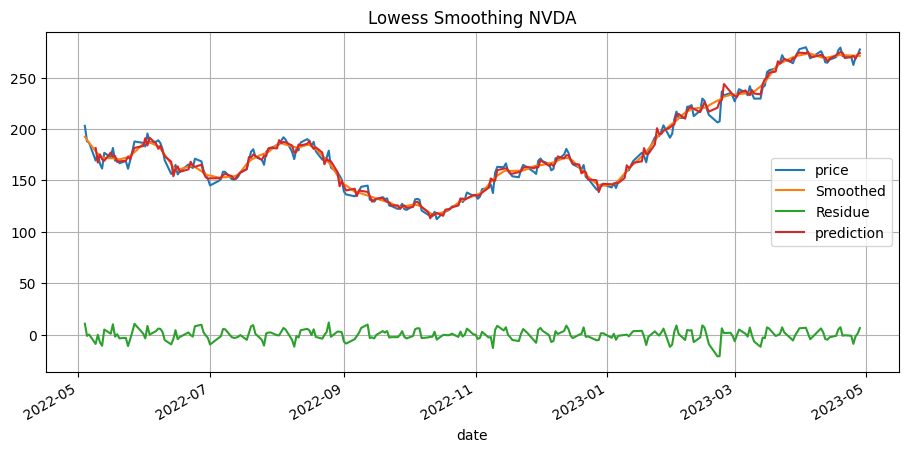

In [94]:
nvd_trend_prediction = 2 * nvda_df_low['Smoothed'].shift(1) - nvda_df_low['Smoothed'].shift(2)

nvd_prediction = nvd_trend_prediction + nvd_res_prediction
nvda_df_low['prediction'] = nvd_prediction
nvda_df_low.plot(title='Lowess Smoothing NVDA',
                   grid=True, figsize= (11,5));

In [95]:
nvda_df_low_rmse = assess_predictions(nvda_df_low,'price','prediction')
nvda_df_low_rmse

23.09521959671984

This is of great imporovement over the naive forecast as seen earlier

We did another round of lowess manual decomposition with a log version of ETH; thereafter transforming it back to its real price scale. 

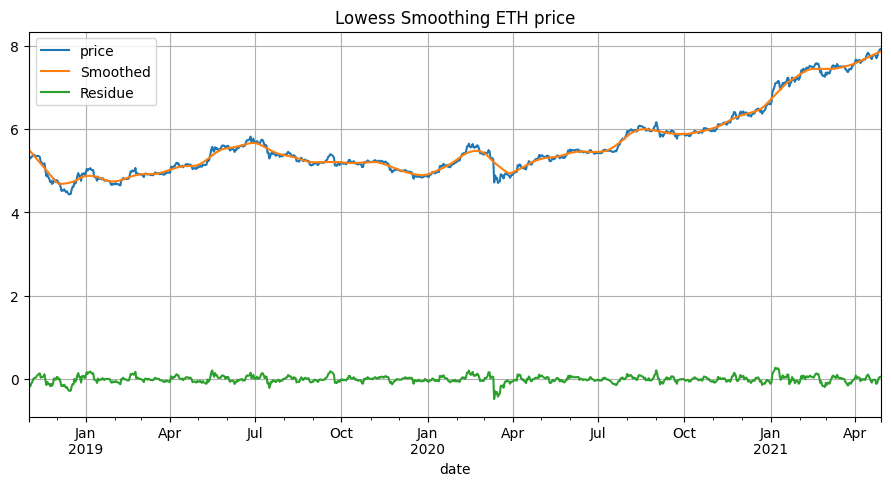

In [96]:
eth_df_low = eth_df[['price']].copy()
eth_df_low['price'] = np.log(eth_df_low['price']) # we use logged version 
eth_df_low['Smoothed'] = lowess(eth_df_low['price'],eth_df_low.index, frac=0.05, )[:,1]
eth_df_low['Residue'] = eth_df_low['price'] - eth_df_low['Smoothed']
eth_df_low.plot(title='Lowess Smoothing ETH price',
                   grid=True, figsize= (11,5));

C:\Users\sgrya\anaconda3\envs\myts\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


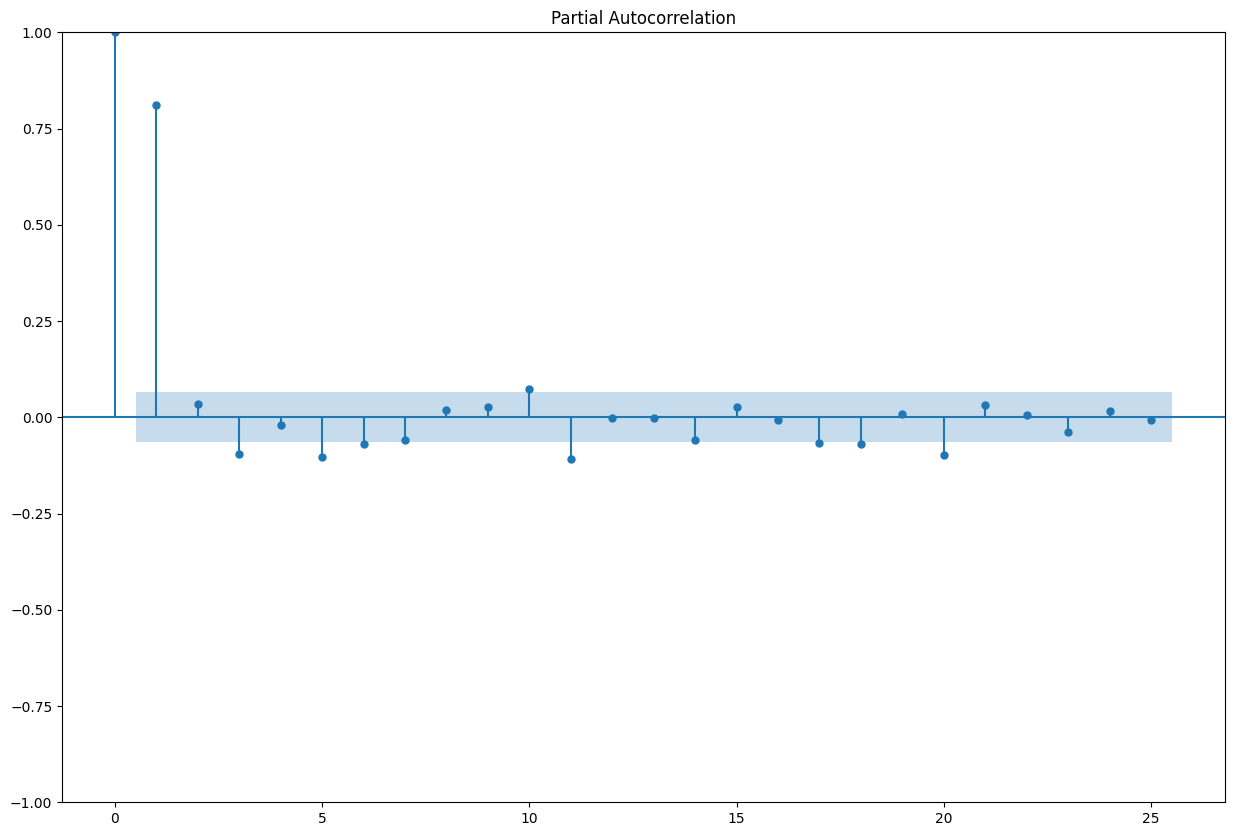

In [97]:
plot_pacf(eth_df_low[['Residue']], lags=25)
pyplot.show();

In [98]:
from statsmodels.tsa.ar_model import AutoReg
eth_df_low_ar_model = AutoReg(eth_df_low.reset_index()['Residue'], lags = 5, trend = 'n' ).fit()
eth_res_prediction = eth_df_low_ar_model.predict()
eth_res_prediction.index = eth_df_low.index

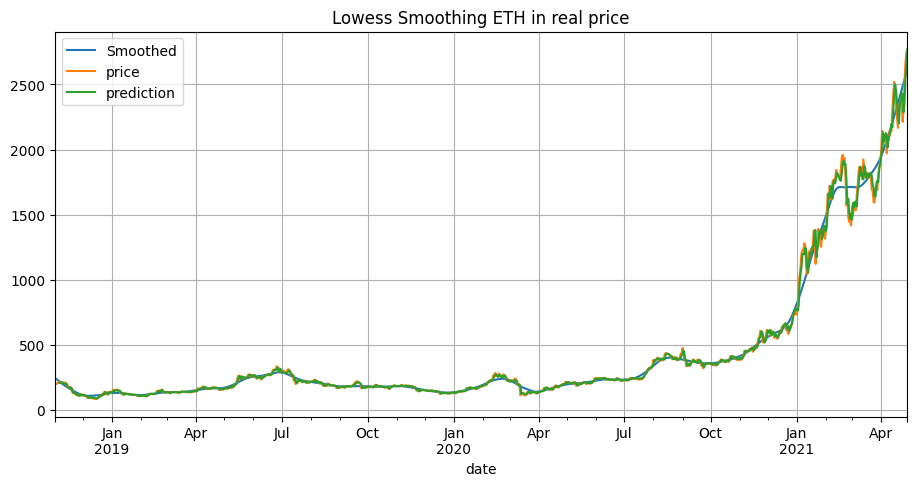

In [99]:
eth_trend_prediction = 2 * eth_df_low['Smoothed'].shift(1) - eth_df_low['Smoothed'].shift(2)

eth_prediction = eth_trend_prediction + eth_res_prediction
eth_df_low['prediction'] = eth_prediction
real_eth_df_low = np.exp(eth_df_low)
real_eth_df_low[['Smoothed','price','prediction']].plot(title='Lowess Smoothing ETH in real price',
                   grid=True, figsize= (11,5));

In [100]:
real_eth_df_low_rmse = assess_predictions(real_eth_df_low,'price','prediction')
real_eth_df_low_rmse

1007.1561698115609

Again, this is of great improvement over the naive forecast as seen earlier.

# Seasonal Decomposition
## FFT

I have used an excerpt from CPI Lodging Away from Home (which is seasonal) to demonstrate seaonal decomposition using FFT. 

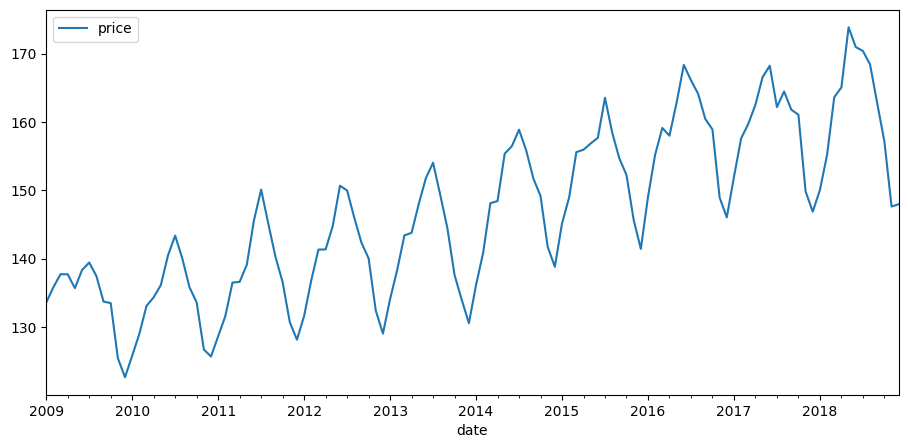

In [101]:
df_cpi_x = df_cpi_.loc['2009':'2018'].copy()
df_cpi_x.plot(figsize= (11,5));

For this example, it looks multiplicative. 

In [102]:
df_cpi_x.shape

(120, 1)

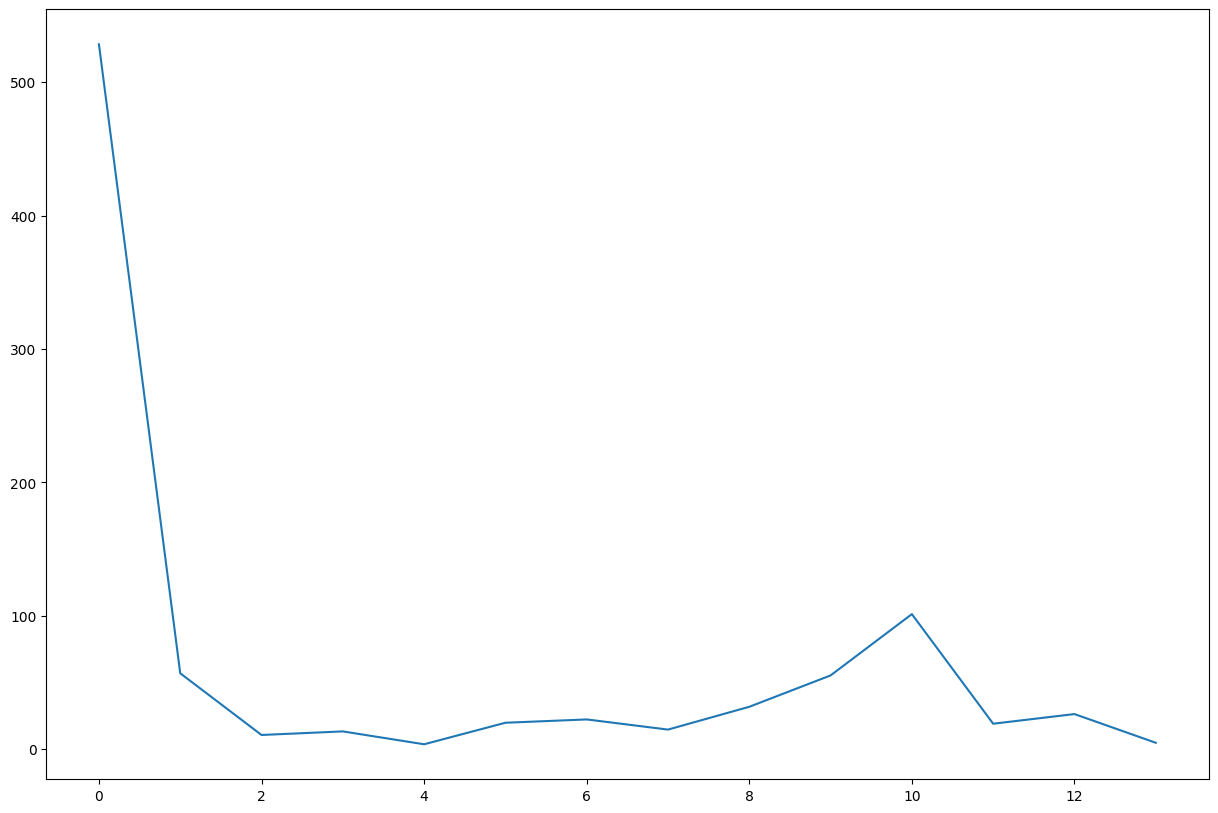

In [103]:
cpi_fft = np.abs(np.fft.fft(df_cpi_x['price'])[10:len(df_cpi_x)//5])
plt.plot(cpi_fft[:]); #peaks at 15 

I took the peak at 10. 

In [104]:
10+10 #since we started at 10 

20

In [105]:
len(df_cpi_x)/20 # we will use 6.0 for this simulation

6.0

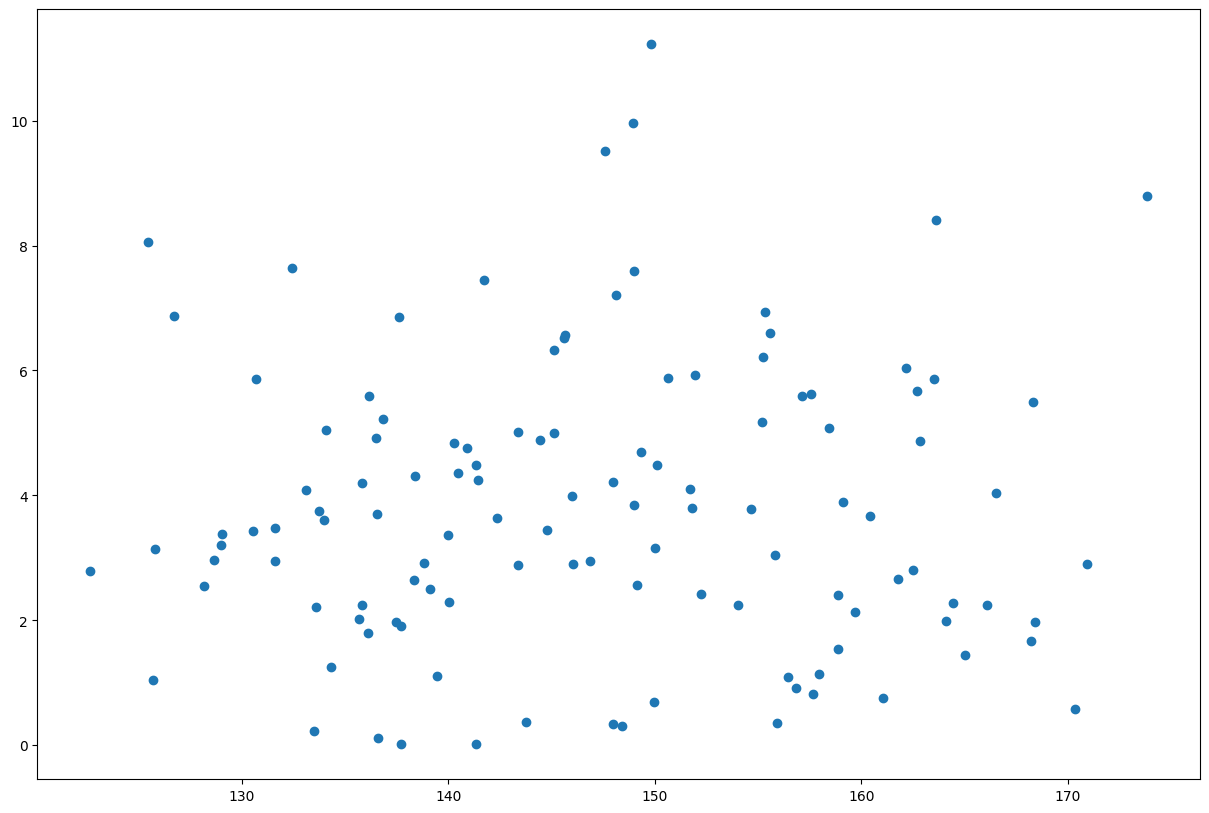

In [106]:
plt.scatter(df_cpi_x['price'], 
            np.abs(df_cpi_x['price'] - df_cpi_x['price'].shift() ));

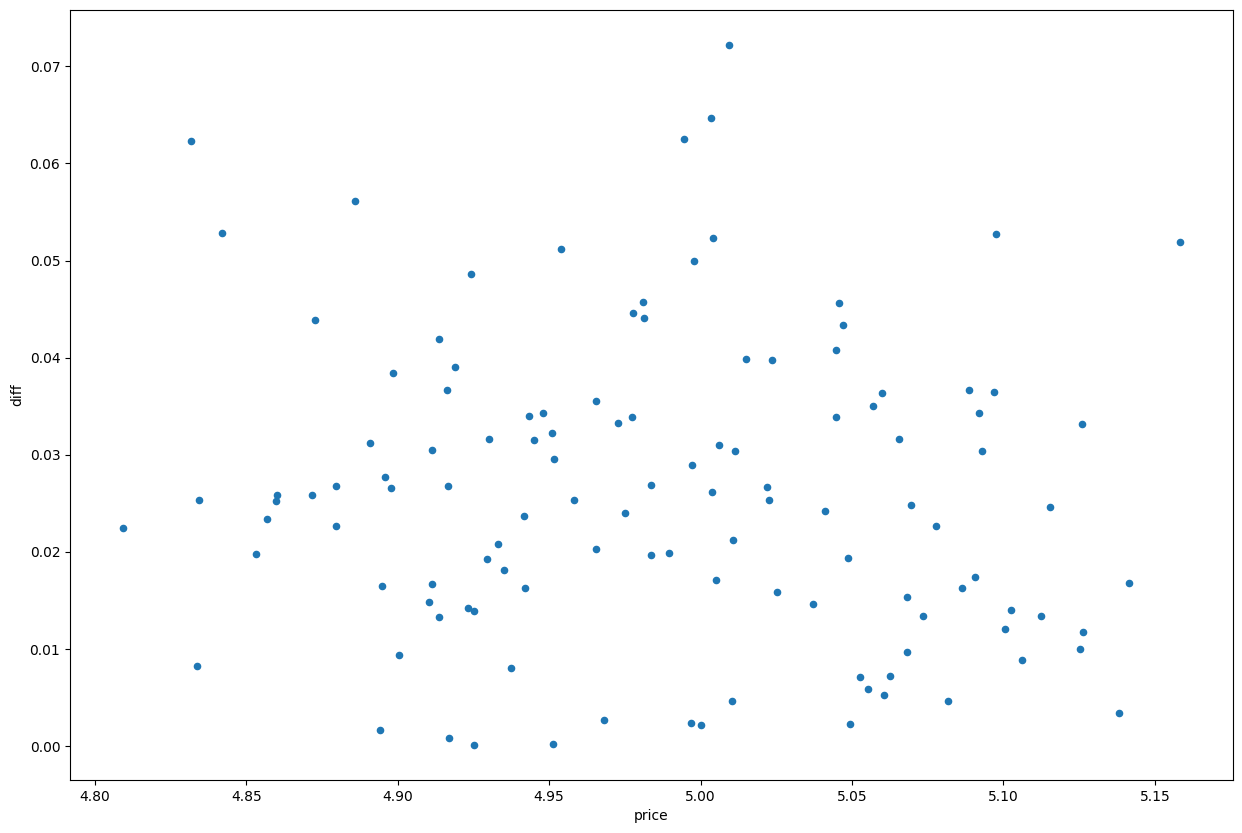

In [107]:
df_cpi_x_log = np.log(df_cpi_x)
df_cpi_x_log['diff'] = np.abs(df_cpi_x_log['price'] - df_cpi_x_log['price'].shift())
df_cpi_x_log.plot.scatter(x='price', y='diff');

I will use the logged version for this exercise so as to make it less mulitiplicative. 

In [108]:
#df_cpi_x_log[['diff']].plot();

#### baseline model

C:\Users\sgrya\anaconda3\envs\myts\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


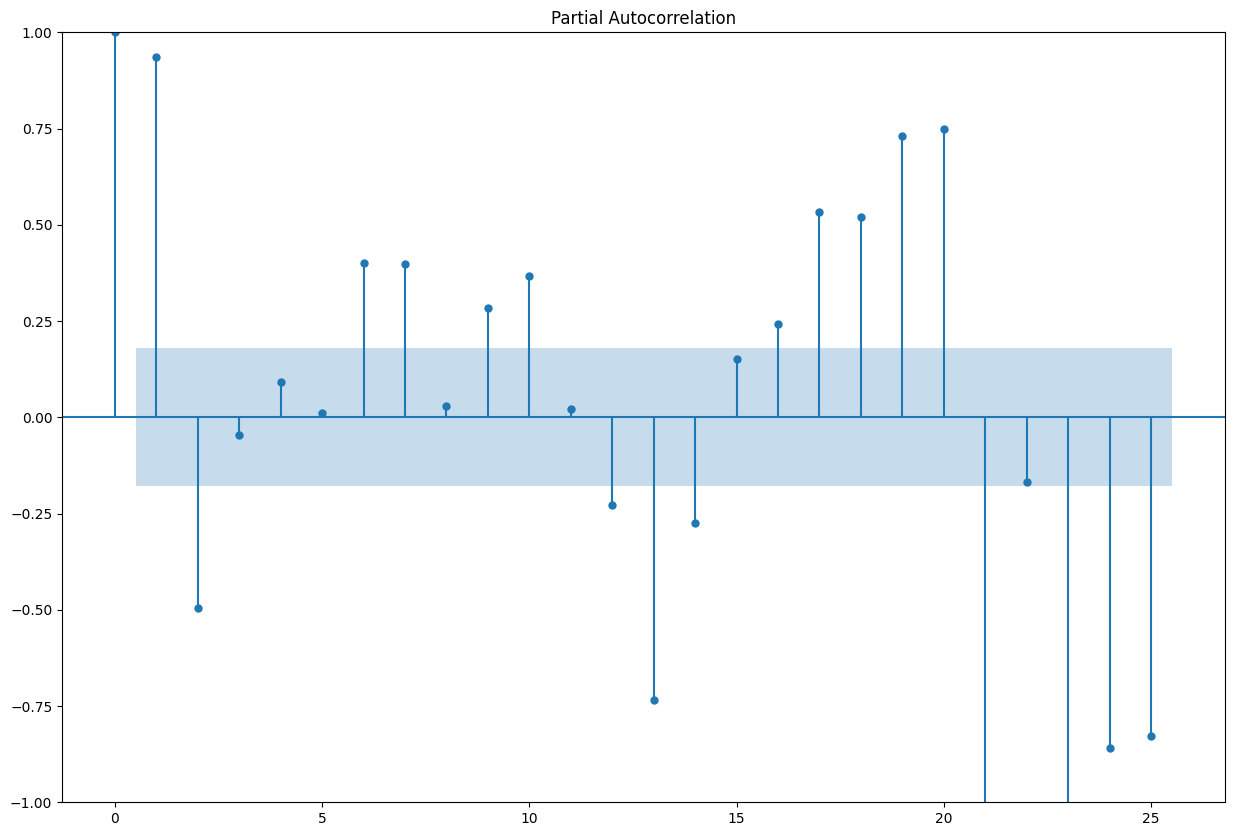

In [109]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf

plot_pacf(df_cpi_x, lags=25)
pyplot.show();

In [110]:
df_cpi_x_ar = sm.tsa.AutoReg(df_cpi_x['price'], lags=13, trend='n').fit()
df_cpi_x_ar_rmse = rmse(df_cpi_x_ar.predict().to_numpy(),
                        df_cpi_x['price'])
df_cpi_x_arcoefs = df_cpi_x_ar.params[::-1]
df_cpi_x_ar_rmse

C:\Users\sgrya\anaconda3\envs\myts\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


1.9618281051848079

#### logged model

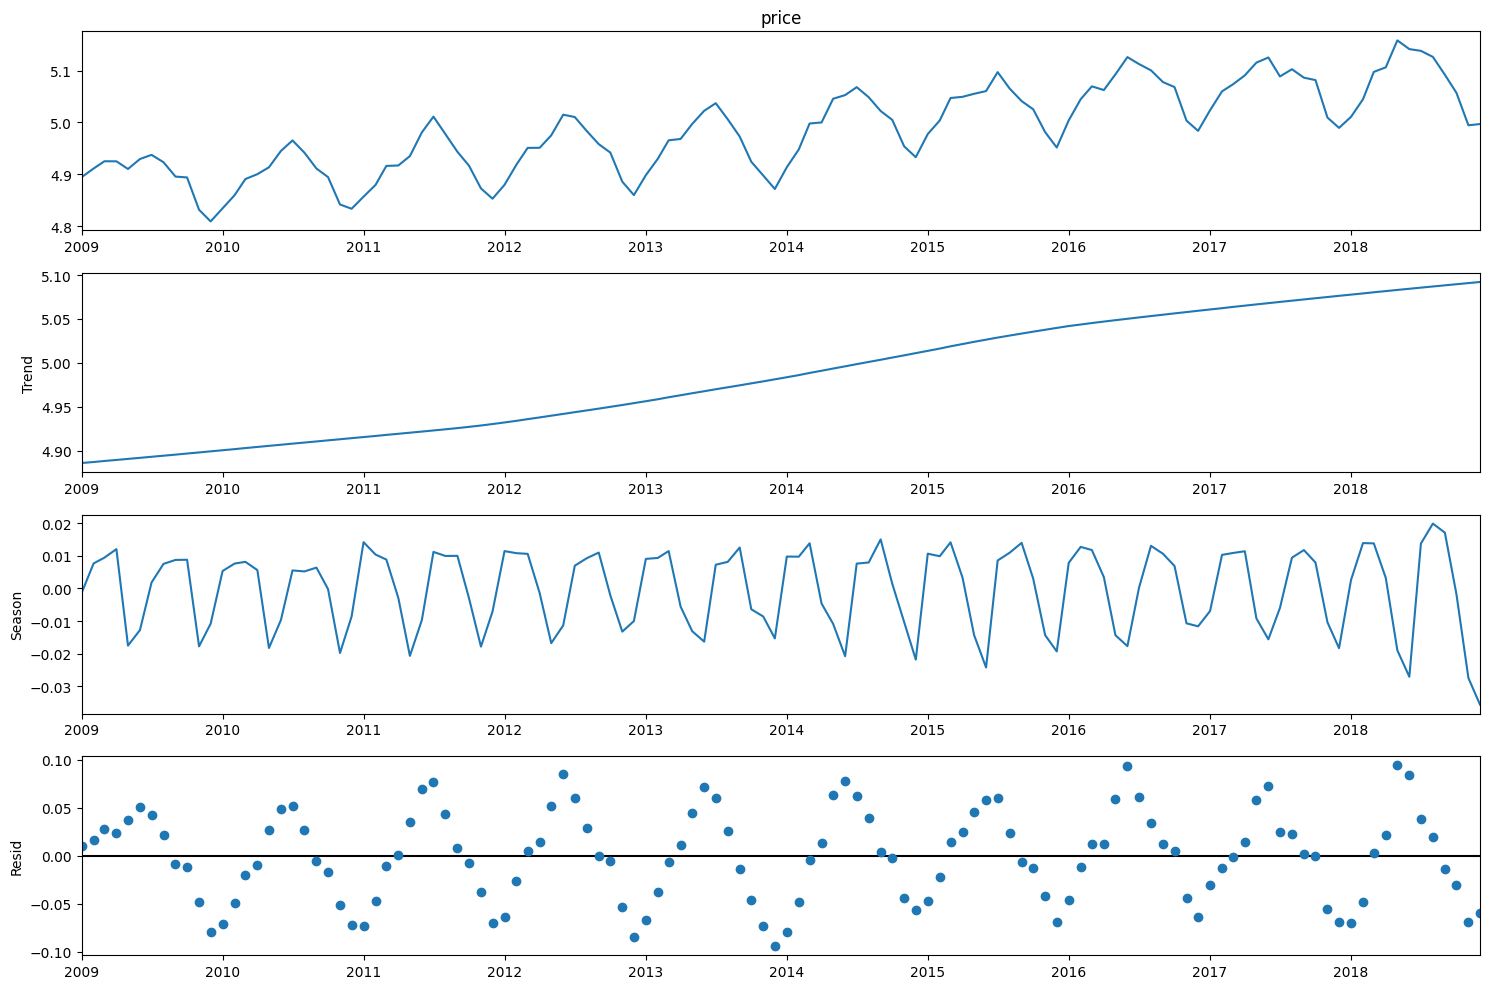

In [111]:
from statsmodels.tsa.seasonal import STL

df_cpi_x2 = df_cpi_x.copy() #make another copy before logging

df_cpi_x2['price'] = np.log(df_cpi_x2['price'])
cpi_decomposed = STL(df_cpi_x2['price'], period = 6, trend = 71, seasonal = 7).fit()

#cpi_decomposed = STL(df_cpi_x['price'],period = 12, trend = 131,
#                         seasonal=41, trend_deg=0).fit()
cpi_trend = cpi_decomposed.trend
cpi_seasonal = cpi_decomposed.seasonal
cpi_resid = cpi_decomposed.resid

cpi_decomposed.plot();

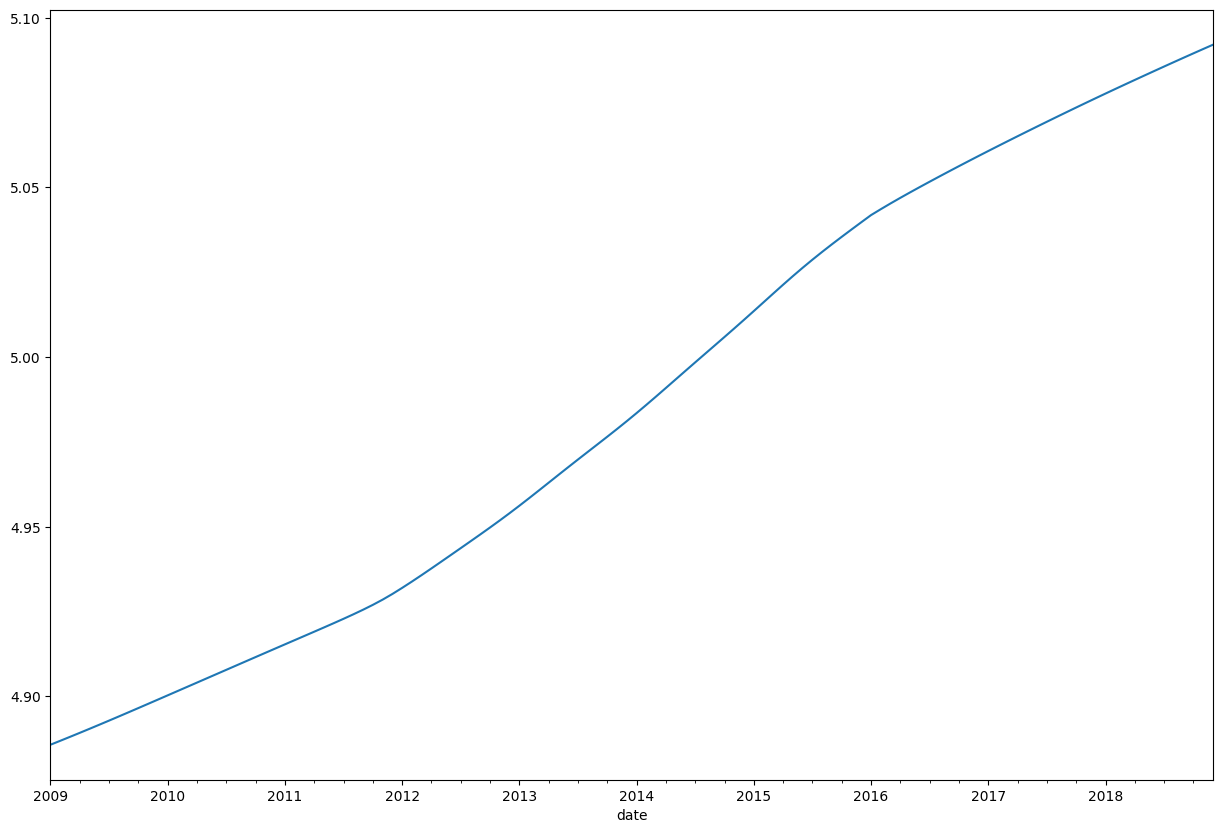

In [112]:
cpi_trend.plot();

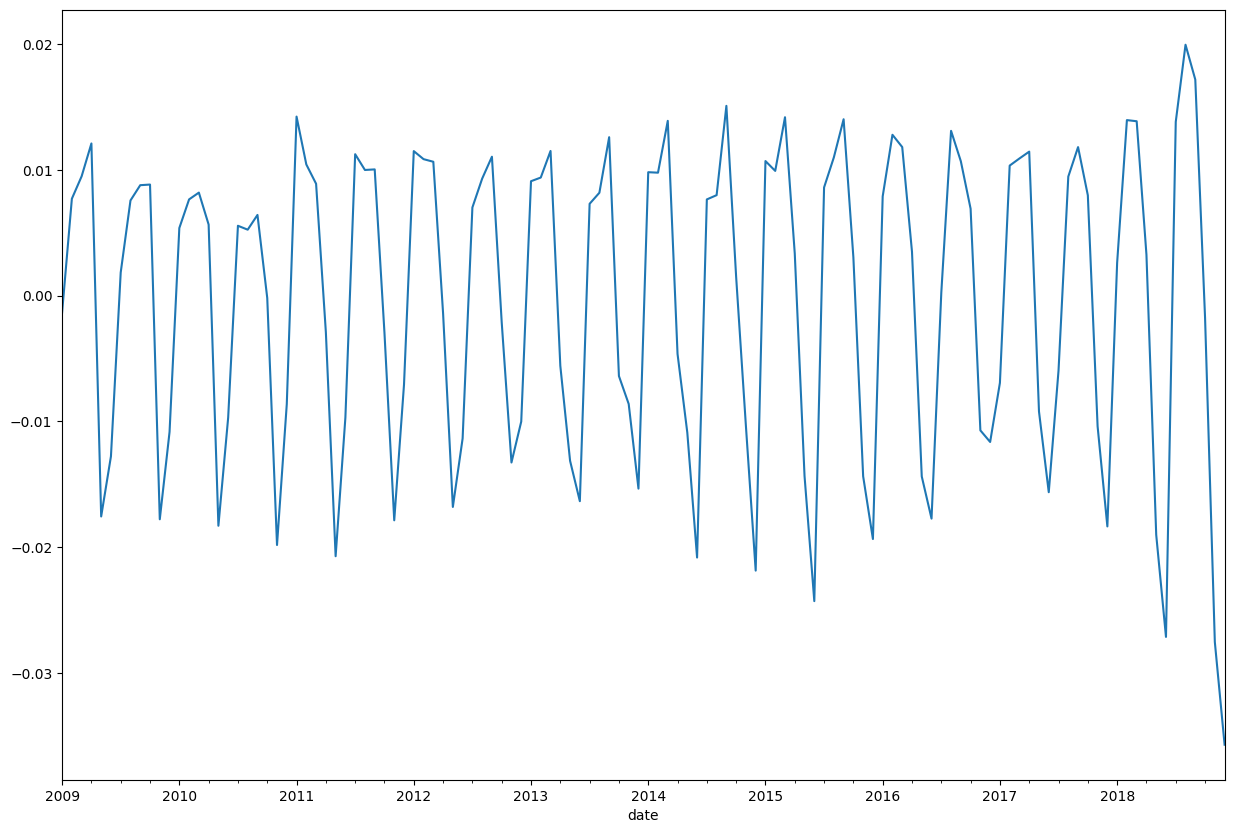

In [113]:
cpi_seasonal.plot();

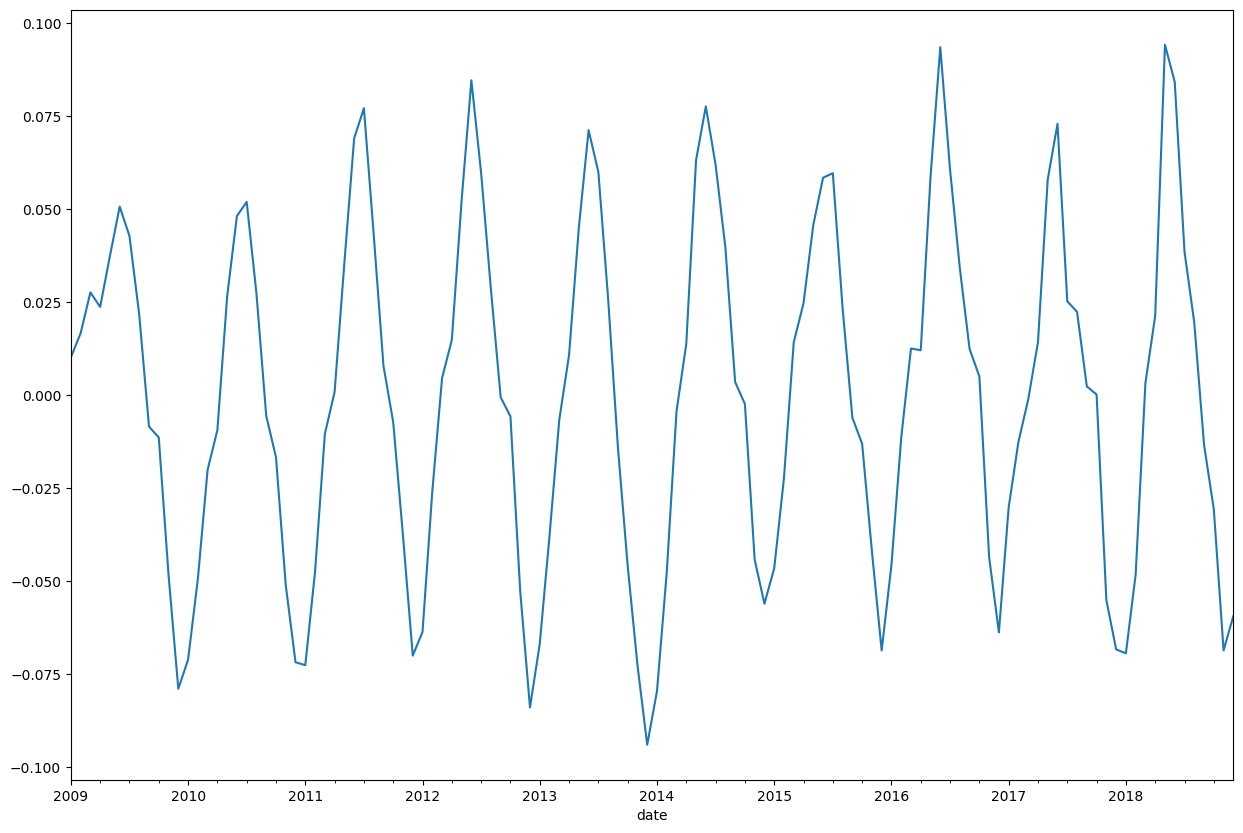

In [114]:
cpi_resid.plot();

C:\Users\sgrya\anaconda3\envs\myts\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


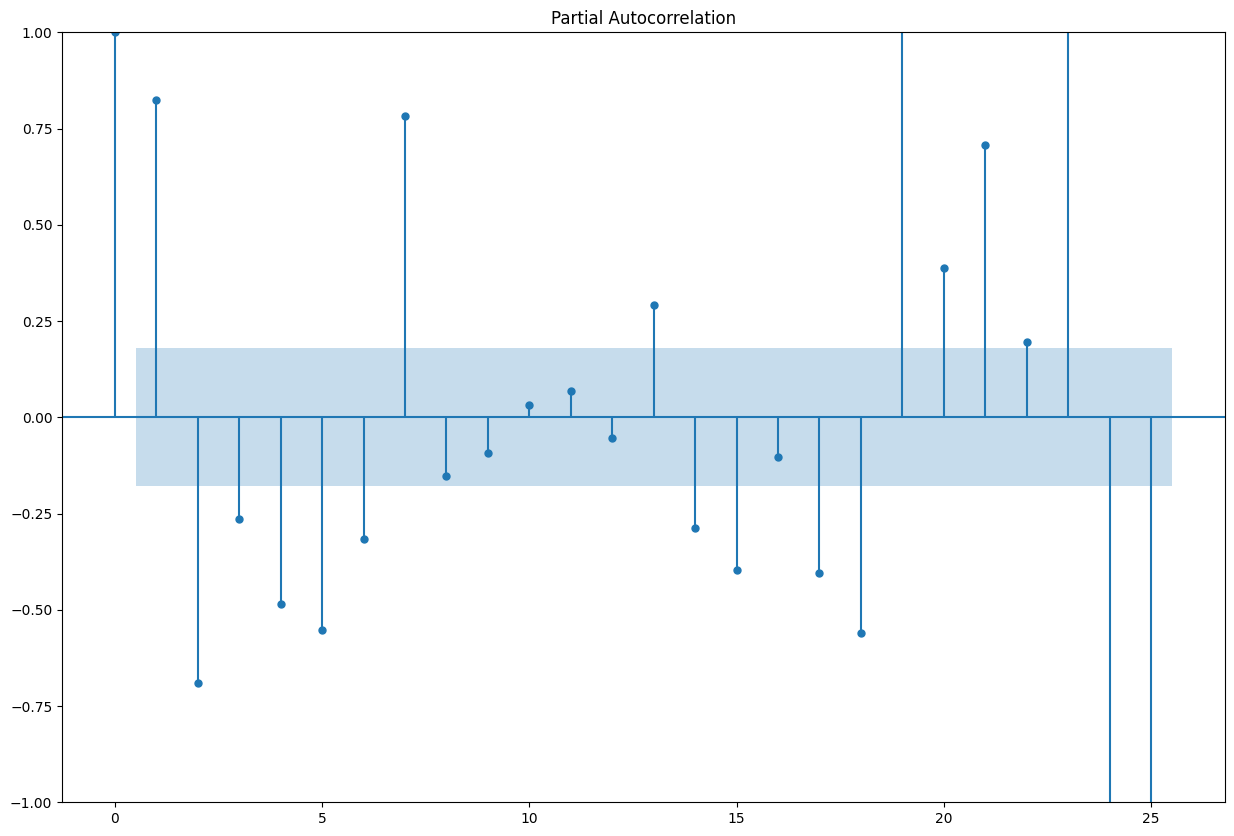

In [115]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(cpi_resid, lags=25)
pyplot.show();

In [116]:
cpi_resid_ar = sm.tsa.AutoReg(cpi_resid.reset_index()['resid'], 
                                  lags=13, trend = 'n').fit()

# sunspots_ar_rmse = rmse(sunspots_ar.predict().to_numpy(),
#                         sunspots_df['Observed'])
cpi_resid_arcoefs = cpi_resid_ar.params[::-1]
cpi_resid_arcoefs

resid.L13   -0.2690
resid.L12    0.3410
resid.L11    0.0901
resid.L10   -0.0133
resid.L9     0.0259
resid.L8    -0.2096
resid.L7     0.5139
resid.L6    -0.4229
resid.L5    -0.0886
resid.L4     0.0090
resid.L3    -0.0172
resid.L2    -0.1090
resid.L1     0.8132
dtype: float64

In [117]:
predicted_log_trend = 2 * cpi_trend.shift(1) - cpi_trend.shift(2)
trend_log_rmse = rmse(predicted_log_trend, cpi_trend)
trend_log_rmse

4.7453836658505444e-05

In [118]:
predicted_log_seasonal = cpi_seasonal.shift(12) # seasonal naive
seasonal_log_rmse = rmse(predicted_log_seasonal, cpi_seasonal)
seasonal_log_rmse

0.005474403455385116

In [119]:
predicted_log_resid = cpi_resid_ar.predict().to_numpy()
resid_log_rmse = rmse(predicted_log_resid, cpi_resid)
resid_log_rmse

0.00990481342240383

In [120]:
print("Component log RMSE: trend", trend_log_rmse, ", seasonal",seasonal_log_rmse, 
      ", resid", resid_log_rmse)
print("Composite log RMSE", rmse(predicted_log_trend + predicted_log_seasonal \
                                 + predicted_log_resid, df_cpi_x2['price']))

Component log RMSE: trend 4.7453836658505444e-05 , seasonal 0.005474403455385116 , resid 0.00990481342240383
Composite log RMSE 0.010966438871779907


In [121]:
df_cpi_x['Prediction'] = np.exp(predicted_log_trend + 
                                predicted_log_seasonal + predicted_log_resid)
trend_rmse = rmse(np.exp(predicted_log_trend), np.exp(cpi_trend))
seasonal_rmse = rmse(np.exp(predicted_log_seasonal), np.exp(cpi_seasonal))
resid_rmse = rmse(np.exp(predicted_log_resid), np.exp(cpi_resid))
print("RMSE from AR(13)", df_cpi_x_ar_rmse)
print("Component RMSE: trend", trend_rmse, ", seasonal", seasonal_rmse, 
      ", resid", resid_rmse)
print("Composite RMSE", rmse (df_cpi_x['Prediction'],
            df_cpi_x['price']))

RMSE from AR(13) 1.9618281051848079
Component RMSE: trend 0.007118017372601186 , seasonal 0.0054475096249453295 , resid 0.009984657486630653
Composite RMSE 1.6817462090267303


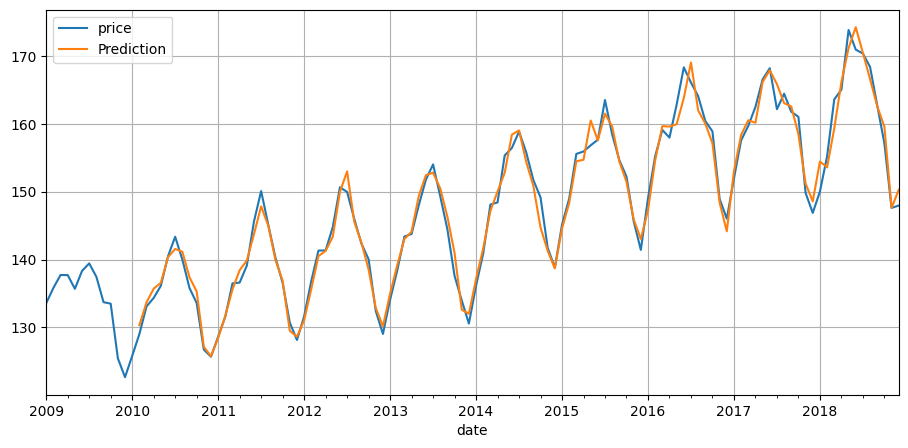

In [122]:
df_cpi_x.plot(grid=True, figsize= (11,5));

Looks pretty close between the price and prediction! 

# Topic 7 - ARIMA
## ARIMA
I have used NVDA dataset to model ARIMA

Finding the best p, d, and q

In [123]:
# from statsmodels.tsa.seasonal import seasonal_decompose
# result = seasonal_decompose(nvda_df['price'],model='additive',period=365) #, freq=365)

In [124]:
arima_df = nvda_df.copy()[['price','diff']]
#arima_df = arima_df.asfreq('d')
series_ = arima_df['diff']

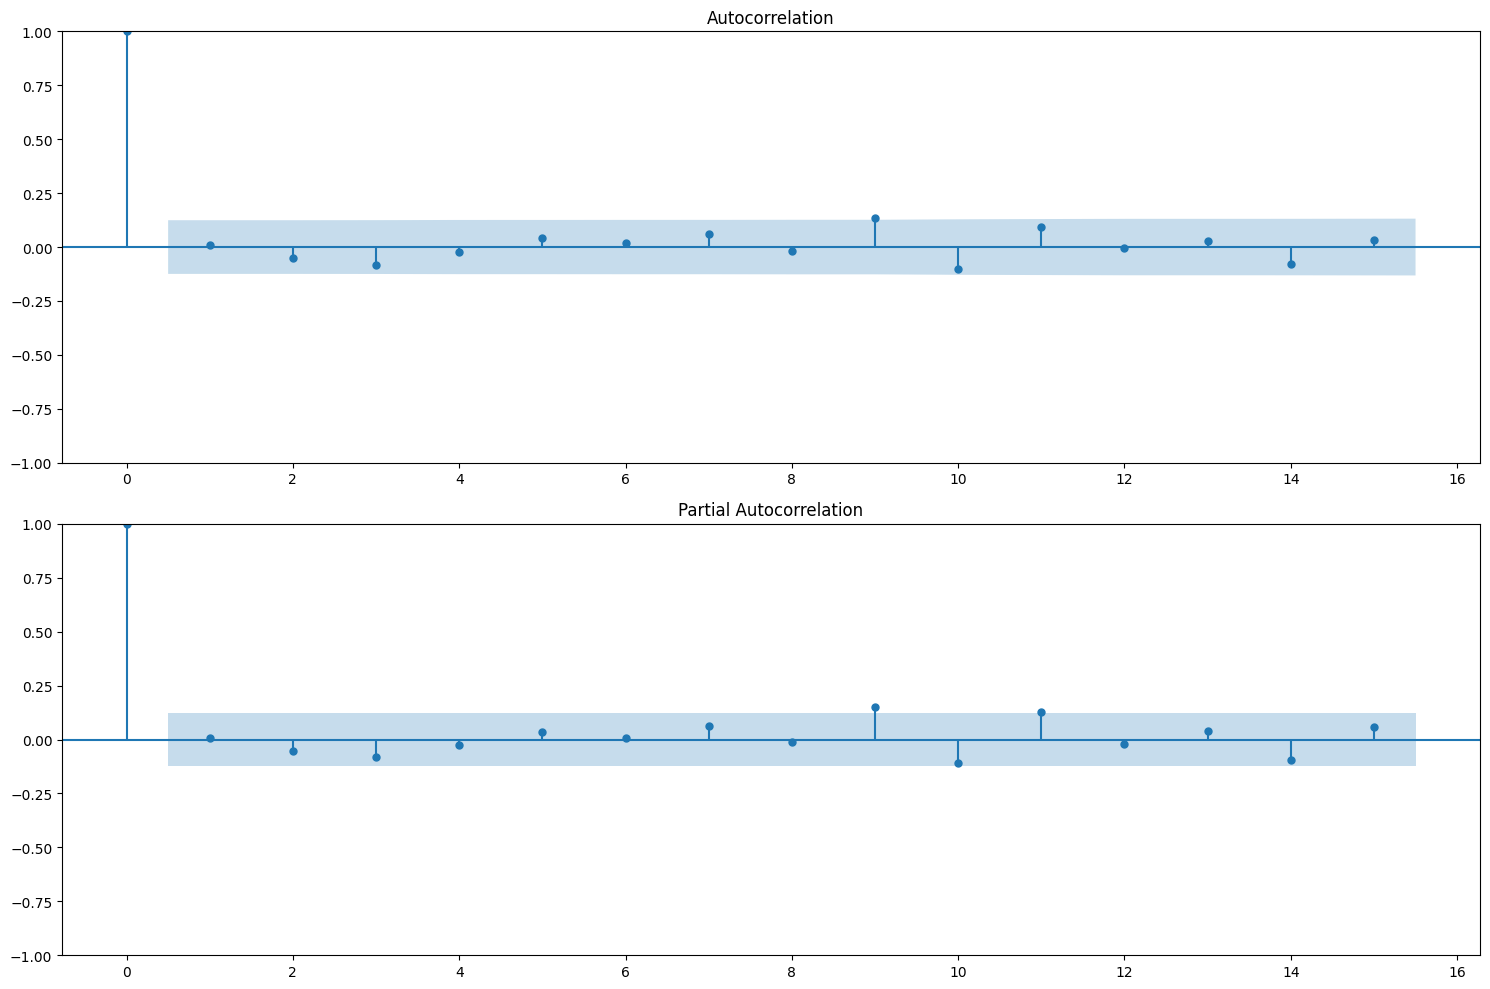

In [125]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

use_series = series_
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
plot_acf(use_series,lags=15, ax=ax[0])
plot_pacf(use_series,lags=15, ax=ax[1], method='ols')

plt.tight_layout()
plt.show() #strongly regressive

In [126]:
model = sm.tsa.arima.ARIMA(arima_df['price'], order=(9,1,9), trend='n')
res = model.fit()
# print(res.summary())
arima_df['prediction'] = res.predict()
arima_df = arima_df[1:]
print(rmse(arima_df['price'], arima_df['prediction']))

C:\Users\sgrya\anaconda3\envs\myts\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sgrya\anaconda3\envs\myts\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sgrya\anaconda3\envs\myts\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sgrya\anaconda3\envs\myts\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('N

6.007145247293296


C:\Users\sgrya\anaconda3\envs\myts\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


The RMSE of 6.00 is the best we have got throughout the whole notebook! 

In [127]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  price   No. Observations:                  248
Model:                 ARIMA(9, 1, 9)   Log Likelihood                -791.704
Date:                Mon, 31 Jul 2023   AIC                           1621.408
Time:                        00:02:22   BIC                           1688.086
Sample:                             0   HQIC                          1648.253
                                - 248                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0313      0.202      0.155      0.877      -0.365       0.428
ar.L2          0.7968      0.153      5.220      0.000       0.498       1.096
ar.L3          0.0708      0.175      0.405      0.686      -0.272       0.414
ar.L4         -0.5383      0.152     -3.539      0.000      -0.836      -0.240
ar.L5         -0.3405      0.144     -2.357      0.018      -0.624      -0.057
ar.L6          0.3456      0.138      2.497      0.013       0.074       0.617
ar.L7          0.6916      0.158      4.378      0.000       0.382       1.001
ar.L8         -0.3589      0.171     -2.100      0.036      -0.694      -0.024
ar.L9         -0.3482      0.167     -2.085      0.037      -0.676      -0.021
ma.L1          0.0507      0.213      0.238      0.812      -0.366       0.467
ma.L2         -0.8309      0.263     -3.161      0.002      -1.346      -0.316
ma.L3         -0.2257      0.370     -0.610      0.542      -0.951       0.499
ma.L4          0.5308      0.304      1.745      0.081      -0.065       1.127
ma.L5          0.5782      0.554      1.044      0.297      -0.508       1.664
ma.L6         -0.2351      0.196     -1.201      0.230      -0.619       0.149
ma.L7         -0.9412      0.532     -1.768      0.077      -1.984       0.102
ma.L8          0.2090      0.158      1.327      0.185      -0.100       0.518
ma.L9          0.6912      0.280      2.467      0.014       0.142       1.240
sigma2        34.5315     11.030      3.131      0.002      12.914      56.149
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 4.73
Prob(Q):                              0.95   Prob(JB):                         0.09
Heteroskedasticity (H):               0.89   Skew:                             0.13
Prob(H) (two-sided):                  0.61   Kurtosis:                         3.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [128]:
#res.summary()

In [129]:
arima_df.head()

price     diff  prediction
date                                                   
2022-05-05 00:00:00-04:00 188.2446 -14.8845    203.1291
2022-05-06 00:00:00-04:00 186.5563  -1.6883    188.1935
2022-05-09 00:00:00-04:00 169.3242 -17.2321    186.8917
2022-05-10 00:00:00-04:00 175.7675   6.4433    170.2470
2022-05-11 00:00:00-04:00 166.1275  -9.6400    176.4862

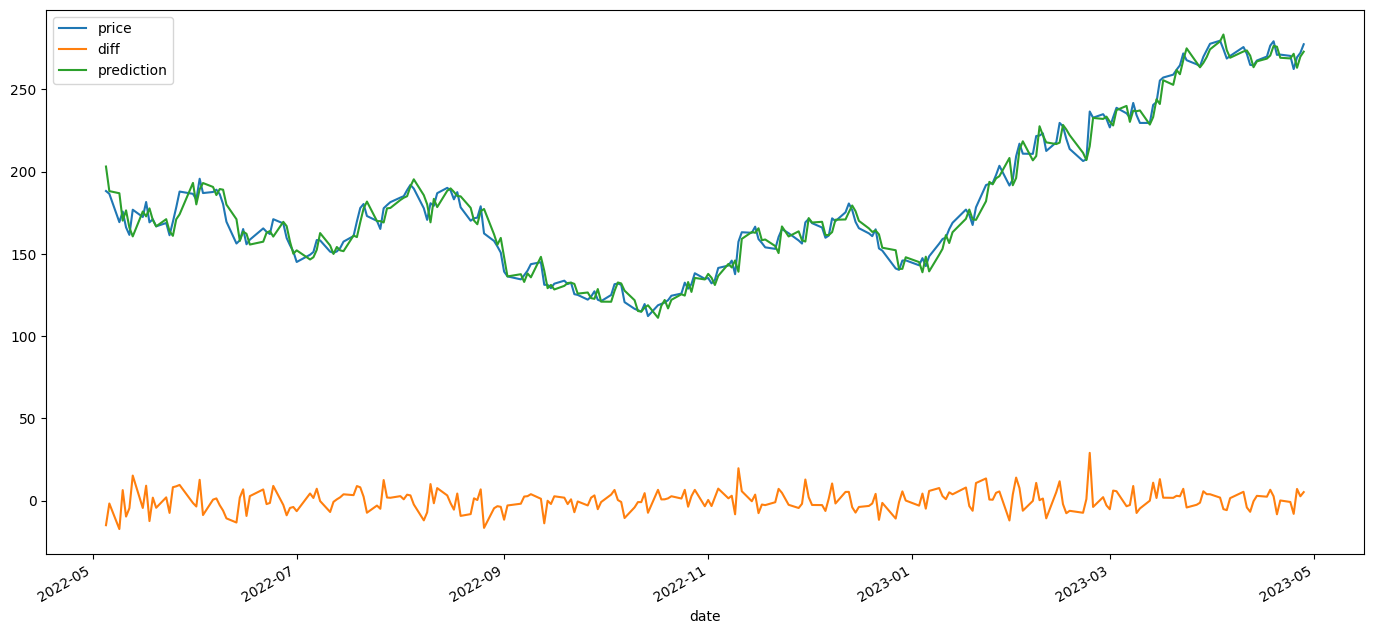

In [130]:
arima_df.plot(figsize=(17,8));

# Sarimax
I have used the seasonal dataset of beer prices to model Sarimax. 

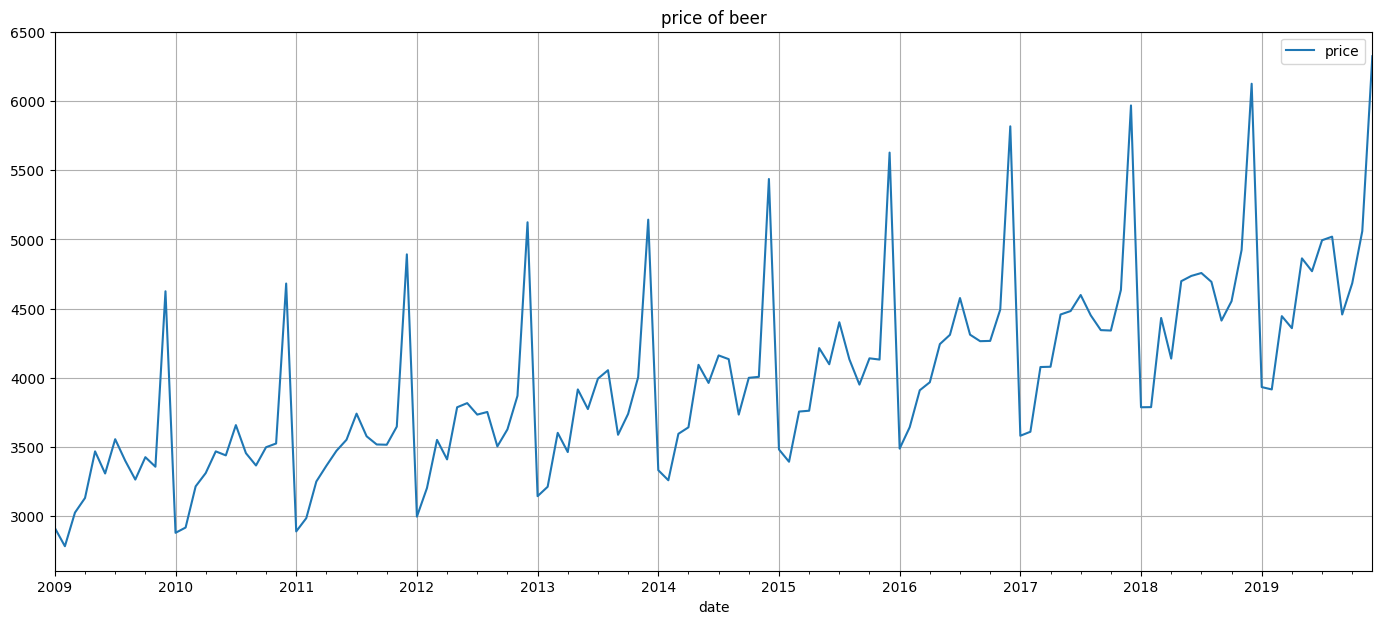

In [131]:
df_beer_sarima = df_beer[['price']].copy().loc['2009':'2019']

df_beer_sarima.plot(grid=True,title="price of beer", figsize=(17,7));

In [132]:
my_adfuller(df_beer_sarima['price'])

ADF Statistic: 2.627052
p-value: 0.999080
Critical Values:
	1%: -3.486
	5%: -2.886
	10%: -2.580


It is certainly not stationary. A difference need to be taken. As we shall see, the auto arima does recommend an I of 1. 

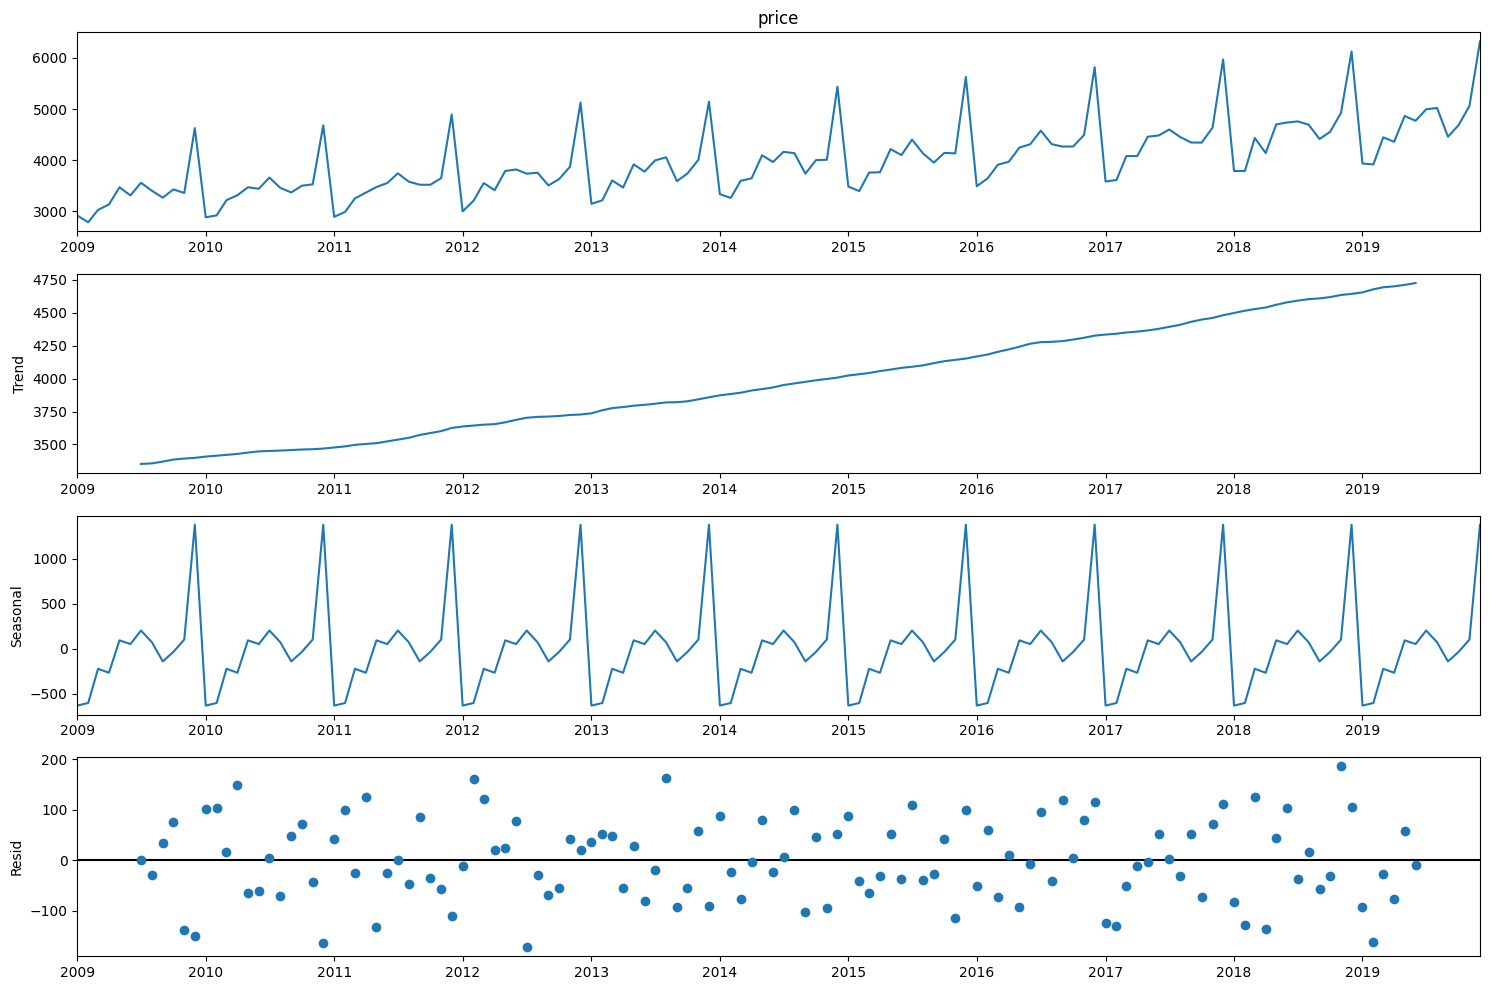

In [133]:
sm.tsa.seasonal_decompose(df_beer_sarima['price']).plot()
plt.show()

We do observe a trend and seasonality for this dataset. We will proceed to implement Seasonal ARIMA ( Seasonal Auto Regressive Integrated Moving Average ).

In [134]:
df_beer_sarima.shape[0] * .8

105.60000000000001

In [135]:
train_data = df_beer_sarima[:105] #80% train test split 
test_data = df_beer_sarima[105:]

In [136]:
print(f"Training Sample Size: {train_data.shape[0]} | Testing Sample Size: {test_data.shape[0]}")

Training Sample Size: 105 | Testing Sample Size: 27


In [137]:
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import timedelta

In [138]:
# Finding the optimum parameters for SARIMA model
Sarimax_model = auto_arima(df_beer_sarima['price'],
                       start_p=0,
                       start_q=0,
                       max_p=3,
                       max_q=3,
                       m=12,
                       test='adf',
                       seasonal=True,
                       d=1,
                       D=1,
                       trace=True,
                       error_action='ignore',
                       suppress_warnings=True,
                       stepwise=True)

# Summary
Sarimax_model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1495.701, Time=0.23 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1500.237, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1460.846, Time=0.05 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1415.351, Time=0.17 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1415.595, Time=0.05 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1413.909, Time=0.24 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1416.024, Time=0.15 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=1414.224, Time=0.62 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=1414.938, Time=0.78 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1413.411, Time=0.54 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=1488.303, Time=0.35 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=1414.066, Time=0.70 sec
 ARIMA(0,1,2)(0,1,2)[12]             : AIC=1413.947, Time=0.61 sec
 ARIMA(1,1,0)(0,1,2)[12]             : AIC=1456.881, Time=0.42 sec
 ARIMA(1,1,2)(0,1,2

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  132
Model:             SARIMAX(0, 1, 1)x(0, 1, [1, 2], 12)   Log Likelihood                -702.706
Date:                                 Mon, 31 Jul 2023   AIC                           1413.411
Time:                                         00:02:31   BIC                           1424.528
Sample:                                     01-01-2009   HQIC                          1417.925
                                          - 12-01-2019                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9357      0.038    -24.459      0.000      -1.011      -0.861
ma.S.L12      -0.2130      0.124     -1.724      0.085      -0.455       0.029
ma.S.L24      -0.1903      0.106     -1.788      0.074      -0.399       0.018
sigma2      7667.7271   1123.940      6.822      0.000    5464.845    9870.609
===================================================================================
Ljung-Box (L1) (Q):                   1.36   Jarque-Bera (JB):                 1.87
Prob(Q):                              0.24   Prob(JB):                         0.39
Heteroskedasticity (H):               1.14   Skew:                             0.20
Prob(H) (two-sided):                  0.67   Kurtosis:                         2.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [139]:
my_order = (0,1,2)
my_seasonal_order = (0, 1, 2, 12)

In [140]:
rolling_predictions = []

for train_time in test_data.index:
    train_data1 = df_beer_sarima[['price']][:train_time-timedelta(days=1)]
    model = SARIMAX(train_data1, order=my_order, seasonal_order=my_seasonal_order)
    model_fit = model.fit()
    pred = model_fit.forecast()
    rolling_predictions.append(pred[0])

C:\Users\sgrya\anaconda3\envs\myts\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sgrya\anaconda3\envs\myts\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sgrya\anaconda3\envs\myts\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\sgrya\anaconda3\envs\myts\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sgrya\anaconda3\envs\myts\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarn

C:\Users\sgrya\anaconda3\envs\myts\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sgrya\anaconda3\envs\myts\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sgrya\anaconda3\envs\myts\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\sgrya\anaconda3\envs\myts\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sgrya\anaconda3\envs\myts\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarn

C:\Users\sgrya\anaconda3\envs\myts\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sgrya\anaconda3\envs\myts\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sgrya\anaconda3\envs\myts\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


In [141]:
# rolling_predictions_df = pd.DataFrame(rolling_predictions, index=test_data.index)
# rolling_predictions_df.head()

test_data['predictions'] = rolling_predictions

C:\Users\sgrya\AppData\Local\Temp\ipykernel_37944\2176162778.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['predictions'] = rolling_predictions


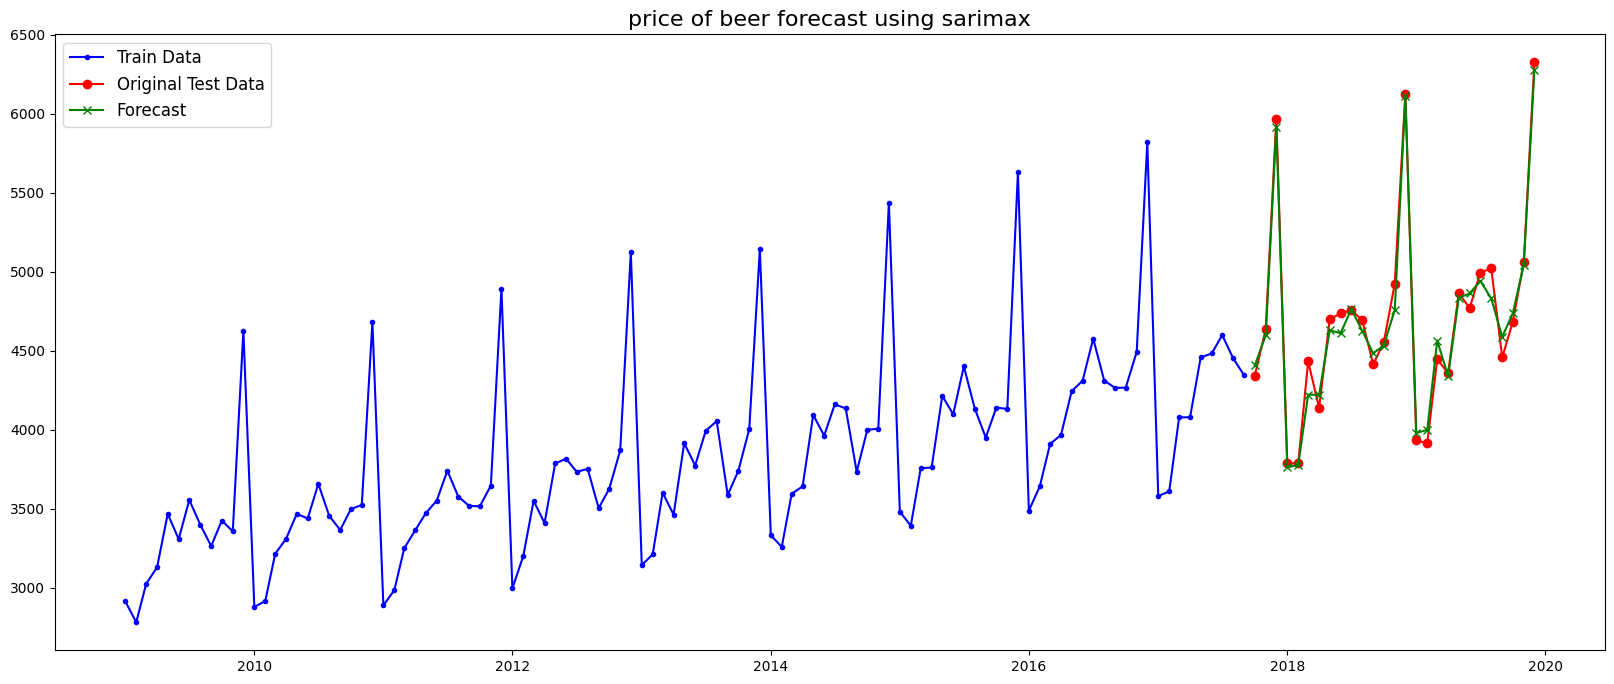

In [142]:
plt.figure(figsize=(20,8))
plt.plot(train_data.price, "b.-")
plt.plot(test_data.price, "ro-")
plt.plot(test_data.predictions, "gx-")
plt.legend(('Train Data', 'Original Test Data', 'Forecast'), fontsize=12)
plt.title('price of beer forecast using sarimax', fontsize=16);

In [143]:
assess_predictions(test_data,'price','predictions')

7878.217497517763

The RMSE of 7878 is a good attempt for a seasonal dataset like this (with wild swing towards end of the year). In an earlier attempt, i did use and order of (0,1,1), but it resulted in an 8000+ RMSE. 

For full disclosure, I did consult this notebook for understanding: https://www.kaggle.com/code/kkhandekar/coffee-forecast-2023-rolling-sarima-technique

# Facebook Prophet

Facebook Prophet is a forecasting tool created by Facebook's Data Science team. Prophet allows customization of trend, seasonality, and holiday effects to predict time-series data. 

In [144]:
from prophet import Prophet

gold_df_fbp = gold_df.copy().reset_index(drop=False)
gold_df_fbp.columns = ['ds', 'y']

m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(gold_df_fbp)

Importing plotly failed. Interactive plots will not work.
00:02:49 - cmdstanpy - INFO - Chain [1] start processing
00:02:49 - cmdstanpy - INFO - Chain [1] done processing


In [145]:
future = m.make_future_dataframe(periods=100,freq='D')
forecast = m.predict(future)
forecast.head()

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper   
0 2015-07-01 1,152.9492  1,007.5593  1,223.5369   1,152.9492   1,152.9492  \
1 2015-07-02 1,153.1625  1,008.6655  1,206.2713   1,153.1625   1,153.1625   
2 2015-07-06 1,154.0161  1,009.1456  1,205.9940   1,154.0161   1,154.0161   
3 2015-07-07 1,154.2295  1,013.4120  1,208.5786   1,154.2295   1,154.2295   
4 2015-07-08 1,154.4429  1,004.5872  1,211.9020   1,154.4429   1,154.4429   

   additive_terms  additive_terms_lower  additive_terms_upper    daily   
0        -39.4486              -39.4486              -39.4486 -39.6755  \
1        -39.7294              -39.7294              -39.7294 -39.6755   
2        -44.8947              -44.8947              -44.8947 -39.6755   
3        -45.9471              -45.9471              -45.9471 -39.6755   
4        -46.9432              -46.9432              -46.9432 -39.6755   

   daily_lower  daily_upper  weekly  weekly_lower  weekly_upper  yearly   
0     -39.6755     -39.6755 -2.2253       -2.2253       -2.2253  2.4522  \
1     -39.6755     -39.6755 -1.3529       -1.3529       -1.3529  1.2990   
2     -39.6755     -39.6755 -2.0772       -2.0772       -2.0772 -3.1419   
3     -39.6755     -39.6755 -2.1396       -2.1396       -2.1396 -4.1320   
4     -39.6755     -39.6755 -2.2253       -2.2253       -2.2253 -5.0424   

   yearly_lower  yearly_upper  multiplicative_terms   
0        2.4522        2.4522                0.0000  \
1        1.2990        1.2990                0.0000   
2       -3.1419       -3.1419                0.0000   
3       -4.1320       -4.1320                0.0000   
4       -5.0424       -5.0424                0.0000   

   multiplicative_terms_lower  multiplicative_terms_upper       yhat  
0                      0.0000                      0.0000 1,113.5006  
1                      0.0000                      0.0000 1,113.4331  
2                      0.0000                      0.0000 1,109.1214  
3                      0.0000                      0.0000 1,108.2824  
4                      0.0000                      0.0000 1,107.4997

In [146]:
forecast[['ds','yhat']].tail(101).head()

ds       yhat
2009 2023-06-29 1,881.7714
2010 2023-06-30 1,880.0067
2011 2023-07-01 1,886.0732
2012 2023-07-02 1,885.0453
2013 2023-07-03 1,876.9831

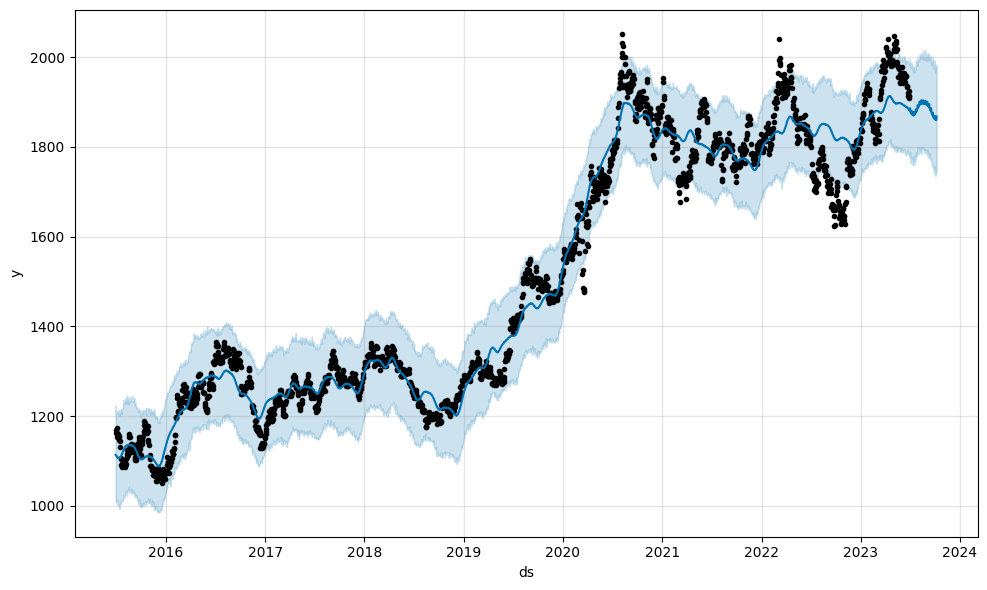

In [147]:
plot1 = m.plot(forecast)

The interesting part about FB Prophet is its ability to predict forward. 

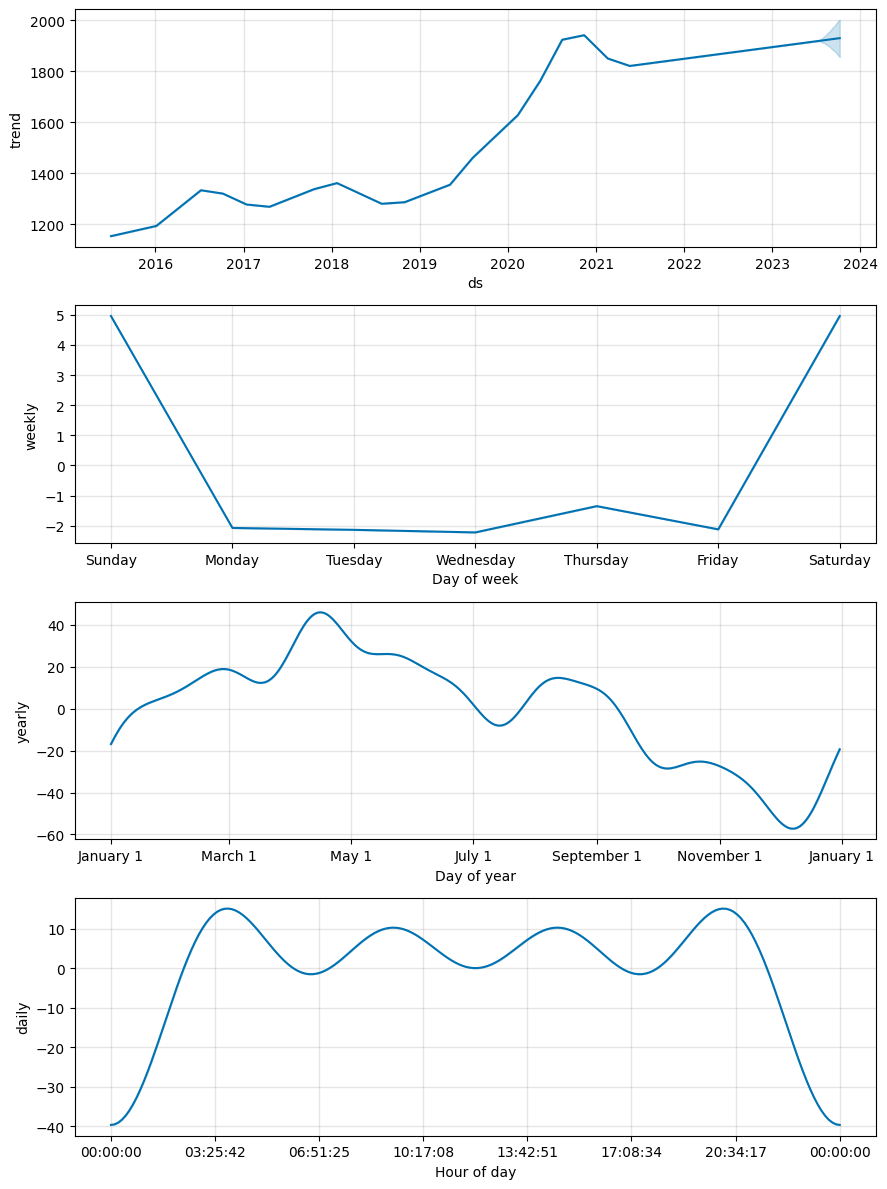

In [148]:
plt2 = m.plot_components(forecast)

# Tensorflow LSTM 
TensorFlow LSTM refers to Long Short-Term Memory (LSTM) networks. I have implemented LSTM using the TensorFlow framework. LSTM is a type of recurrent neural network (RNN) architecture that is suited for sequential data and time-series problems.

In [149]:
amzn_df_tf = amzn_df.copy()

import tensorflow as tf
import os
from sklearn.preprocessing import MinMaxScaler

amzn_df_tf = np.log(amzn_df_tf)

scaler = MinMaxScaler()
amzn_df_tf['price'] = scaler.fit_transform(amzn_df_tf[['price']])

In [150]:
amzn_df_tf.shape

(2518, 1)

First, a preview of what goes intot the LSTM.

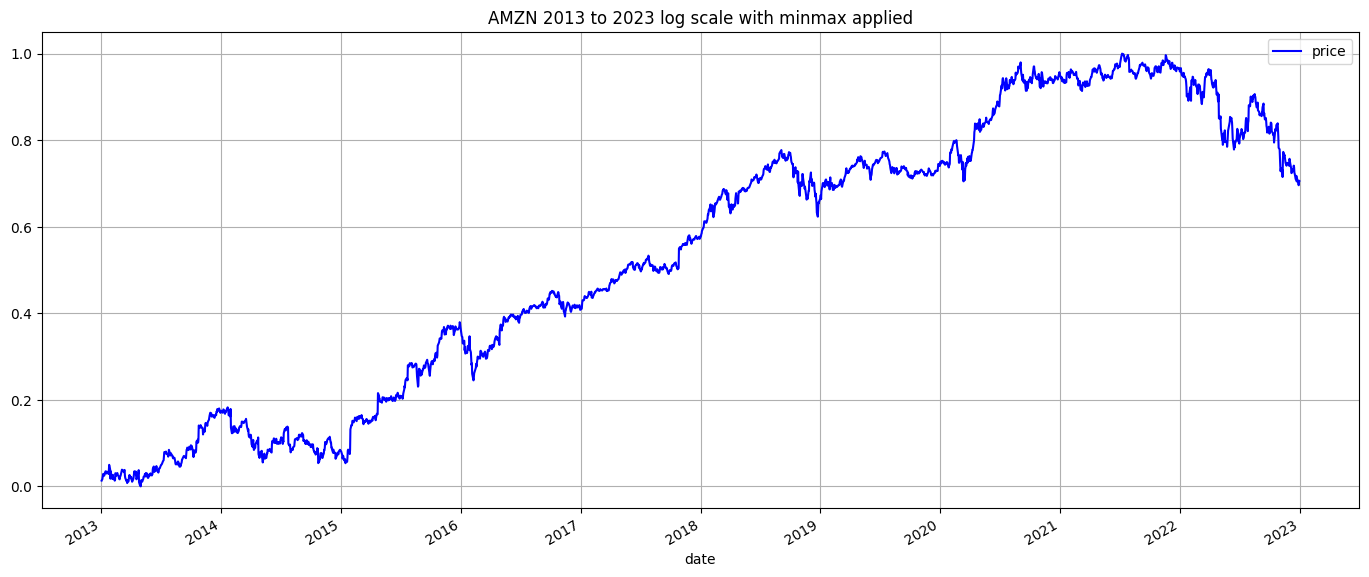

In [151]:
amzn_df_tf.plot(c='b', grid=True, figsize= (17,7), title='AMZN 2013 to 2023 log scale with minmax applied'); 

The following function allows you to form a matrix in the shape that can be loaded into the tensorflow script. In simple words, it forms a matrix which displays the following: <br>
day_1, day_2, day_3, day_4, day_5 -> predicts day_6, so on and so forth. 

In [152]:
def df_to_X_y(df, window_size=5):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [a for a in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size]
        y.append(label)
    return np.array(X), np.array(y)

In [153]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(amzn_df_tf, WINDOW_SIZE)
X1.shape, y1.shape

((2513, 5, 1), (2513, 1))

In [154]:
print(.7 * 2518)
print(.15 * 2518)

1762.6
377.7


In [155]:
1700 + 370

2070

We split the dataset into train, validation and test sets 

In [156]:
X_train1, y_train1 = X1[:1700], y1[:1700]
X_val1, y_val1 = X1[1700:2070], y1[1700:2070]
X_test1, y_test1 = X1[2070:], y1[2070:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((1700, 5, 1), (1700, 1), (370, 5, 1), (370, 1), (443, 5, 1), (443, 1))

I have build a simple LSTM architecture

In [157]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64,activation='relu')) # return_sequences=True
# model1.add(LSTM(128, return_sequences=True))
# model1.add(LSTM(256, return_sequences=True))
# model1.add(LSTM(128, return_sequences=True))
# model1.add(LSTM(64, return_sequences=True))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [158]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [159]:
#proceed at your own risk, epochs kept at 100 
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=100, callbacks=[cp1])

Epoch 1/100
49/54 [==========================>...] - ETA: 0s - loss: 0.1659 - root_mean_squared_error: 0.4073 INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


54/54 [==============================] - 4s 43ms/step - loss: 0.1677 - root_mean_squared_error: 0.4095 - val_loss: 0.5771 - val_root_mean_squared_error: 0.7597
Epoch 2/100
37/54 [===================>..........] - ETA: 0s - loss: 0.1395 - root_mean_squared_error: 0.3735INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


54/54 [==============================] - 2s 31ms/step - loss: 0.1351 - root_mean_squared_error: 0.3676 - val_loss: 0.4666 - val_root_mean_squared_error: 0.6831
Epoch 3/100
39/54 [====================>.........] - ETA: 0s - loss: 0.1057 - root_mean_squared_error: 0.3252INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


54/54 [==============================] - 1s 27ms/step - loss: 0.0995 - root_mean_squared_error: 0.3155 - val_loss: 0.3382 - val_root_mean_squared_error: 0.5816
Epoch 4/100
48/54 [=========================>....] - ETA: 0s - loss: 0.0636 - root_mean_squared_error: 0.2522INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


54/54 [==============================] - 2s 30ms/step - loss: 0.0620 - root_mean_squared_error: 0.2489 - val_loss: 0.1991 - val_root_mean_squared_error: 0.4462
Epoch 5/100
46/54 [========================>.....] - ETA: 0s - loss: 0.0313 - root_mean_squared_error: 0.1768INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


54/54 [==============================] - 1s 27ms/step - loss: 0.0297 - root_mean_squared_error: 0.1724 - val_loss: 0.0796 - val_root_mean_squared_error: 0.2821
Epoch 6/100
48/54 [=========================>....] - ETA: 0s - loss: 0.0104 - root_mean_squared_error: 0.1021INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


54/54 [==============================] - 1s 27ms/step - loss: 0.0100 - root_mean_squared_error: 0.0998 - val_loss: 0.0177 - val_root_mean_squared_error: 0.1332
Epoch 7/100
47/54 [=========================>....] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.0573INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


54/54 [==============================] - 1s 26ms/step - loss: 0.0031 - root_mean_squared_error: 0.0559 - val_loss: 0.0035 - val_root_mean_squared_error: 0.0595
Epoch 8/100
46/54 [========================>.....] - ETA: 0s - loss: 9.4614e-04 - root_mean_squared_error: 0.0308INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


54/54 [==============================] - 2s 28ms/step - loss: 8.7082e-04 - root_mean_squared_error: 0.0295 - val_loss: 6.4408e-04 - val_root_mean_squared_error: 0.0254
Epoch 9/100
47/54 [=========================>....] - ETA: 0s - loss: 1.5973e-04 - root_mean_squared_error: 0.0126INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


54/54 [==============================] - 2s 32ms/step - loss: 1.5313e-04 - root_mean_squared_error: 0.0124 - val_loss: 1.9264e-04 - val_root_mean_squared_error: 0.0139
Epoch 10/100
49/54 [==========================>...] - ETA: 0s - loss: 1.1813e-04 - root_mean_squared_error: 0.0109INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


54/54 [==============================] - 2s 29ms/step - loss: 1.1652e-04 - root_mean_squared_error: 0.0108 - val_loss: 1.7158e-04 - val_root_mean_squared_error: 0.0131
Epoch 11/100
43/54 [======================>.......] - ETA: 0s - loss: 1.1286e-04 - root_mean_squared_error: 0.0106INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


54/54 [==============================] - 1s 28ms/step - loss: 1.1424e-04 - root_mean_squared_error: 0.0107 - val_loss: 1.6963e-04 - val_root_mean_squared_error: 0.0130
Epoch 12/100
47/54 [=========================>....] - ETA: 0s - loss: 1.1210e-04 - root_mean_squared_error: 0.0106INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


54/54 [==============================] - 2s 34ms/step - loss: 1.1235e-04 - root_mean_squared_error: 0.0106 - val_loss: 1.6856e-04 - val_root_mean_squared_error: 0.0130
Epoch 13/100
48/54 [=========================>....] - ETA: 0s - loss: 1.0921e-04 - root_mean_squared_error: 0.0105INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


54/54 [==============================] - 2s 33ms/step - loss: 1.1137e-04 - root_mean_squared_error: 0.0106 - val_loss: 1.5806e-04 - val_root_mean_squared_error: 0.0126
Epoch 14/100
54/54 [==============================] - 0s 3ms/step - loss: 1.1063e-04 - root_mean_squared_error: 0.0105 - val_loss: 1.6157e-04 - val_root_mean_squared_error: 0.0127
Epoch 15/100
45/54 [========================>.....] - ETA: 0s - loss: 1.1321e-04 - root_mean_squared_error: 0.0106INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


54/54 [==============================] - 2s 32ms/step - loss: 1.1010e-04 - root_mean_squared_error: 0.0105 - val_loss: 1.5567e-04 - val_root_mean_squared_error: 0.0125
Epoch 16/100
51/54 [===========================>..] - ETA: 0s - loss: 1.1026e-04 - root_mean_squared_error: 0.0105INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


54/54 [==============================] - 2s 37ms/step - loss: 1.0942e-04 - root_mean_squared_error: 0.0105 - val_loss: 1.5013e-04 - val_root_mean_squared_error: 0.0123
Epoch 17/100
54/54 [==============================] - 0s 3ms/step - loss: 1.0956e-04 - root_mean_squared_error: 0.0105 - val_loss: 1.5383e-04 - val_root_mean_squared_error: 0.0124
Epoch 18/100
54/54 [==============================] - 0s 3ms/step - loss: 1.0937e-04 - root_mean_squared_error: 0.0105 - val_loss: 1.5592e-04 - val_root_mean_squared_error: 0.0125
Epoch 19/100
54/54 [==============================] - 0s 3ms/step - loss: 1.0863e-04 - root_mean_squared_error: 0.0104 - val_loss: 1.5281e-04 - val_root_mean_squared_error: 0.0124
Epoch 20/100
44/54 [=======================>......] - ETA: 0s - loss: 1.0767e-04 - root_mean_squared_error: 0.0104INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


54/54 [==============================] - 1s 28ms/step - loss: 1.0817e-04 - root_mean_squared_error: 0.0104 - val_loss: 1.4475e-04 - val_root_mean_squared_error: 0.0120
Epoch 21/100
54/54 [==============================] - 0s 3ms/step - loss: 1.0812e-04 - root_mean_squared_error: 0.0104 - val_loss: 1.4767e-04 - val_root_mean_squared_error: 0.0122
Epoch 22/100
54/54 [==============================] - 0s 3ms/step - loss: 1.0950e-04 - root_mean_squared_error: 0.0105 - val_loss: 1.5129e-04 - val_root_mean_squared_error: 0.0123
Epoch 23/100
54/54 [==============================] - 0s 3ms/step - loss: 1.0799e-04 - root_mean_squared_error: 0.0104 - val_loss: 1.4695e-04 - val_root_mean_squared_error: 0.0121
Epoch 24/100
44/54 [=======================>......] - ETA: 0s - loss: 1.0782e-04 - root_mean_squared_error: 0.0104INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


54/54 [==============================] - 2s 38ms/step - loss: 1.0747e-04 - root_mean_squared_error: 0.0104 - val_loss: 1.4378e-04 - val_root_mean_squared_error: 0.0120
Epoch 25/100
54/54 [==============================] - 0s 3ms/step - loss: 1.0760e-04 - root_mean_squared_error: 0.0104 - val_loss: 1.4730e-04 - val_root_mean_squared_error: 0.0121
Epoch 26/100
54/54 [==============================] - 0s 3ms/step - loss: 1.0729e-04 - root_mean_squared_error: 0.0104 - val_loss: 1.4397e-04 - val_root_mean_squared_error: 0.0120
Epoch 27/100
43/54 [======================>.......] - ETA: 0s - loss: 1.0704e-04 - root_mean_squared_error: 0.0103INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


54/54 [==============================] - 2s 29ms/step - loss: 1.0747e-04 - root_mean_squared_error: 0.0104 - val_loss: 1.4298e-04 - val_root_mean_squared_error: 0.0120
Epoch 28/100
54/54 [==============================] - 0s 3ms/step - loss: 1.0706e-04 - root_mean_squared_error: 0.0103 - val_loss: 1.4512e-04 - val_root_mean_squared_error: 0.0120
Epoch 29/100
39/54 [====================>.........] - ETA: 0s - loss: 1.1140e-04 - root_mean_squared_error: 0.0106INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


54/54 [==============================] - 2s 30ms/step - loss: 1.0700e-04 - root_mean_squared_error: 0.0103 - val_loss: 1.4190e-04 - val_root_mean_squared_error: 0.0119
Epoch 30/100
53/54 [============================>.] - ETA: 0s - loss: 1.0633e-04 - root_mean_squared_error: 0.0103INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


54/54 [==============================] - 2s 35ms/step - loss: 1.0661e-04 - root_mean_squared_error: 0.0103 - val_loss: 1.3844e-04 - val_root_mean_squared_error: 0.0118
Epoch 31/100
54/54 [==============================] - 0s 3ms/step - loss: 1.0671e-04 - root_mean_squared_error: 0.0103 - val_loss: 1.4214e-04 - val_root_mean_squared_error: 0.0119
Epoch 32/100
54/54 [==============================] - 0s 3ms/step - loss: 1.0706e-04 - root_mean_squared_error: 0.0103 - val_loss: 1.4166e-04 - val_root_mean_squared_error: 0.0119
Epoch 33/100
51/54 [===========================>..] - ETA: 0s - loss: 1.0547e-04 - root_mean_squared_error: 0.0103INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


54/54 [==============================] - 1s 28ms/step - loss: 1.0659e-04 - root_mean_squared_error: 0.0103 - val_loss: 1.3676e-04 - val_root_mean_squared_error: 0.0117
Epoch 34/100
54/54 [==============================] - 0s 3ms/step - loss: 1.0825e-04 - root_mean_squared_error: 0.0104 - val_loss: 1.4198e-04 - val_root_mean_squared_error: 0.0119
Epoch 35/100
54/54 [==============================] - 0s 3ms/step - loss: 1.0693e-04 - root_mean_squared_error: 0.0103 - val_loss: 1.4327e-04 - val_root_mean_squared_error: 0.0120
Epoch 36/100
54/54 [==============================] - 0s 3ms/step - loss: 1.0700e-04 - root_mean_squared_error: 0.0103 - val_loss: 1.4449e-04 - val_root_mean_squared_error: 0.0120
Epoch 37/100
43/54 [======================>.......] - ETA: 0s - loss: 1.0128e-04 - root_mean_squared_error: 0.0101INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


54/54 [==============================] - 2s 29ms/step - loss: 1.0693e-04 - root_mean_squared_error: 0.0103 - val_loss: 1.3666e-04 - val_root_mean_squared_error: 0.0117
Epoch 38/100
51/54 [===========================>..] - ETA: 0s - loss: 1.0710e-04 - root_mean_squared_error: 0.0103INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


54/54 [==============================] - 2s 31ms/step - loss: 1.0697e-04 - root_mean_squared_error: 0.0103 - val_loss: 1.3569e-04 - val_root_mean_squared_error: 0.0116
Epoch 39/100
54/54 [==============================] - 0s 3ms/step - loss: 1.0689e-04 - root_mean_squared_error: 0.0103 - val_loss: 1.4008e-04 - val_root_mean_squared_error: 0.0118
Epoch 40/100
54/54 [==============================] - 0s 3ms/step - loss: 1.0689e-04 - root_mean_squared_error: 0.0103 - val_loss: 1.3840e-04 - val_root_mean_squared_error: 0.0118
Epoch 41/100
54/54 [==============================] - 0s 3ms/step - loss: 1.0642e-04 - root_mean_squared_error: 0.0103 - val_loss: 1.4617e-04 - val_root_mean_squared_error: 0.0121
Epoch 42/100
54/54 [==============================] - 0s 3ms/step - loss: 1.0639e-04 - root_mean_squared_error: 0.0103 - val_loss: 1.4014e-04 - val_root_mean_squared_error: 0.0118
Epoch 43/100
54/54 [==============================] - 0s 3ms/step - loss: 1.0615e-04 - root_mean_squared_error: 

INFO:tensorflow:Assets written to: model1\assets


54/54 [==============================] - 2s 38ms/step - loss: 1.0637e-04 - root_mean_squared_error: 0.0103 - val_loss: 1.3442e-04 - val_root_mean_squared_error: 0.0116
Epoch 55/100
54/54 [==============================] - 0s 4ms/step - loss: 1.0491e-04 - root_mean_squared_error: 0.0102 - val_loss: 1.4105e-04 - val_root_mean_squared_error: 0.0119
Epoch 56/100
54/54 [==============================] - 0s 4ms/step - loss: 1.0563e-04 - root_mean_squared_error: 0.0103 - val_loss: 1.3502e-04 - val_root_mean_squared_error: 0.0116
Epoch 57/100
39/54 [====================>.........] - ETA: 0s - loss: 1.0984e-04 - root_mean_squared_error: 0.0105INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


54/54 [==============================] - 2s 35ms/step - loss: 1.0526e-04 - root_mean_squared_error: 0.0103 - val_loss: 1.3430e-04 - val_root_mean_squared_error: 0.0116
Epoch 58/100
54/54 [==============================] - 0s 3ms/step - loss: 1.0554e-04 - root_mean_squared_error: 0.0103 - val_loss: 1.3434e-04 - val_root_mean_squared_error: 0.0116
Epoch 59/100
54/54 [==============================] - 0s 3ms/step - loss: 1.0553e-04 - root_mean_squared_error: 0.0103 - val_loss: 1.3491e-04 - val_root_mean_squared_error: 0.0116
Epoch 60/100
54/54 [==============================] - 0s 3ms/step - loss: 1.0493e-04 - root_mean_squared_error: 0.0102 - val_loss: 1.3935e-04 - val_root_mean_squared_error: 0.0118
Epoch 61/100
54/54 [==============================] - 0s 3ms/step - loss: 1.0551e-04 - root_mean_squared_error: 0.0103 - val_loss: 1.3644e-04 - val_root_mean_squared_error: 0.0117
Epoch 62/100
42/54 [======================>.......] - ETA: 0s - loss: 1.0859e-04 - root_mean_squared_error: 0.01

INFO:tensorflow:Assets written to: model1\assets


54/54 [==============================] - 2s 29ms/step - loss: 1.0540e-04 - root_mean_squared_error: 0.0103 - val_loss: 1.3401e-04 - val_root_mean_squared_error: 0.0116
Epoch 63/100
54/54 [==============================] - 0s 3ms/step - loss: 1.0491e-04 - root_mean_squared_error: 0.0102 - val_loss: 1.3798e-04 - val_root_mean_squared_error: 0.0117
Epoch 64/100
54/54 [==============================] - 0s 3ms/step - loss: 1.0503e-04 - root_mean_squared_error: 0.0102 - val_loss: 1.3448e-04 - val_root_mean_squared_error: 0.0116
Epoch 65/100
54/54 [==============================] - 0s 3ms/step - loss: 1.0514e-04 - root_mean_squared_error: 0.0103 - val_loss: 1.3605e-04 - val_root_mean_squared_error: 0.0117
Epoch 66/100
54/54 [==============================] - 0s 3ms/step - loss: 1.0503e-04 - root_mean_squared_error: 0.0102 - val_loss: 1.3771e-04 - val_root_mean_squared_error: 0.0117
Epoch 67/100
54/54 [==============================] - 0s 3ms/step - loss: 1.0478e-04 - root_mean_squared_error: 

INFO:tensorflow:Assets written to: model1\assets


54/54 [==============================] - 2s 30ms/step - loss: 1.0498e-04 - root_mean_squared_error: 0.0102 - val_loss: 1.3396e-04 - val_root_mean_squared_error: 0.0116
Epoch 77/100
54/54 [==============================] - 0s 3ms/step - loss: 1.0365e-04 - root_mean_squared_error: 0.0102 - val_loss: 1.3622e-04 - val_root_mean_squared_error: 0.0117
Epoch 78/100
54/54 [==============================] - 0s 3ms/step - loss: 1.0575e-04 - root_mean_squared_error: 0.0103 - val_loss: 1.3481e-04 - val_root_mean_squared_error: 0.0116
Epoch 79/100
54/54 [==============================] - 0s 3ms/step - loss: 1.0497e-04 - root_mean_squared_error: 0.0102 - val_loss: 1.3415e-04 - val_root_mean_squared_error: 0.0116
Epoch 80/100
54/54 [==============================] - 0s 3ms/step - loss: 1.0403e-04 - root_mean_squared_error: 0.0102 - val_loss: 1.3431e-04 - val_root_mean_squared_error: 0.0116
Epoch 81/100
54/54 [==============================] - 0s 3ms/step - loss: 1.0356e-04 - root_mean_squared_error: 

INFO:tensorflow:Assets written to: model1\assets


54/54 [==============================] - 2s 31ms/step - loss: 1.0475e-04 - root_mean_squared_error: 0.0102 - val_loss: 1.3394e-04 - val_root_mean_squared_error: 0.0116
Epoch 89/100
54/54 [==============================] - 0s 4ms/step - loss: 1.0355e-04 - root_mean_squared_error: 0.0102 - val_loss: 1.5301e-04 - val_root_mean_squared_error: 0.0124
Epoch 90/100
54/54 [==============================] - 0s 4ms/step - loss: 1.0354e-04 - root_mean_squared_error: 0.0102 - val_loss: 1.4078e-04 - val_root_mean_squared_error: 0.0119
Epoch 91/100
54/54 [==============================] - 0s 5ms/step - loss: 1.0385e-04 - root_mean_squared_error: 0.0102 - val_loss: 1.3396e-04 - val_root_mean_squared_error: 0.0116
Epoch 92/100
54/54 [==============================] - 0s 4ms/step - loss: 1.0337e-04 - root_mean_squared_error: 0.0102 - val_loss: 1.3609e-04 - val_root_mean_squared_error: 0.0117
Epoch 93/100
54/54 [==============================] - 0s 4ms/step - loss: 1.0341e-04 - root_mean_squared_error: 

INFO:tensorflow:Assets written to: model1\assets


54/54 [==============================] - 2s 34ms/step - loss: 1.0220e-04 - root_mean_squared_error: 0.0101 - val_loss: 1.3276e-04 - val_root_mean_squared_error: 0.0115
Epoch 100/100
54/54 [==============================] - 0s 3ms/step - loss: 1.0189e-04 - root_mean_squared_error: 0.0101 - val_loss: 1.3826e-04 - val_root_mean_squared_error: 0.0118


In [160]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [161]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1.flatten()})
train_results.head()

54/54 [==============================] - 0s 1ms/step


Train Predictions  Actuals
0             0.0221   0.0260
1             0.0246   0.0246
2             0.0265   0.0282
3             0.0288   0.0347
4             0.0298   0.0336

In [162]:
inverse_train = np.exp(pd.DataFrame(scaler.inverse_transform(train_results)))
inverse_train.head() #looks promising but ... 

0       1
0 13.1774 13.3175
1 13.2664 13.2670
2 13.3358 13.3970
3 13.4195 13.6365
4 13.4538 13.5950

### On validation

In [163]:
val_predictions = model1.predict(X_test1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_test1.flatten()})
#remember to inverse the impact of minmax scale and to undo the log
val_results_1 = np.exp(pd.DataFrame(scaler.inverse_transform(val_results))) 
val_results_1.columns = ['price','pred']

14/14 [==============================] - 0s 1ms/step


In [164]:
def assess_predictions(df,price,pred):
    total_error_sqr = 0
    total_predicted = 0
    predictions = df[pred]
    values = df[price]
    for value, pred in zip (values,predictions):
        if pred is not None:
            if pred > 0:
                total_error_sqr += (pred - value)**2
                total_predicted += 1 
                
    rmse = total_error_sqr/total_predicted
    return ( rmse )

In [165]:
assess_predictions(val_results_1,'price','pred')

32.8445138716255

Not exactly the outcome that we are looking for. It is pretty high for RMSE for this exercise. But I manage to implement a machine learning algo for experiment! I would need more time to tweak the architecture. 